In [1]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import pandas as pd
import re

import filter_traces
import plots

date = "22_03_23"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

Principal components calculated for the $(10^{-5}-10)\;\mathrm{G_0}$ range log histograms

# Calculate histograms and correlation of traces after the evaporation of BPY

In [2]:
# tracenumbers of traces after the evaporation
after_evap = np.arange(start=36002, stop=56200, step=1)

## Only use the 1st 8000 traces because those show better homogeneity which is important for PC-based selection

In [3]:
# calculate histogram
hist = Histogram(folder=home_folder,
                     traces=after_evap[:8000],  #8000
                     conductance_range=(1e-5, 10),
                     conductance_log_scale=True,
                     conductance_bins_num=100,
                     conductance_bins_mode='total')

hist.calc_stats(align_at=0.5, interpolate=True,
                range_pull=(-0.5, 1),
                range_push=(-0.5, 1.5))

hist.calc_corr_hist_2d()

hist.save_histogram(fname='hist_BPY_8000.h5')

  0%|          | 0/8000 [00:00<?, ?it/s]

Pull 2D histogram created from 8000 traces
Push 2D histogram created from 8000 traces


  0%|          | 0/8000 [00:00<?, ?it/s]

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_23\results\histograms\hist_BPY_8000.h5.


## Load pre-calculated histograms

|            file name            |   histogram used    | align_at (G0) |  skip_points  | win_size |  step_size  |  filter method  | tolerance |  freq_range  | 
|:-------------------------------:|:-------------------:|:-------------:|:-------------:|:--------:|:-----------:|:---------------:|:---------:|:------------:| 
|         noise_data_1.h5         |   hist_1G0_100.h5   |      2e-2     |       50      |    256   |      64     |                 |     2     | (2000, 5000) | 
|  noise_data_start_end_wrong.h5  |   hist_BPY_8000.h5  |      2e-2     |       50      |    256   |      64     | start_end_wrong |     2     | (2000, 5000) | 
|     noise_data_start_end.h5     |   hist_BPY_8000.h5  |      2e-2     |       50      |    256   |      64     |    start_end    |     2     | (2000, 5000) | 
|      noise_data_avg_dev.h5      |   hist_BPY_8000.h5  |      2e-2     |       50      |    256   |      64     |     avg_dev     |     2     | (2000, 5000) | 


In [5]:
# alternatively, load histogram
# hist = Histogram(folder=home_folder, load_from='hist_BPY_8000.h5')

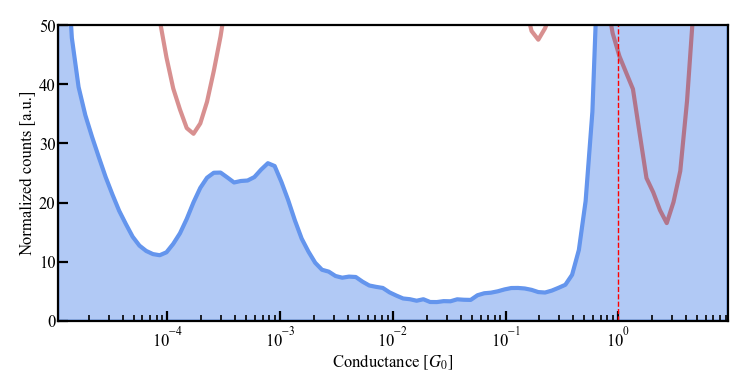

In [4]:
ax = hist.plot_hist_1d(dpi=200)
ax.set_ylim(0, 50)
ax.axvline(1, ls='--', lw=0.5, c='r')

In [145]:
hist.hist_1d_pull

array([102.0275  ,  67.2815  ,  47.901125,  39.549875,  34.774875,
        31.083875,  27.655125,  24.318875,  21.369375,  18.599125,
        16.34075 ,  14.199   ,  12.699375,  11.797   ,  11.26375 ,
        11.07225 ,  11.567125,  13.00075 ,  14.79    ,  17.22625 ,
        20.031625,  22.47525 ,  24.193125,  25.03925 ,  25.06775 ,
        24.24275 ,  23.389375,  23.64175 ,  23.72425 ,  24.304875,
        25.572625,  26.6555  ,  26.175125,  23.485125,  20.402   ,
        16.951875,  13.882375,  11.68325 ,   9.79475 ,   8.610875,
         8.293875,   7.555375,   7.264875,   7.450625,   7.3835  ,
         6.5935  ,   5.945875,   5.717625,   5.529125,   4.777625,
         4.237375,   3.74825 ,   3.624375,   3.366875,   3.618875,
         3.150875,   3.140875,   3.29625 ,   3.27075 ,   3.60575 ,
         3.530875,   3.50425 ,   4.292   ,   4.631375,   4.732625,
         4.961125,   5.28075 ,   5.516125,   5.53075 ,   5.43925 ,
         5.2095  ,   4.831   ,   4.75525 ,   5.083625,   5.556

In [144]:
hist.temporal_hist_pull.sum(axis=0)/8000

array([102.0275  ,  67.2815  ,  47.901125,  39.549875,  34.774875,
        31.083875,  27.655125,  24.318875,  21.369375,  18.599125,
        16.34075 ,  14.199   ,  12.699375,  11.797   ,  11.26375 ,
        11.07225 ,  11.567125,  13.00075 ,  14.79    ,  17.22625 ,
        20.031625,  22.47525 ,  24.193125,  25.03925 ,  25.06775 ,
        24.24275 ,  23.389375,  23.64175 ,  23.72425 ,  24.304875,
        25.572625,  26.6555  ,  26.175125,  23.485125,  20.402   ,
        16.951875,  13.882375,  11.68325 ,   9.79475 ,   8.610875,
         8.293875,   7.555375,   7.264875,   7.450625,   7.3835  ,
         6.5935  ,   5.945875,   5.717625,   5.529125,   4.777625,
         4.237375,   3.74825 ,   3.624375,   3.366875,   3.618875,
         3.150875,   3.140875,   3.29625 ,   3.27075 ,   3.60575 ,
         3.530875,   3.50425 ,   4.292   ,   4.631375,   4.732625,
         4.961125,   5.28075 ,   5.516125,   5.53075 ,   5.43925 ,
         5.2095  ,   4.831   ,   4.75525 ,   5.083625,   5.556

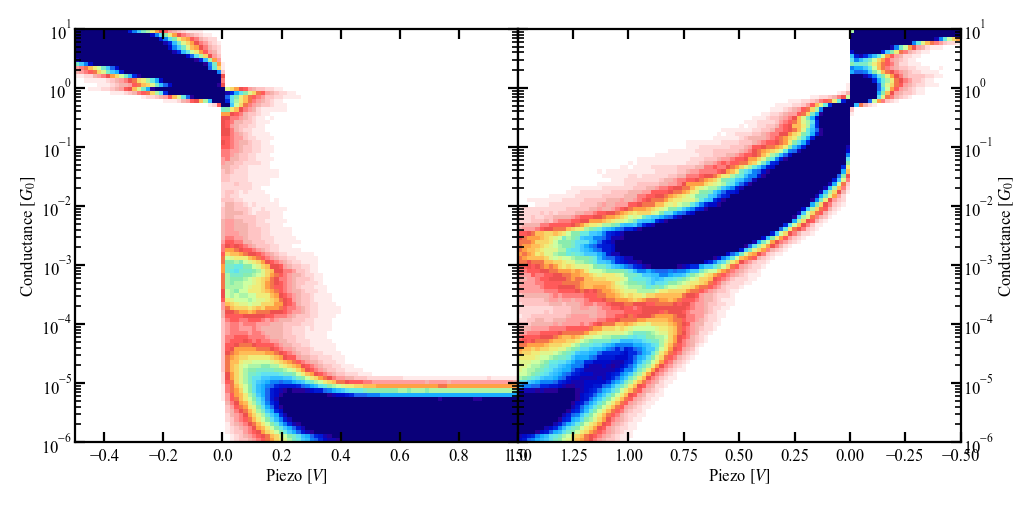

In [5]:
ax_pull, ax_push = hist.plot_hist_2d_both(dpi=200, vmax=32000)

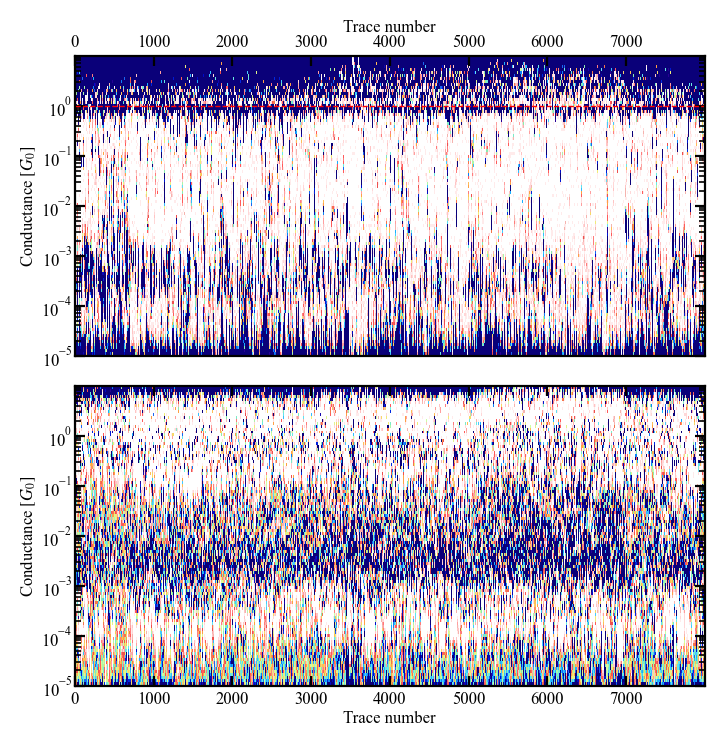

In [6]:
ax_temp_pull, ax_temp_push = hist.plot_temporal_hist(vmax_pull=30, vmax_push=200, dpi=200)
ax_temp_pull.axhline(1, ls='--', lw=0.5, c='r')

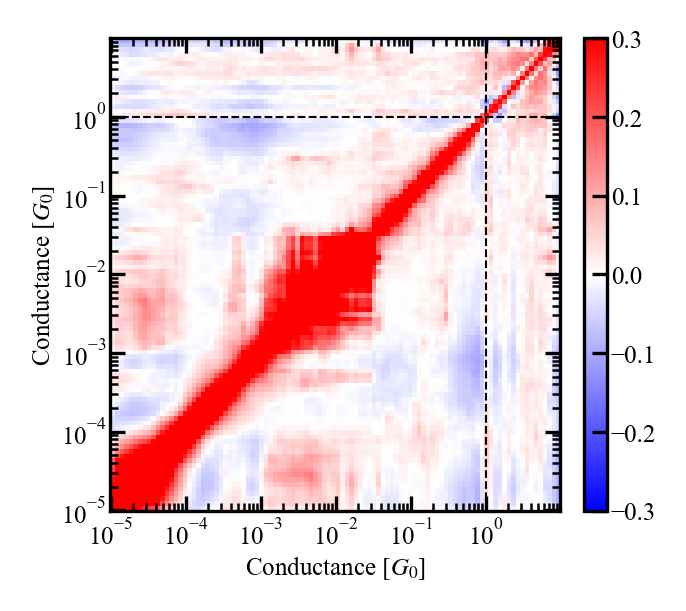

In [7]:
ax_corr, ax_cbar = hist.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

# Calculate principal components, and select traces (20%)

In [8]:
pc = PCA(hist=hist, num_of_pcs=5)
pc.calc_principal_components(direction='pull')

pc.project_to_pcs()
pc.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(0.0, 100.0)

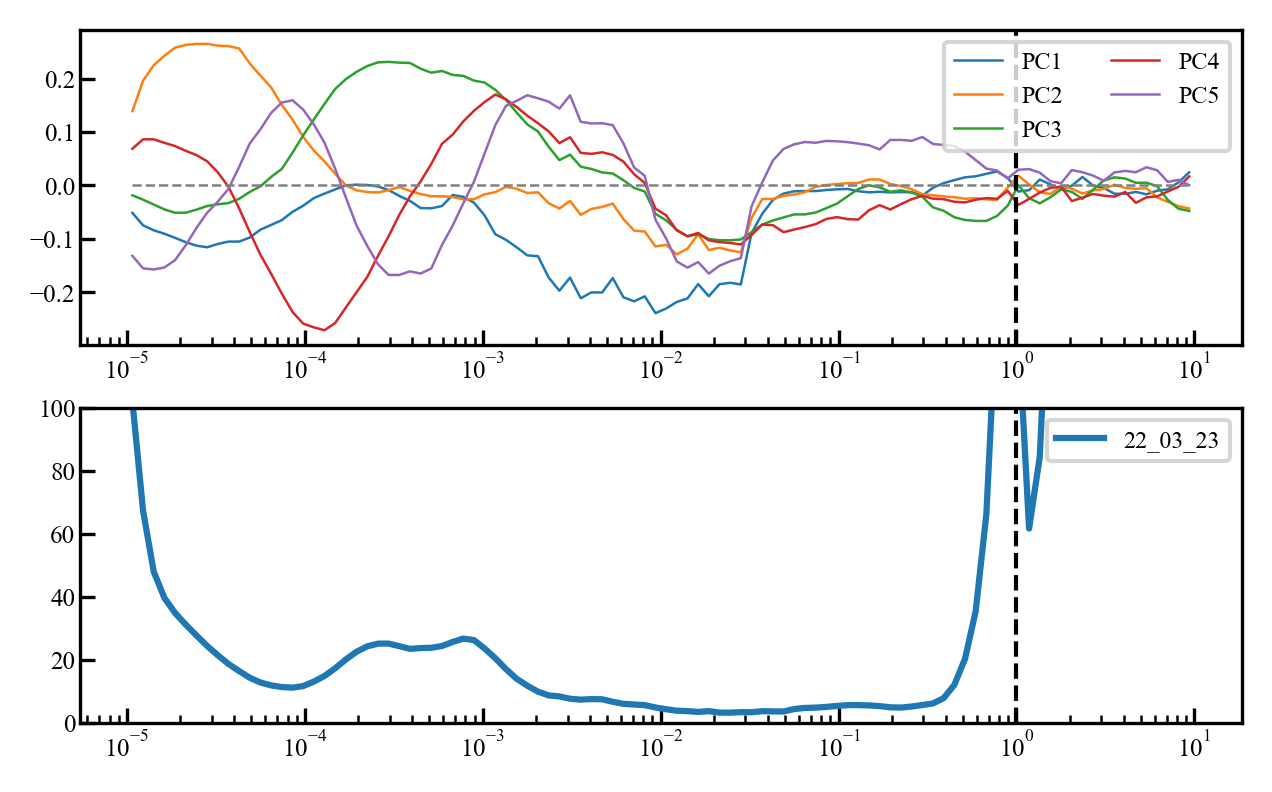

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc.plot_pcs(ax=ax1)
ax1.set_xscale('linear')
ax2.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='22_03_23')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set_ylim(0, 100)

## Compare group histograms

In [10]:
pc.calc_group_histograms(conductance_range=(1e-5, 10),
                         conductance_bins_num=100,
                         conductance_log_scale=True,
                         conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC1 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC1 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC3 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC3 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC5 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC5 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces


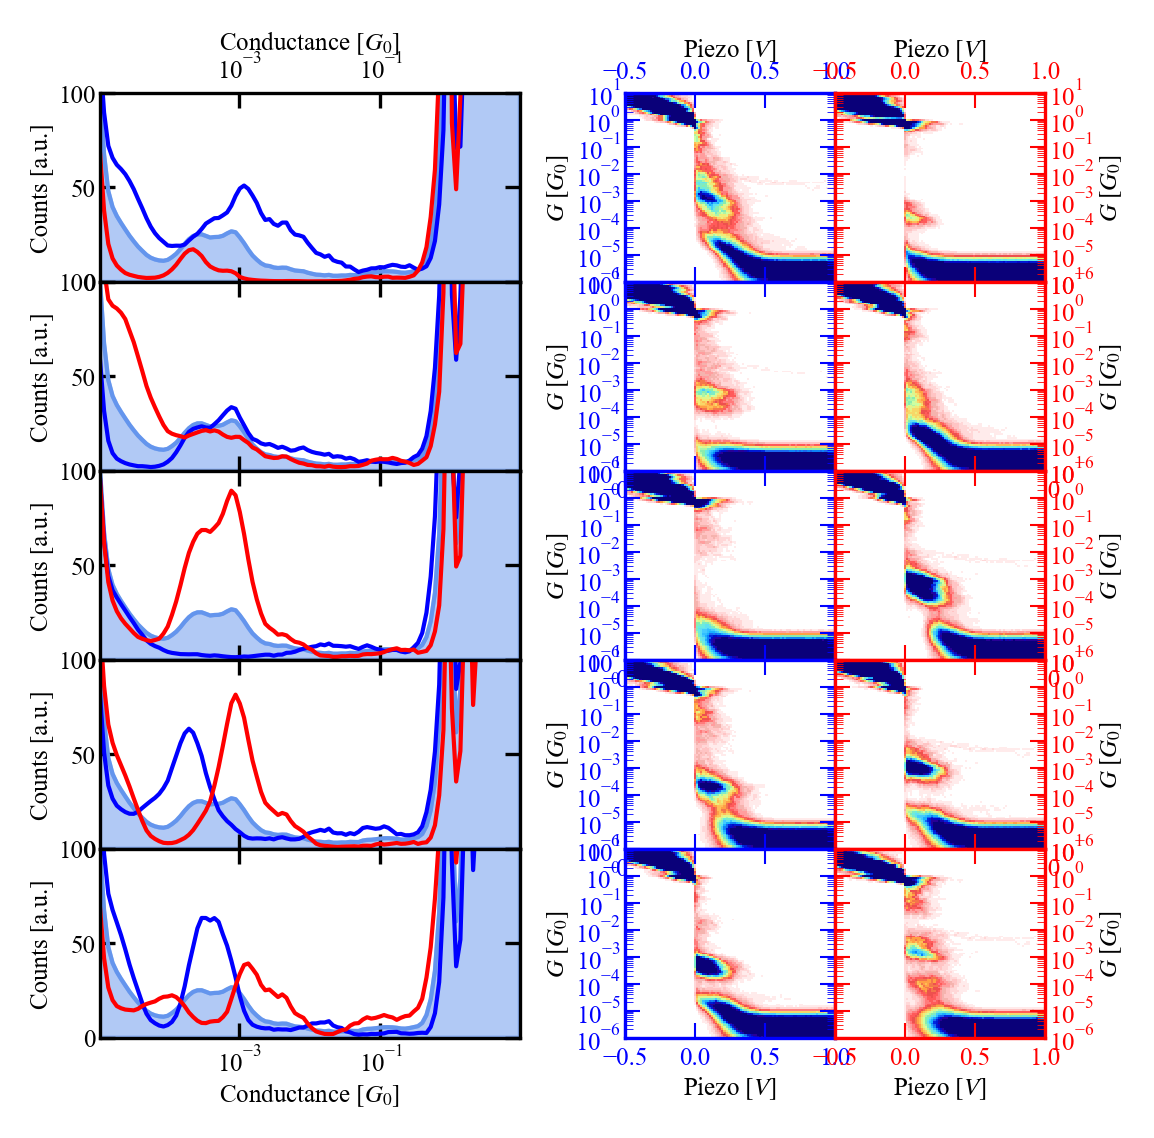

In [11]:
fig = plt.figure(figsize=utils.cm2inch(10, 10), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=pc.num_of_pcs, ncols=2, width_ratios=(1, 1), height_ratios=(1, )*pc.num_of_pcs,
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0)

gs_2d = gridspec.GridSpecFromSubplotSpec(nrows=pc.num_of_pcs, ncols=2, width_ratios=(1, 1),
                                          subplot_spec=gs[:, 1],
                                          wspace=0, hspace=0) 

axs_1d = []
axs_2d_pull = []
axs_2d_push = []

for i, pc_key in enumerate(pc.pc_keys):
    axs_1d.append(fig.add_subplot(gs[i, 0]))
    axs_2d_pull.append(fig.add_subplot(gs_2d[i, 0]))
    axs_2d_push.append(fig.add_subplot(gs_2d[i, 1]))
    
    if i%pc.num_of_pcs == 0:
        axs_1d[i].xaxis.tick_top()
        axs_1d[i].xaxis.set_label_position('top')
        axs_2d_pull[i].xaxis.tick_top()
        axs_2d_pull[i].xaxis.set_label_position('top')
        axs_2d_push[i].xaxis.tick_top()
        axs_2d_push[i].xaxis.set_label_position('top')
    
    axs_1d[i].xaxis.set_ticks_position('both')
    axs_1d[i].yaxis.set_ticks_position('both')
    axs_2d_pull[i].xaxis.set_ticks_position('both')
    axs_2d_pull[i].yaxis.set_ticks_position('both')
    axs_2d_push[i].xaxis.set_ticks_position('both')
    axs_2d_push[i].yaxis.set_ticks_position('both')
    
    axs_2d_push[i].yaxis.tick_right()
    axs_2d_push[i].yaxis.set_label_position('right')

    axs_1d[i] = hist.plot_hist_1d(ax = axs_1d[i], direction='pull', ylims=(0, 100), lw=1)
    axs_1d[i].plot(pc.hist_group1[pc_key].hist_1d_bins, pc.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
    axs_1d[i].plot(pc.hist_group2[pc_key].hist_1d_bins, pc.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')
    axs_2d_pull[i] = pc.hist_group1[pc_key].plot_hist_2d_one(direction='pull', ax=axs_2d_pull[i], vmax=6400)
    # axs_2d_push[i] = pc.hist_group1[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=6400)
    axs_2d_push[i] = pc.hist_group2[pc_key].plot_hist_2d_one(direction='pull', ax=axs_2d_push[i], vmax=6400)
    # axs_2d_push[i] = pc.hist_group2[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=6400)
    
    axs_1d[i].set_ylabel('Counts [a.u.]')
    axs_2d_pull[i].set_ylabel(r'$G\;[G_{0}]$')
    axs_2d_push[i].set_ylabel(r'$G\;[G_{0}]$')
    
    axs_2d_pull[i].spines['bottom'].set_color('b')
    axs_2d_pull[i].spines['top'].set_color('b') 
    axs_2d_pull[i].spines['right'].set_color('b')
    axs_2d_pull[i].spines['left'].set_color('b')
    
    axs_2d_pull[i].tick_params(axis='x', colors='b', which='major', width=0.5)
    axs_2d_pull[i].tick_params(axis='x', colors='b', which='minor', width=0.2)
    axs_2d_pull[i].tick_params(axis='y', colors='b', which='both', width=0.5)
    axs_2d_pull[i].tick_params(axis='y', colors='b', which='minor', width=0.2)
    
    axs_2d_push[i].spines['bottom'].set_color('r')
    axs_2d_push[i].spines['top'].set_color('r') 
    axs_2d_push[i].spines['right'].set_color('r')
    axs_2d_push[i].spines['left'].set_color('r')
    
    axs_2d_push[i].tick_params(axis='x', colors='r', which='major', width=0.5)
    axs_2d_push[i].tick_params(axis='x', colors='r', which='minor', width=0.2)
    axs_2d_push[i].tick_params(axis='y', colors='r', which='both', width=0.5)
    axs_2d_push[i].tick_params(axis='y', colors='r', which='minor', width=0.2)
    
    axs_2d_pull[i].set_xticks([-0.5, 0, 0.5, 1])
    axs_2d_push[i].set_xticks([-0.5, 0, 0.5, 1])

# Select traces that show both plateaus

In [12]:
lowG = (8e-5, 4e-4)
highG = (4e-4, 3e-3)

In [13]:
hist.plateau_length_pull = None
hist.plateau_length_push = None
hist.calc_plateau_lengths(low_bound_pull=lowG[0], high_bound_pull=lowG[1],
                          low_bound_push=lowG[0], high_bound_push=lowG[1])

In [14]:
hist.calc_plateau_length_hist(xrange=(0, 4000), xbins=100)

(0, 4000)


<AxesSubplot:xlabel='Plateau length [points]', ylabel='Counts [a.u.]'>

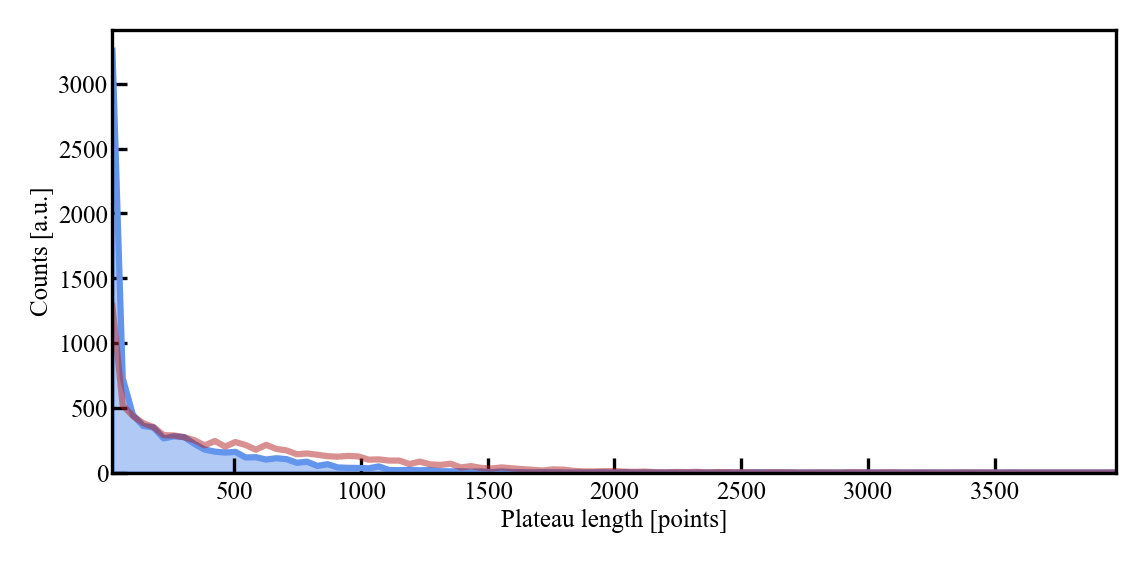

In [15]:
hist.plot_plateau_length_hist(dpi=300)

In [16]:
hist.plateau_length_pull[hist.plateau_length_pull > 400].shape

(1672,)

In [17]:
hist.calc_plateau_lengths(low_bound_pull=highG[0], high_bound_pull=highG[1],
                          low_bound_push=highG[0], high_bound_push=highG[1])

In [18]:
hist.calc_plateau_length_hist(xrange=(0, 6000), xbins=100)

(0, 6000)


<AxesSubplot:xlabel='Plateau length [points]', ylabel='Counts [a.u.]'>

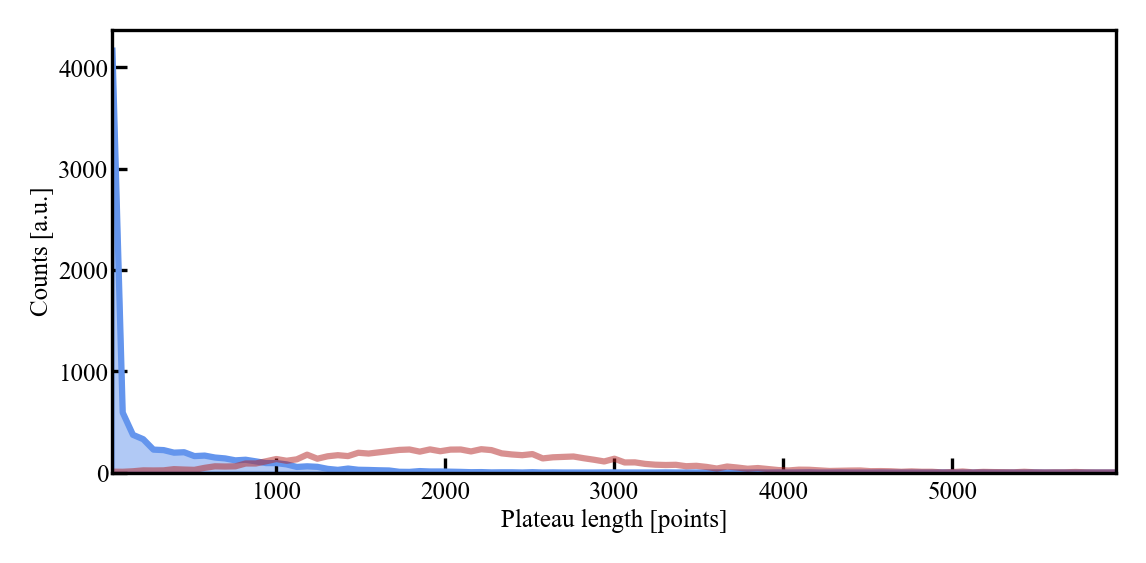

In [19]:
hist.plot_plateau_length_hist(dpi=300)

In [22]:
hist.plateau_length_pull[hist.plateau_length_pull > 400].shape

(1981,)

In [23]:
def filter_plat_length(trace_pair: TracePair, conductance_range: Tuple[float, float], min_length: int = 400):
    plateau_length_pull, _, plateau_length_push, _ = trace_pair.calc_plateau_length(low_bound_pull=conductance_range[0], high_bound_pull=conductance_range[1],
                                                                                    low_bound_push=conductance_range[0], high_bound_push=conductance_range[1])
    
    pull = plateau_length_pull > min_length
    push = plateau_length_push > min_length
    
    return pull, push

In [24]:
low_pull, low_push = filter_traces.filter_bj(folder=home_folder,
                               filter_condition=filter_plat_length,
                               traces=hist.traces,
                               conductance_range=lowG, min_length=200)

high_pull, high_push = filter_traces.filter_bj(folder=home_folder,
                               filter_condition=filter_plat_length,
                               traces=hist.traces,
                               conductance_range=highG, min_length=200)

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

In [25]:
print(low_pull.shape)
print(low_push.shape)
print(high_pull.shape)
print(high_push.shape)

(2882,)
(5044,)
(2758,)
(7967,)


In [26]:
print(np.intersect1d(low_pull, high_pull).shape)
print(np.intersect1d(low_push, high_push).shape)

(1484,)
(5017,)


In [27]:
hist_both_more = Histogram(folder=home_folder,
                           traces=np.intersect1d(low_pull, high_pull),  #8000
                           conductance_range=(1e-5, 10),
                           conductance_log_scale=True,
                           conductance_bins_num=100,
                           conductance_bins_mode='total')

hist_both_more.calc_stats(align_at=0.5, interpolate=True,
                          range_pull=(-0.5, 1),
                          range_push=(-0.5, 1.5))

hist_both_more.calc_corr_hist_2d()

  0%|          | 0/1484 [00:00<?, ?it/s]

Pull 2D histogram created from 1484 traces
Push 2D histogram created from 1484 traces


  0%|          | 0/1484 [00:00<?, ?it/s]

(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

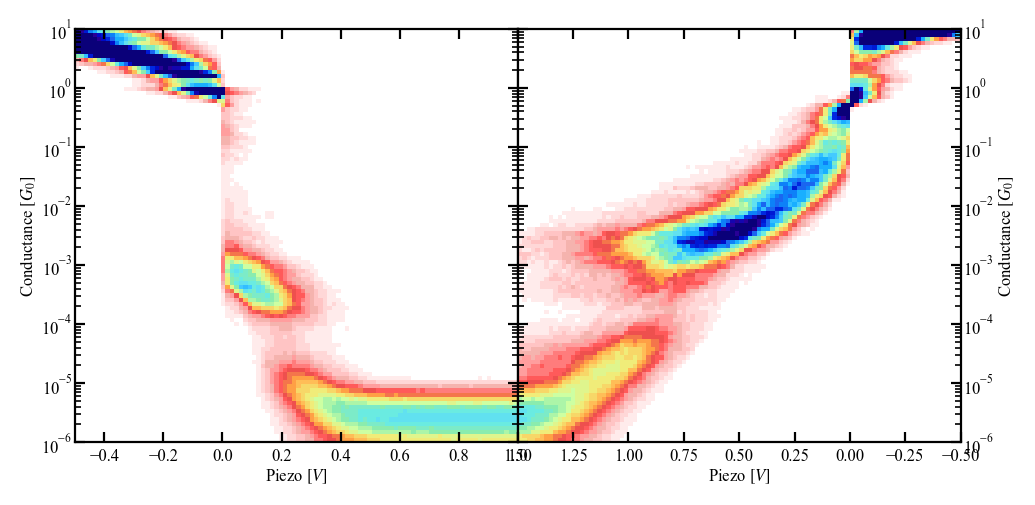

In [28]:
hist_both_more.plot_hist_2d_both(dpi=200, vmax=15000)

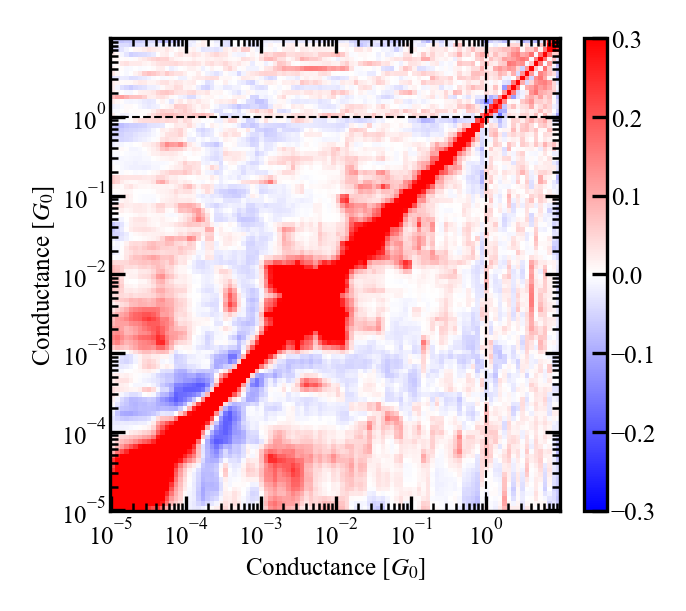

In [29]:
ax_corr, ax_cbar = hist_both_more.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [30]:
pc_both = PCA(hist=hist_both_more, num_of_pcs=5)
pc_both.calc_principal_components(direction='pull')

pc_both.project_to_pcs()
pc_both.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_both.select_percentage(percentage=50, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [138]:
pc_both.pc_vals

{'PC1': 0.10929169256072516,
 'PC2': 0.07711294052501294,
 'PC3': 0.05714005949558081,
 'PC4': 0.047762973047493655,
 'PC5': 0.03716165789012929}

(0.0, 100.0)

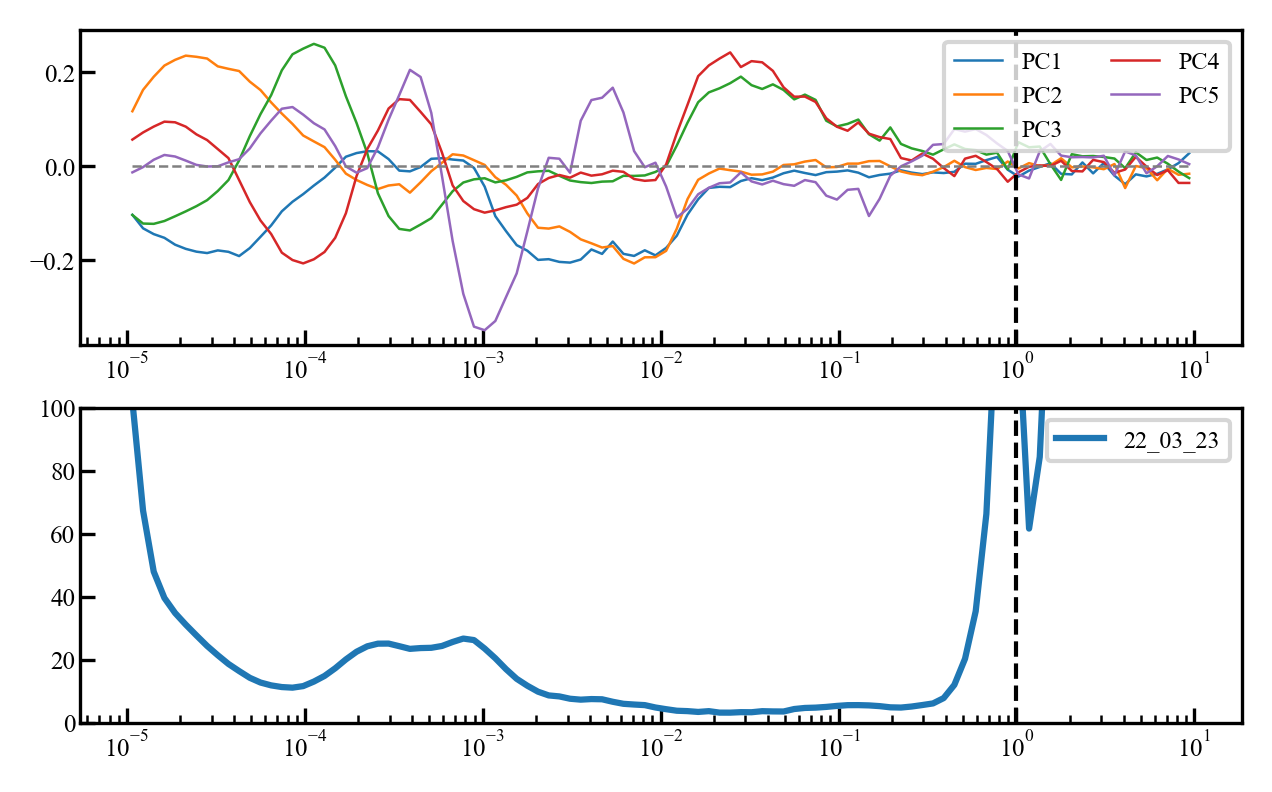

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_both.plot_pcs(ax=ax1)
ax1.set_xscale('linear')
ax2.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='22_03_23')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set_ylim(0, 100)

In [32]:
pc_both.calc_group_histograms(conductance_range=(1e-5, 10),
                              conductance_bins_num=100,
                              conductance_log_scale=True,
                              conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC1 group1.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC1 group2.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC3 group1.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC3 group2.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC5 group1.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces
Calculating 1D and 2D histograms of PC5 group2.


  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

2D histogram pull direction created from 742 traces
2D histogram push direction created from 742 traces


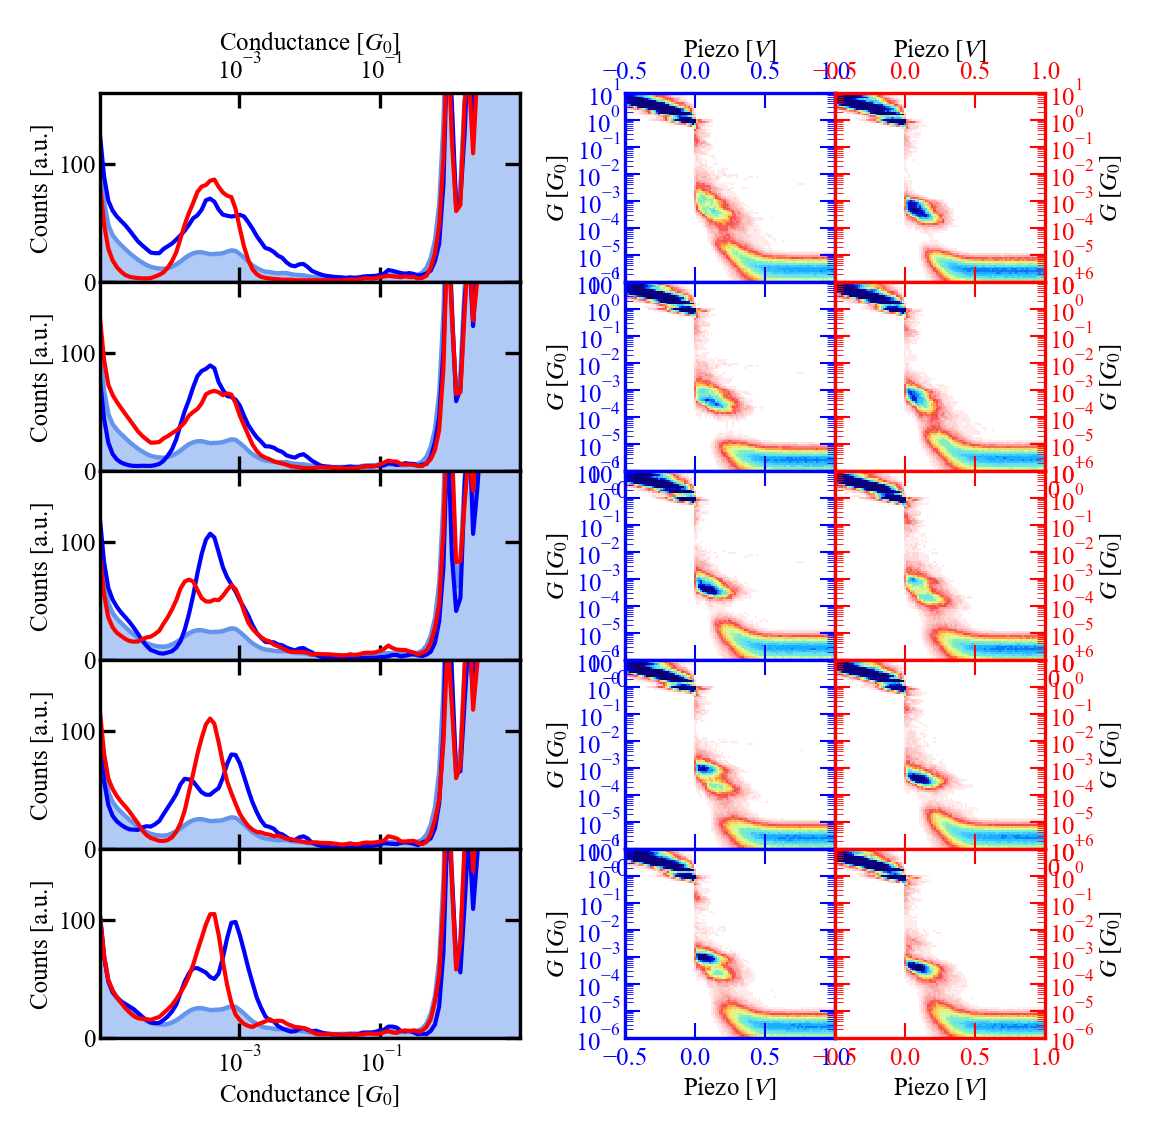

In [33]:
fig = plt.figure(figsize=utils.cm2inch(10, pc_both.num_of_pcs*2), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=pc_both.num_of_pcs, ncols=2, width_ratios=(1, 1), height_ratios=(1, )*pc_both.num_of_pcs,
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0)

gs_2d = gridspec.GridSpecFromSubplotSpec(nrows=pc_both.num_of_pcs, ncols=2, width_ratios=(1, 1),
                                          subplot_spec=gs[:, 1],
                                          wspace=0, hspace=0) 

axs_1d = []
axs_2d_pull = []
axs_2d_push = []

for i, pc_key in enumerate(pc_both.pc_keys):
    axs_1d.append(fig.add_subplot(gs[i, 0]))
    axs_2d_pull.append(fig.add_subplot(gs_2d[i, 0]))
    axs_2d_push.append(fig.add_subplot(gs_2d[i, 1]))
    
    if i%pc_both.num_of_pcs == 0:
        axs_1d[i].xaxis.tick_top()
        axs_1d[i].xaxis.set_label_position('top')
        axs_2d_pull[i].xaxis.tick_top()
        axs_2d_pull[i].xaxis.set_label_position('top')
        axs_2d_push[i].xaxis.tick_top()
        axs_2d_push[i].xaxis.set_label_position('top')
    
    axs_1d[i].xaxis.set_ticks_position('both')
    axs_1d[i].yaxis.set_ticks_position('both')
    axs_2d_pull[i].xaxis.set_ticks_position('both')
    axs_2d_pull[i].yaxis.set_ticks_position('both')
    axs_2d_push[i].xaxis.set_ticks_position('both')
    axs_2d_push[i].yaxis.set_ticks_position('both')
    
    axs_2d_push[i].yaxis.tick_right()
    axs_2d_push[i].yaxis.set_label_position('right')

    axs_1d[i] = hist.plot_hist_1d(ax = axs_1d[i], direction='pull', ylims=(0, 160), lw=1)
    axs_1d[i].plot(pc_both.hist_group1[pc_key].hist_1d_bins, pc_both.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
    axs_1d[i].plot(pc_both.hist_group2[pc_key].hist_1d_bins, pc_both.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')
    axs_2d_pull[i] = pc_both.hist_group1[pc_key].plot_hist_2d_one(direction='pull', ax=axs_2d_pull[i], vmax=6400)
    # axs_2d_push[i] = pc_both.hist_group1[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=6400)
    axs_2d_push[i] = pc_both.hist_group2[pc_key].plot_hist_2d_one(direction='pull', ax=axs_2d_push[i], vmax=6400)
    # axs_2d_push[i] = pc_both.hist_group2[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=6400)
    
    axs_1d[i].set_ylabel('Counts [a.u.]')
    axs_2d_pull[i].set_ylabel(r'$G\;[G_{0}]$')
    axs_2d_push[i].set_ylabel(r'$G\;[G_{0}]$')
    
    axs_2d_pull[i].spines['bottom'].set_color('b')
    axs_2d_pull[i].spines['top'].set_color('b') 
    axs_2d_pull[i].spines['right'].set_color('b')
    axs_2d_pull[i].spines['left'].set_color('b')
    
    axs_2d_pull[i].tick_params(axis='x', colors='b', which='major', width=0.5)
    axs_2d_pull[i].tick_params(axis='x', colors='b', which='minor', width=0.2)
    axs_2d_pull[i].tick_params(axis='y', colors='b', which='both', width=0.5)
    axs_2d_pull[i].tick_params(axis='y', colors='b', which='minor', width=0.2)
    
    axs_2d_push[i].spines['bottom'].set_color('r')
    axs_2d_push[i].spines['top'].set_color('r') 
    axs_2d_push[i].spines['right'].set_color('r')
    axs_2d_push[i].spines['left'].set_color('r')
    
    axs_2d_push[i].tick_params(axis='x', colors='r', which='major', width=0.5)
    axs_2d_push[i].tick_params(axis='x', colors='r', which='minor', width=0.2)
    axs_2d_push[i].tick_params(axis='y', colors='r', which='both', width=0.5)
    axs_2d_push[i].tick_params(axis='y', colors='r', which='minor', width=0.2)
    
    axs_2d_pull[i].set_xticks([-0.5, 0, 0.5, 1])
    axs_2d_push[i].set_xticks([-0.5, 0, 0.5, 1])

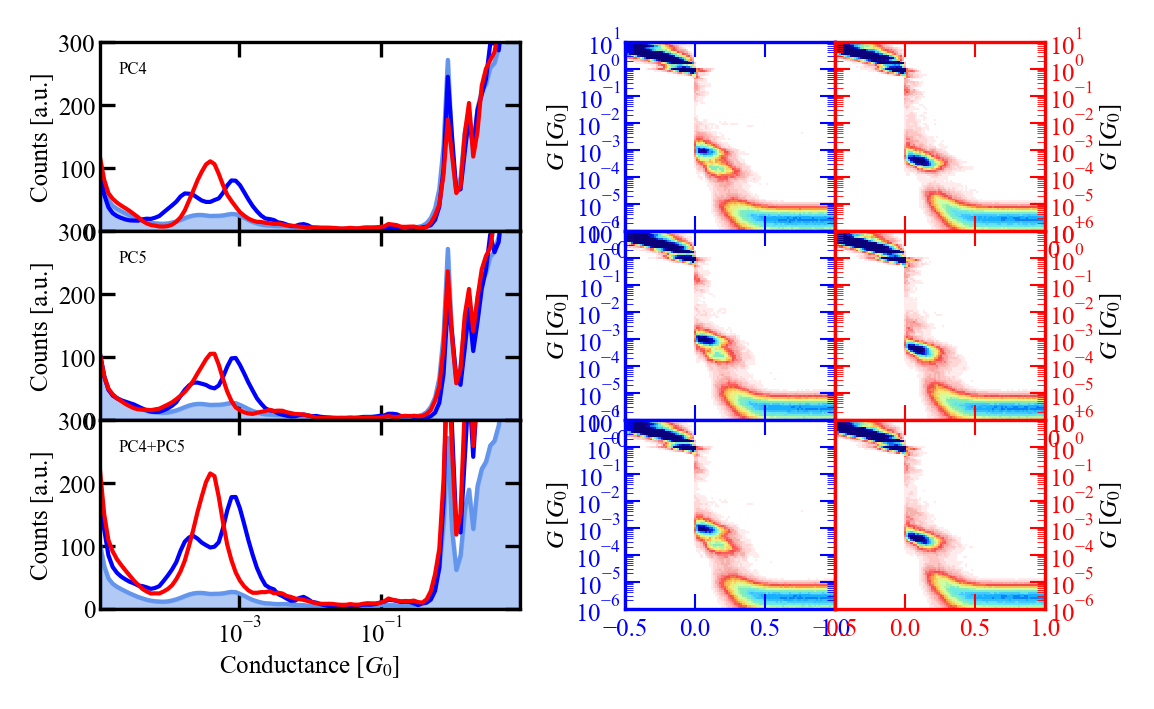

In [34]:
fig = plt.figure(figsize=utils.cm2inch(10, 3*2), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=3, ncols=2, width_ratios=(1, 1), height_ratios=(1, )*3,
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0)

gs_2d = gridspec.GridSpecFromSubplotSpec(nrows=3, ncols=2,  width_ratios=(1, 1), height_ratios=(1, )*3,
                                         subplot_spec=gs[:, 1],
                                         wspace=0, hspace=0) 

axs_1d = []
axs_2d_pull = []
axs_2d_push = []

for i, pc_key in enumerate(('PC4', 'PC5', 'PC4+PC5')):
    axs_1d.append(fig.add_subplot(gs[i, 0]))
    axs_2d_pull.append(fig.add_subplot(gs_2d[i, 0]))
    axs_2d_push.append(fig.add_subplot(gs_2d[i, 1]))
    
    axs_1d[i].xaxis.set_ticks_position('both')
    axs_1d[i].yaxis.set_ticks_position('both')
    axs_2d_pull[i].xaxis.set_ticks_position('both')
    axs_2d_pull[i].yaxis.set_ticks_position('both')
    axs_2d_push[i].xaxis.set_ticks_position('both')
    axs_2d_push[i].yaxis.set_ticks_position('both')
    
    axs_2d_push[i].yaxis.tick_right()
    axs_2d_push[i].yaxis.set_label_position('right')
    
    axs_2d_pull[i].set_yscale('log')
    axs_2d_push[i].set_yscale('log')
    
    axs_2d_pull[i].yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
    axs_2d_pull[i].yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.1), numticks=9))
    axs_2d_pull[i].yaxis.set_minor_formatter(ticker.NullFormatter())
    
    axs_2d_push[i].yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
    axs_2d_push[i].yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.1), numticks=9))
    axs_2d_push[i].yaxis.set_minor_formatter(ticker.NullFormatter())
    
    axs_1d[i] = hist.plot_hist_1d(ax = axs_1d[i], direction='pull', ylims=(0, 300), lw=1)
    try:
        axs_1d[i].plot(pc_both.hist_group1[pc_key].hist_1d_bins, pc_both.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
        axs_1d[i].plot(pc_both.hist_group2[pc_key].hist_1d_bins, pc_both.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')
        axs_2d_pull[i] = pc_both.hist_group1[pc_key].plot_hist_2d_one(direction='pull', ax=axs_2d_pull[i], vmax=6400)
        # axs_2d_push[i] = pc_both.hist_group1[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=6400)
        axs_2d_push[i] = pc_both.hist_group2[pc_key].plot_hist_2d_one(direction='pull', ax=axs_2d_push[i], vmax=6400)
        # axs_2d_push[i] = pc_both.hist_group2[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=6400)
    except KeyError:
        axs_1d[i].plot(pc_both.hist_group1['PC4'].hist_1d_bins, pc_both.hist_group1['PC4'].hist_1d_pull + pc_both.hist_group1['PC5'].hist_1d_pull, lw=1, c='b')
        axs_1d[i].plot(pc_both.hist_group2['PC4'].hist_1d_bins, pc_both.hist_group2['PC4'].hist_1d_pull + pc_both.hist_group2['PC5'].hist_1d_pull, lw=1, c='r')
        axs_2d_pull[i].pcolormesh(pc_both.hist_group1['PC4'].hist_2d_xmesh_pull,
                                  pc_both.hist_group1['PC4'].hist_2d_ymesh_pull,
                                  pc_both.hist_group1['PC4'].hist_2d_pull + pc_both.hist_group1['PC5'].hist_2d_pull, cmap=utils.cmap_geo32, vmax=12800)
        # axs_2d_push[i] = pc_both.hist_group1[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=6400)
        axs_2d_push[i].pcolormesh(pc_both.hist_group2['PC4'].hist_2d_xmesh_pull,
                                  pc_both.hist_group2['PC4'].hist_2d_ymesh_pull,
                                  pc_both.hist_group2['PC4'].hist_2d_pull + pc_both.hist_group2['PC5'].hist_2d_pull, cmap=utils.cmap_geo32, vmax=12800)
        # axs_2d_push[i] = pc_both.hist_group2[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=6400)
    
    axs_1d[i].set_ylabel('Counts [a.u.]')
    axs_2d_pull[i].set_ylabel(r'$G\;[G_{0}]$')
    axs_2d_push[i].set_ylabel(r'$G\;[G_{0}]$')
    
    axs_1d[i].text(2e-5, 250, pc_key, fontsize=4)
    
    axs_2d_pull[i].spines['bottom'].set_color('b')
    axs_2d_pull[i].spines['top'].set_color('b') 
    axs_2d_pull[i].spines['right'].set_color('b')
    axs_2d_pull[i].spines['left'].set_color('b')
    
    axs_2d_pull[i].tick_params(axis='x', colors='b', which='major', width=0.5)
    axs_2d_pull[i].tick_params(axis='x', colors='b', which='minor', width=0.2)
    axs_2d_pull[i].tick_params(axis='y', colors='b', which='both', width=0.5)
    axs_2d_pull[i].tick_params(axis='y', colors='b', which='minor', width=0.2)
    
    axs_2d_push[i].spines['bottom'].set_color('r')
    axs_2d_push[i].spines['top'].set_color('r') 
    axs_2d_push[i].spines['right'].set_color('r')
    axs_2d_push[i].spines['left'].set_color('r')
    
    axs_2d_push[i].tick_params(axis='x', colors='r', which='major', width=0.5)
    axs_2d_push[i].tick_params(axis='x', colors='r', which='minor', width=0.2)
    axs_2d_push[i].tick_params(axis='y', colors='r', which='both', width=0.5)
    axs_2d_push[i].tick_params(axis='y', colors='r', which='minor', width=0.2)
    
    axs_2d_pull[i].set_xticks([-0.5, 0, 0.5, 1])
    axs_2d_push[i].set_xticks([-0.5, 0, 0.5, 1])

In [35]:
# Parameters

param_align_at=2e-2
param_interpolate=False
param_win_size=256
param_step_size=None
param_skip_points=50
param_end_point=3000
param_tolerance=2
param_freq_range=(2000, 5000)

### PC4

In [250]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_both_pc4_50.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     for trace in tqdm(pc_both.hist_group1['PC4'].traces):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end', freq_range=param_freq_range)

#         trace_group = f.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

  0%|          | 0/742 [00:00<?, ?it/s]

In [36]:
areas_all_1 = []
cond_avg_all_1 = []
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_both_pc4_50.h5'), 'r') as f:
    for trace in tqdm(list(f.keys())):
        # trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)

  0%|          | 0/742 [00:00<?, ?it/s]

In [37]:
areas_all_start_end_both_pc4 = np.array(areas_all_1)
cond_avg_all_start_end_both_pc4 = np.array(cond_avg_all_1)

In [38]:
print(cond_avg_all_start_end_both_pc4.flatten()[cond_avg_all_start_end_both_pc4.flatten() > 1e-5].shape[0])
print(cond_avg_all_start_end_both_pc4.flatten()[cond_avg_all_start_end_both_pc4.flatten() > 1e-5].shape[0]/(cond_avg_all_start_end_both_pc4.flatten().shape[0]))

10084
0.32357848799897315


### PC5

In [254]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_both_pc5_50.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     for trace in tqdm(pc_both.hist_group1['PC5'].traces):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end', freq_range=param_freq_range)

#         trace_group = f.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

  0%|          | 0/742 [00:00<?, ?it/s]

In [39]:
areas_all_1 = []
cond_avg_all_1 = []
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_both_pc5_50.h5'), 'r') as f:
    for trace in tqdm(list(f.keys())):
        # trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)

  0%|          | 0/742 [00:00<?, ?it/s]

In [40]:
areas_all_start_end_both_pc5 = np.array(areas_all_1)
cond_avg_all_start_end_both_pc5 = np.array(cond_avg_all_1)

In [41]:
print(cond_avg_all_start_end_both_pc5.flatten()[cond_avg_all_start_end_both_pc5.flatten() > 1e-5].shape[0])
print(cond_avg_all_start_end_both_pc5.flatten()[cond_avg_all_start_end_both_pc5.flatten() > 1e-5].shape[0]/(cond_avg_all_start_end_both_pc5.flatten().shape[0]))

10567
0.3390771402900783


### PC4 & PC5

In [42]:
np.unique(np.hstack((pc_both.hist_group1['PC4'].traces, pc_both.hist_group1['PC5'].traces))).shape

(998,)

In [259]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_both_pc4-pc5_50.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     for trace in tqdm(np.unique(np.hstack((pc_both.hist_group1['PC4'].traces, pc_both.hist_group1['PC5'].traces)))):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end', freq_range=param_freq_range)

#         trace_group = f.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

  0%|          | 0/998 [00:00<?, ?it/s]

In [43]:
areas_all_1 = []
cond_avg_all_1 = []
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_both_pc4-pc5_50.h5'), 'r') as f:
    for trace in tqdm(list(f.keys())):
        # trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)

  0%|          | 0/998 [00:00<?, ?it/s]

In [44]:
areas_all_start_end_both_pc4_pc5 = np.array(areas_all_1)
cond_avg_all_start_end_both_pc4_pc5 = np.array(cond_avg_all_1)

In [45]:
print(cond_avg_all_start_end_both_pc4_pc5.flatten()[cond_avg_all_start_end_both_pc4_pc5.flatten() > 1e-5].shape[0])
print(cond_avg_all_start_end_both_pc4_pc5.flatten()[cond_avg_all_start_end_both_pc4_pc5.flatten() > 1e-5].shape[0]/(cond_avg_all_start_end_both_pc4_pc5.flatten().shape[0]))

13877
0.3310668956961542


In [47]:
def calc_2d_noise(cond_avg_all, areas_all):

    xrange = (1e-5, 1e-2)
    yrange = (1e-2, 1)

    num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
    num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

    xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(20 * num_of_decs_x)+1)
    ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(20 * num_of_decs_y)+1)

    # h1, xedges, yedges = np.histogram2d(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0],
    #                                           np.sqrt(areas_all_1.flatten()[cond_avg_all_1.flatten()>0])/(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0]),
    #                                           bins=[xbins, ybins])
    # x_mesh, y_mesh = np.meshgrid(xedges, yedges)
    
    h, xedges, yedges = np.histogram2d(cond_avg_all.flatten()[cond_avg_all.flatten()>0],
                                       np.sqrt(areas_all.flatten()[cond_avg_all.flatten()>0])/(cond_avg_all.flatten()[cond_avg_all.flatten()>0]),
                                       bins=[xbins, ybins])
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)
    
    print(np.all(xbins == x_mesh[0, :]))
    
    gauss_fit_params = np.zeros((h.T.shape[1], 3))
    bar_width = np.diff(y_mesh[:, 0])
    ybins = y_mesh[:, 0][:-1] + bar_width / 2
    for i in range(h.T.shape[1]):
        try:
            popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(ybins), ydata=h.T[:, i], p0=(1, -1, 1))
            # perr = np.sqrt(np.diag(pcov))
            gauss_fit_params[i, :] = popt
        except RuntimeError:
            gauss_fit_params[i, :] = [None, None, None]

    # np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr1_avg_dev_both_config.txt'), h_both_1)
    # np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr1_avg_dev_both_config.txt'), x_mesh)
    # np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr1_avg_dev_both_config.txt'), y_mesh)

    # h2, xedges, yedges = np.histogram2d(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0],
    #                                           np.sqrt(areas_all_2.flatten()[cond_avg_all_2.flatten()>0])/(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0]),
    #                                           bins=[xbins, ybins])
    # x_mesh, y_mesh = np.meshgrid(xedges, yedges)

    # np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr2_avg_dev_both_config.txt'), h_both_2)
    # np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr2_avg_dev_both_config.txt'), x_mesh)
    # np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr2_avg_dev_both_config.txt'), y_mesh)
    
    return x_mesh, y_mesh, h.T, gauss_fit_params

def plot_noise_2d(x_mesh, y_mesh, noise_hist_2d, gauss_fit_params):
    fig = plt.figure(figsize=utils.cm2inch(5, 7.5), dpi=300)  # figsize: (width, height) in inches
    gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 2),
                           figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0)

    ax_1d = fig.add_subplot(gs[0])
    ax_2d = fig.add_subplot(gs[1])

    ax_1d.xaxis.tick_top()
    ax_1d.xaxis.set_label_position('top')
    ax_1d.xaxis.set_ticks_position('both')
    ax_1d.yaxis.set_ticks_position('both')

    ax_2d.xaxis.set_ticks_position('both')
    ax_2d.yaxis.set_ticks_position('both')

    bar_width = np.diff(x_mesh[0, :])
    xbins = x_mesh[0, :][:-1] + bar_width / 2
    
    ax_1d.plot(xbins, np.sum(noise_hist_2d, axis=0))
    ax_1d.axvline(8e-5, ls='--', c='k', lw=0.5)
    ax_1d.axvline(4e-4, ls='--', c='k', lw=0.5)
    ax_1d.axvline(3e-3, ls='--', c='k', lw=0.5)
    ax_1d.set_xscale('log')
    ax_1d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
    ax_1d.set_ylabel('Counts')
    
    ax_2d.pcolormesh(x_mesh, y_mesh, noise_hist_2d, cmap=utils.cmap_geo32)
    ax_2d.set_xscale('log')
    ax_2d.set_yscale('log')
    ax_2d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
    ax_2d.set_ylabel(r'$\Delta G/G$')
    ax_2d.plot(xbins, 10**gauss_fit_params[:, 1], c='k')
    ax_2d.plot(xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)], xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)]**-0.5/1050, ls=(0, (2, 1)))
    ax_2d.plot(xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)], xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)]**0/21, ls=(0, (2, 1)), c='lightgrey')
    ax_2d.axvline(8e-5, ls='--', c='k', lw=0.5)
    ax_2d.axvline(4e-4, ls='--', c='k', lw=0.5)
    ax_2d.axvline(3e-3, ls='--', c='k', lw=0.5)
    ax_2d.text(7.5e-5, 1.2e-2, '8e-5', fontsize=4, ha='right')
    ax_2d.text(3.7e-4, 1.2e-2, '4e-4', fontsize=4, ha='right')
    ax_2d.text(2.9e-3, 1.2e-2, '3e-3', fontsize=4, ha='right')

    ax_1d.set_xlim(1e-5, 1e-2)
    ax_2d.set_xlim(1e-5, 1e-2)
    
    return ax_1d, ax_2d

In [50]:
def compare_noise_histograms_plot(x_mesh, y_mesh,
                                  hists: Tuple[np.ndarray, ...],
                                  gauss_fit_params_all:Tuple[np.ndarray, ...],
                                  ylims: Optional[Tuple[float, float]] = None,
                                  titles: Optional[Tuple[str, ...]] = None, **kwargs):
    
    num_cols=len(hists)

    fig = plt.figure(figsize=utils.cm2inch(5*num_cols, 7.5), dpi=300)  # figsize: (width, height) in inches
    
    gs_total = gridspec.GridSpec(nrows=2, ncols=num_cols, height_ratios=(18, 1), width_ratios=(1, )*num_cols,
                                 figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.3)
    
    gs = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=num_cols, height_ratios=(1, 2), width_ratios=(1, )*num_cols,
                                          subplot_spec=gs_total[0, :], wspace=0, hspace=0)
    
    
    
    axs_1d = []
    axs_2d = []
    axs_col_bar = []
    imgs = []
    for i in range(num_cols):
        axs_1d.append(fig.add_subplot(gs[0, i]))
        axs_2d.append(fig.add_subplot(gs[1, i]))
        axs_col_bar.append(fig.add_subplot(gs_total[1, i]))
    
    bar_width = np.diff(x_mesh[0, :])
    xbins = x_mesh[0, :][:-1] + bar_width / 2
    
    for i, (ax_1d, ax_2d) in enumerate(zip(axs_1d, axs_2d)):
    
        ax_1d.xaxis.tick_top()
        ax_1d.xaxis.set_label_position('top')
        if i == num_cols-1:
            ax_1d.yaxis.tick_right()
            ax_1d.yaxis.set_label_position('right')
            ax_1d.set_ylabel('Counts')
            ax_2d.yaxis.tick_right()
            ax_2d.yaxis.set_label_position('right')
            ax_2d.set_ylabel(r'$\Delta G/G$')
        elif i > 0:
            ax_1d.axes.yaxis.set_ticklabels([])
            ax_2d.axes.yaxis.set_ticklabels([])
        else:
            ax_1d.set_ylabel('Counts')
            ax_2d.set_ylabel(r'$\Delta G/G$')
            
        ax_1d.xaxis.set_ticks_position('both')
        ax_1d.yaxis.set_ticks_position('both')
        
        if i == num_cols-1:
            ax_2d.yaxis.tick_right()
            ax_2d.yaxis.set_label_position('right')
        ax_2d.xaxis.set_ticks_position('both')
        ax_2d.yaxis.set_ticks_position('both')

        ax_1d.plot(xbins, np.sum(hists[i], axis=0))
        ax_1d.axvline(8e-5, ls='--', c='k', lw=0.5)
        ax_1d.axvline(4e-4, ls='--', c='k', lw=0.5)
        ax_1d.axvline(3e-3, ls='--', c='k', lw=0.5)
        ax_1d.set_xscale('log')
        ax_1d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
        
        if ylims is not None:
            ax_1d.set_ylim(ylims[0], ylims[1])

        im = ax_2d.pcolormesh(x_mesh, y_mesh, hists[i], cmap=utils.cmap_geo32, **kwargs)
        imgs.append(im)
        plt.colorbar(imgs[i], cax=axs_col_bar[i], orientation='horizontal')
        
        ax_2d.set_xscale('log')
        ax_2d.set_yscale('log')
        ax_2d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
        ax_2d.plot(xbins, 10**gauss_fit_params_all[i][:, 1], c='k')
        ax_2d.plot(xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)], xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)]**-0.5/1050, ls=(0, (2, 1)))
        ax_2d.plot(xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)], xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)]**0/21, ls=(0, (2, 1)), c='lightgrey')
        ax_2d.axvline(8e-5, ls='--', c='k', lw=0.5)
        ax_2d.axvline(4e-4, ls='--', c='k', lw=0.5)
        ax_2d.axvline(3e-3, ls='--', c='k', lw=0.5)
        ax_2d.text(7.5e-5, 1.2e-2, '8e-5', fontsize=4, ha='right')
        ax_2d.text(3.7e-4, 1.2e-2, '4e-4', fontsize=4, ha='right')
        ax_2d.text(2.9e-3, 1.2e-2, '3e-3', fontsize=4, ha='right')

        ax_1d.set_xlim(1e-5, 1e-2)
        ax_2d.set_xlim(1e-5, 1e-2)
        
        if titles is not None:
            ax_1d.set_title(titles[i], fontsize=6)
        
    return axs_1d, axs_2d

In [51]:
x_mesh, y_mesh, noise_hist_both_pc4, gauss_fit_params_both_pc4 = calc_2d_noise(cond_avg_all_start_end_both_pc4.flatten()[cond_avg_all_start_end_both_pc4.flatten() > 1e-5],
                                                                               areas_all_start_end_both_pc4.flatten()[cond_avg_all_start_end_both_pc4.flatten() > 1e-5])

x_mesh, y_mesh, noise_hist_both_pc5, gauss_fit_params_both_pc5 = calc_2d_noise(cond_avg_all_start_end_both_pc5.flatten()[cond_avg_all_start_end_both_pc5.flatten() > 1e-5],
                                                                               areas_all_start_end_both_pc5.flatten()[cond_avg_all_start_end_both_pc5.flatten() > 1e-5])

x_mesh, y_mesh, noise_hist_both_pc4_pc5, gauss_fit_params_both_pc4_pc5 = calc_2d_noise(cond_avg_all_start_end_both_pc4_pc5.flatten()[cond_avg_all_start_end_both_pc4_pc5.flatten() > 1e-5],
                                                                               areas_all_start_end_both_pc4_pc5.flatten()[cond_avg_all_start_end_both_pc4_pc5.flatten() > 1e-5])

True
True
True


([<AxesSubplot:title={'center':'PC4 group1'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>,
  <AxesSubplot:title={'center':'PC5 group1'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:title={'center':'PC4 & PC5 group1'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>],
 [<AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>])

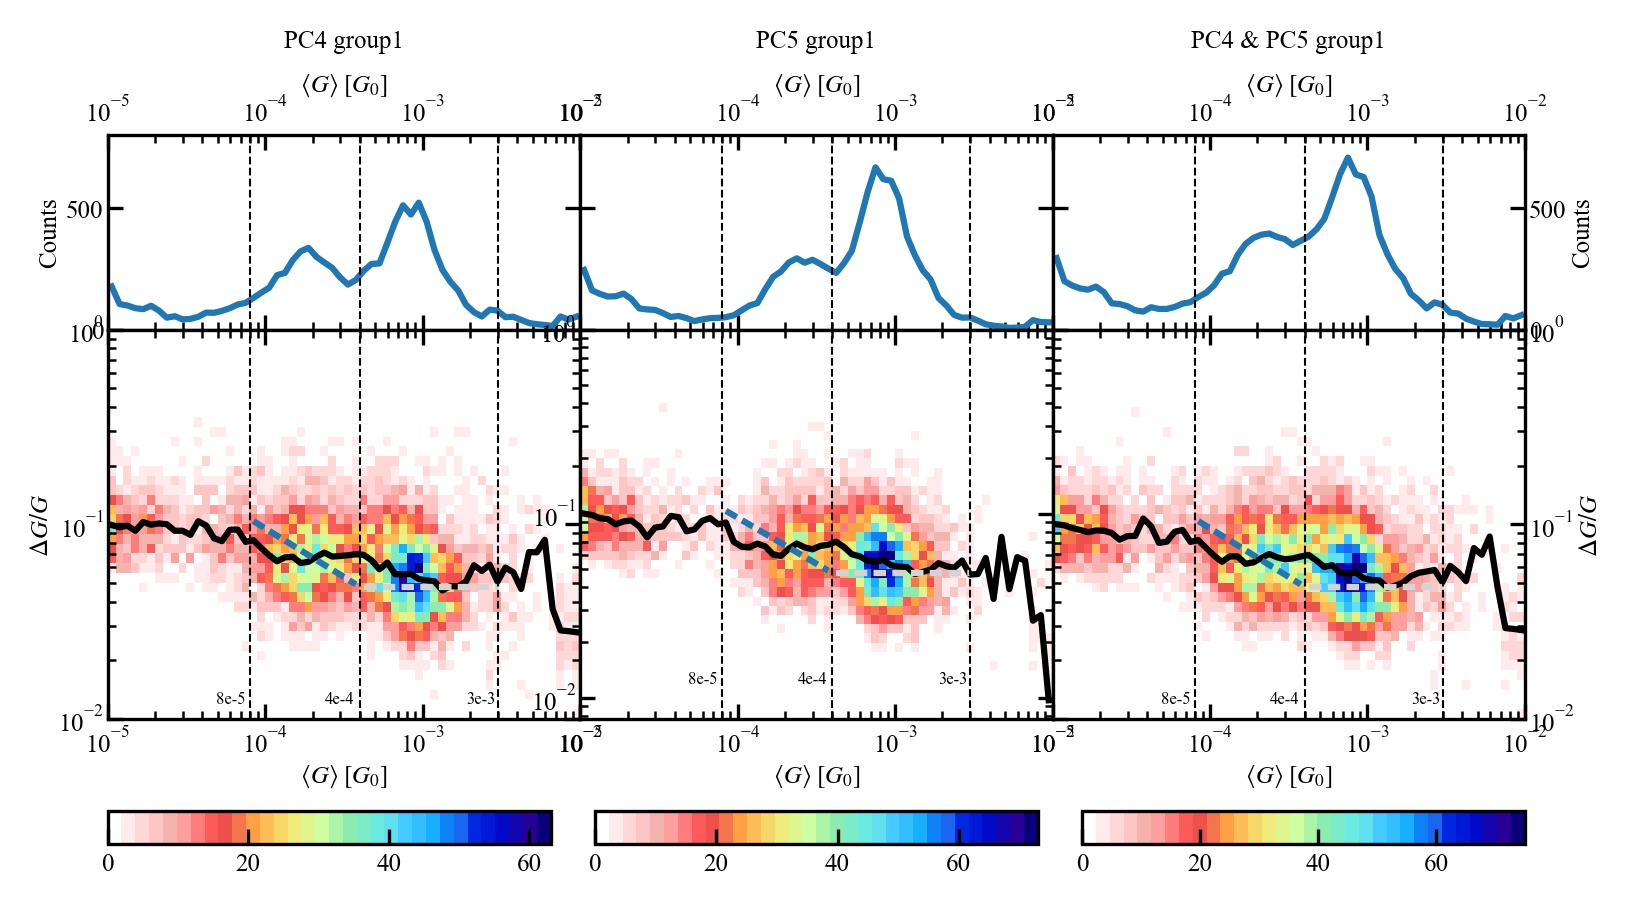

In [52]:
compare_noise_histograms_plot(x_mesh, y_mesh,
                              hists=(noise_hist_both_pc4, noise_hist_both_pc5, noise_hist_both_pc4_pc5),
                              gauss_fit_params_all=(gauss_fit_params_both_pc4, gauss_fit_params_both_pc5, gauss_fit_params_both_pc4_pc5),
                              ylims=(0, 800), titles = ('PC4 group1', 'PC5 group1', 'PC4 & PC5 group1'))

In [53]:
both_pull = np.intersect1d(low_pull, high_pull)

In [54]:
hist_both = Histogram(folder=home_folder,
                      traces=both_pull,  #8000
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

hist_both.calc_stats(align_at=0.5, interpolate=True,
                     range_pull=(-0.5, 1),
                     range_push=(-0.5, 1.5))

hist_both.calc_corr_hist_2d()

  0%|          | 0/1484 [00:00<?, ?it/s]

Pull 2D histogram created from 1484 traces
Push 2D histogram created from 1484 traces


  0%|          | 0/1484 [00:00<?, ?it/s]

In [55]:
which_trace=np.random.choice(hist_both.traces)
print(which_trace)

43902


(54.5, 56.5)

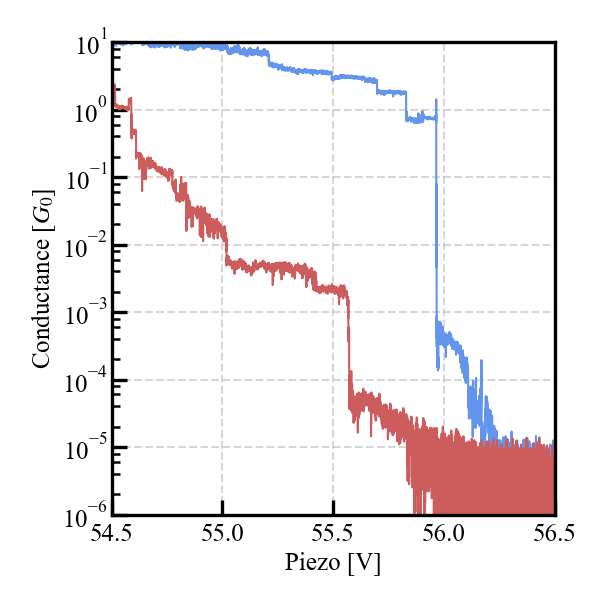

In [62]:
trace_pair = TracePair(which_trace, load_from=home_folder)
ax = trace_pair.plot_trace_pair(dpi=300)
ax.set_xlim(54.5, 56.5)

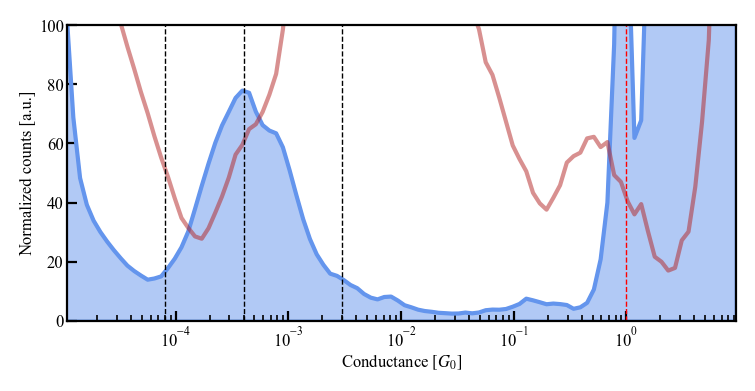

In [63]:
ax = hist_both.plot_hist_1d(dpi=200)
ax.set_ylim(0, 100)
ax.axvline(1, ls='--', lw=0.5, c='r')
ax.axvline(lowG[0], ls='--', lw=0.5, c='k')
ax.axvline(lowG[1], ls='--', lw=0.5, c='k')
ax.axvline(highG[1], ls='--', lw=0.5, c='k')

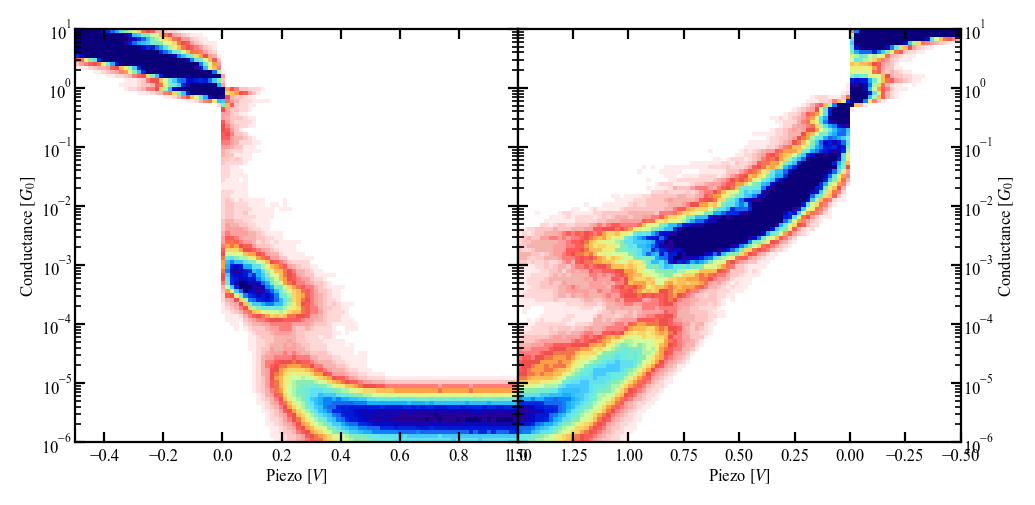

In [66]:
ax_pull, ax_push = hist_both.plot_hist_2d_both(dpi=200, vmax=10000)

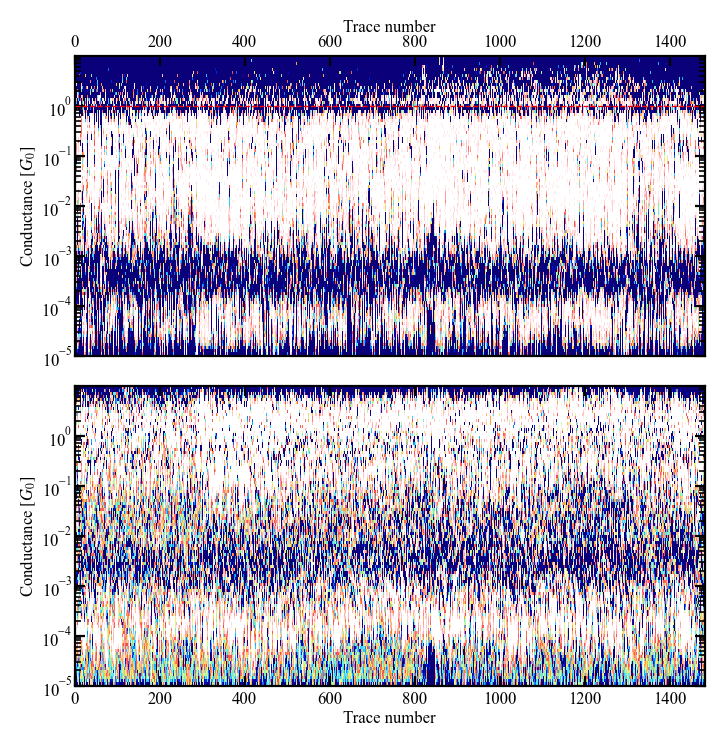

In [67]:
ax_temp_pull, ax_temp_push = hist_both.plot_temporal_hist(vmax_pull=30, vmax_push=200, dpi=200)
ax_temp_pull.axhline(1, ls='--', lw=0.5, c='r')

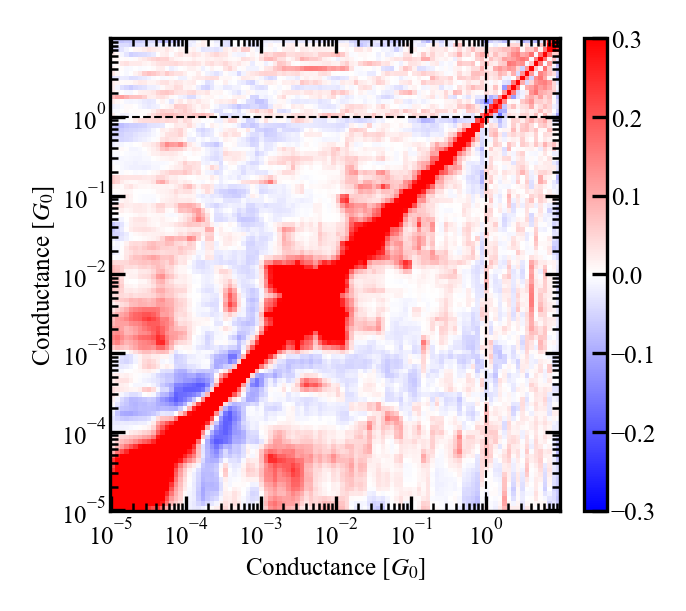

In [68]:
ax_corr, ax_cbar = hist_both.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [69]:
# Parameters

param_align_at=2e-2
param_interpolate=False
param_win_size=256
param_step_size=None
param_skip_points=50
param_end_point=3000
param_tolerance=2
param_freq_range=(2000, 5000)

In [70]:
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_both_plat.h5'), 'w') as f:
    # for pc_key in pc.pc_keys:
    for trace in tqdm(hist_both.traces):
        trace_pair = TracePair(trace, load_from=home_folder)
        conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
            temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
                win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
                tolerance=param_tolerance, filter_method='start-end', freq_range=param_freq_range)

        trace_group = f.create_group(name=f'trace_{trace}')

        trace_group.create_dataset(name='conductance', data=conductance)
        trace_group.create_dataset(name='piezo', data=piezo)
        trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
        trace_group.create_dataset(name='psd_results', data=psd_results)
        trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
        trace_group.create_dataset(name='areas', data=areas)
        trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

  0%|          | 0/1484 [00:00<?, ?it/s]

In [71]:
areas_all_1 = []
cond_avg_all_1 = []
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_both_plat.h5'), 'r') as f:
    for trace in tqdm(list(f.keys())):
        # trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)

  0%|          | 0/1484 [00:00<?, ?it/s]

In [72]:
areas_all_start_end_both_plat = np.array(areas_all_1)
cond_avg_all_start_end_both_plat = np.array(cond_avg_all_1)

In [73]:
cond_avg_all_start_end_both_plat.flatten()[cond_avg_all_start_end_both_plat.flatten() > 1e-5].shape[0]

20678

In [74]:
cond_avg_all_start_end_both_plat.flatten()[cond_avg_all_start_end_both_plat.flatten() > 1e-5].shape[0]/(cond_avg_all_start_end_both_plat.flatten().shape[0])

0.33176100628930816

In [75]:
x_mesh, y_mesh, noise_hist_both, gauss_fit_params_both = calc_2d_noise(cond_avg_all_start_end_both_plat.flatten()[cond_avg_all_start_end_both_plat.flatten() > 1e-5],
                                                                       areas_all_start_end_both_plat.flatten()[cond_avg_all_start_end_both_plat.flatten() > 1e-5])

True


(<AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>,
 <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>)

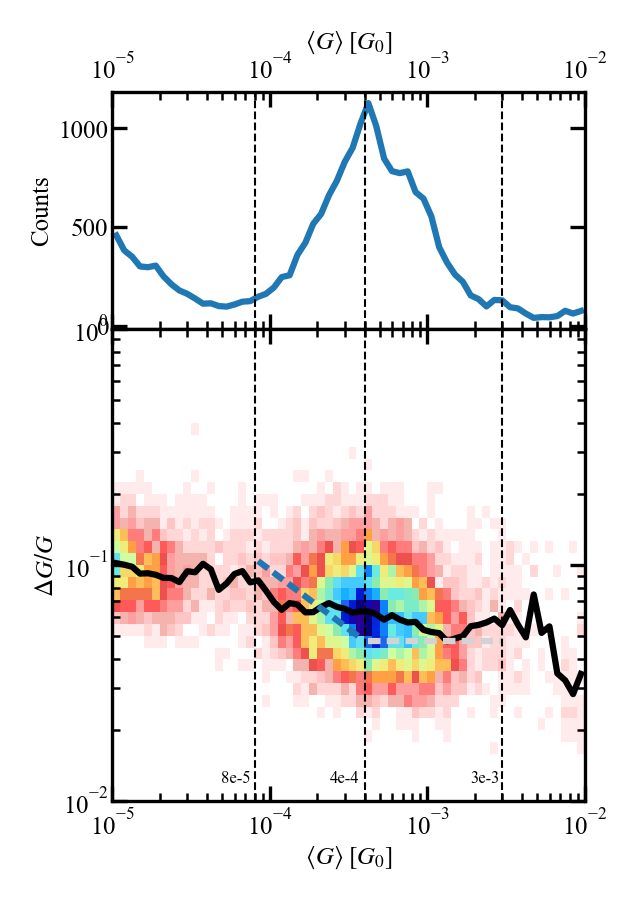

In [76]:
plot_noise_2d(x_mesh, y_mesh, noise_hist_both, gauss_fit_params_both)

In [77]:
x_mesh[0, :]

array([1.00000000e-05, 1.12201845e-05, 1.25892541e-05, 1.41253754e-05,
       1.58489319e-05, 1.77827941e-05, 1.99526231e-05, 2.23872114e-05,
       2.51188643e-05, 2.81838293e-05, 3.16227766e-05, 3.54813389e-05,
       3.98107171e-05, 4.46683592e-05, 5.01187234e-05, 5.62341325e-05,
       6.30957344e-05, 7.07945784e-05, 7.94328235e-05, 8.91250938e-05,
       1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
      

****************************************

# Noise analysis

In [78]:
def calc_2d_noise(cond_avg_all, areas_all):

    xrange = (1e-5, 1e-2)
    yrange = (1e-2, 1)

    num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
    num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

    xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(20 * num_of_decs_x)+1)
    ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(20 * num_of_decs_y)+1)

    # h1, xedges, yedges = np.histogram2d(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0],
    #                                           np.sqrt(areas_all_1.flatten()[cond_avg_all_1.flatten()>0])/(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0]),
    #                                           bins=[xbins, ybins])
    # x_mesh, y_mesh = np.meshgrid(xedges, yedges)
    
    h, xedges, yedges = np.histogram2d(cond_avg_all.flatten()[cond_avg_all.flatten()>0],
                                       np.sqrt(areas_all.flatten()[cond_avg_all.flatten()>0])/(cond_avg_all.flatten()[cond_avg_all.flatten()>0]),
                                       bins=[xbins, ybins])
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)
    
    print(np.all(xbins == x_mesh[0, :]))
    
    gauss_fit_params = np.zeros((h.T.shape[1], 3))
    bar_width = np.diff(y_mesh[:, 0])
    ybins = y_mesh[:, 0][:-1] + bar_width / 2
    for i in range(h.T.shape[1]):
        try:
            popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(ybins), ydata=h.T[:, i], p0=(1, -1, 1))
            # perr = np.sqrt(np.diag(pcov))
            gauss_fit_params[i, :] = popt
        except RuntimeError:
            gauss_fit_params[i, :] = [None, None, None]

    # np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr1_avg_dev_both_config.txt'), h_both_1)
    # np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr1_avg_dev_both_config.txt'), x_mesh)
    # np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr1_avg_dev_both_config.txt'), y_mesh)

    # h2, xedges, yedges = np.histogram2d(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0],
    #                                           np.sqrt(areas_all_2.flatten()[cond_avg_all_2.flatten()>0])/(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0]),
    #                                           bins=[xbins, ybins])
    # x_mesh, y_mesh = np.meshgrid(xedges, yedges)

    # np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr2_avg_dev_both_config.txt'), h_both_2)
    # np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr2_avg_dev_both_config.txt'), x_mesh)
    # np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr2_avg_dev_both_config.txt'), y_mesh)
    
    return x_mesh, y_mesh, h.T, gauss_fit_params

def plot_noise_2d(x_mesh, y_mesh, noise_hist_2d, gauss_fit_params):
    fig = plt.figure(figsize=utils.cm2inch(5, 7.5), dpi=300)  # figsize: (width, height) in inches
    gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 2),
                           figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0)

    ax_1d = fig.add_subplot(gs[0])
    ax_2d = fig.add_subplot(gs[1])

    ax_1d.xaxis.tick_top()
    ax_1d.xaxis.set_label_position('top')
    ax_1d.xaxis.set_ticks_position('both')
    ax_1d.yaxis.set_ticks_position('both')

    ax_2d.xaxis.set_ticks_position('both')
    ax_2d.yaxis.set_ticks_position('both')

    bar_width = np.diff(x_mesh[0, :])
    xbins = x_mesh[0, :][:-1] + bar_width / 2
    
    ax_1d.plot(xbins, np.sum(noise_hist_2d, axis=0))
    ax_1d.axvline(8e-5, ls='--', c='k', lw=0.5)
    ax_1d.axvline(4e-4, ls='--', c='k', lw=0.5)
    ax_1d.axvline(3e-3, ls='--', c='k', lw=0.5)
    ax_1d.set_xscale('log')
    ax_1d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
    ax_1d.set_ylabel('Counts')
    
    ax_2d.pcolormesh(x_mesh, y_mesh, noise_hist_2d, cmap=utils.cmap_geo32)
    ax_2d.set_xscale('log')
    ax_2d.set_yscale('log')
    ax_2d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
    ax_2d.set_ylabel(r'$\Delta G/G$')
    ax_2d.plot(xbins, 10**gauss_fit_params[:, 1], c='k')
    ax_2d.plot(xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)], xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)]**-0.5/1050, ls=(0, (2, 1)))
    ax_2d.plot(xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)], xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)]**0/21, ls=(0, (2, 1)), c='lightgrey')
    ax_2d.axvline(8e-5, ls='--', c='k', lw=0.5)
    ax_2d.axvline(4e-4, ls='--', c='k', lw=0.5)
    ax_2d.axvline(3e-3, ls='--', c='k', lw=0.5)
    ax_2d.text(7.5e-5, 1.2e-2, '8e-5', fontsize=4, ha='right')
    ax_2d.text(3.7e-4, 1.2e-2, '4e-4', fontsize=4, ha='right')
    ax_2d.text(2.9e-3, 1.2e-2, '3e-3', fontsize=4, ha='right')

    ax_1d.set_xlim(1e-5, 1e-2)
    ax_2d.set_xlim(1e-5, 1e-2)
    
    return ax_1d, ax_2d

In [79]:
# Parameters

param_align_at=2e-2
param_interpolate=False
param_win_size=256
param_step_size=None
param_skip_points=50
param_end_point=3000
param_tolerance=5
param_freq_range=(2000, 5000)

In [80]:
type(param_skip_points)

int

## Noise analysis of all tarces without PC selection

******************************

Condition: start-end

In [261]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_8000_noPC_tol_5.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     for trace in tqdm(hist.traces):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end', freq_range=param_freq_range)

#         trace_group = f.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

  0%|          | 0/8000 [00:00<?, ?it/s]

In [81]:
areas_all_1 = []
cond_avg_all_1 = []
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_8000_noPC_tol_5.h5'), 'r') as f:
    for trace in tqdm(list(f.keys())):
        # trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)

  0%|          | 0/8000 [00:00<?, ?it/s]

In [82]:
areas_all_start_end = np.array(areas_all_1)
cond_avg_all_start_end = np.array(cond_avg_all_1)

In [83]:
cond_avg_all_start_end.flatten()[cond_avg_all_start_end.flatten() > 1e-5].shape[0]

79954

***************************

Condition: start-end_wrong_1

In [84]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_wrong_1_8000_noPC_tol_5.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     for trace in tqdm(hist.traces):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end_wrong_1', freq_range=param_freq_range)

#         trace_group = f.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

In [85]:
areas_all_1 = []
cond_avg_all_1 = []
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_wrong_1_8000_noPC_tol_5.h5'), 'r') as f:
    for trace in tqdm(list(f.keys())):
        # trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)

  0%|          | 0/8000 [00:00<?, ?it/s]

In [86]:
areas_all_start_end_wrong_1 = np.array(areas_all_1)
cond_avg_all_start_end_wrong_1 = np.array(cond_avg_all_1)

In [87]:
cond_avg_all_start_end_wrong_1.flatten()[cond_avg_all_start_end_wrong_1.flatten() > 1e-5].shape[0]

80548

*********************************

Condition: start-end_wrong_2

In [88]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_wrong_2_8000_noPC_tol_5.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     for trace in tqdm(hist.traces):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end_wrong_2', freq_range=param_freq_range)

#         trace_group = f.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

In [89]:
areas_all_1 = []
cond_avg_all_1 = []
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_wrong_2_8000_noPC_tol_5.h5'), 'r') as f:
    for trace in tqdm(list(f.keys())):
        # trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)

  0%|          | 0/8000 [00:00<?, ?it/s]

In [90]:
areas_all_start_end_wrong_2 = np.array(areas_all_1)
cond_avg_all_start_end_wrong_2 = np.array(cond_avg_all_1)

In [91]:
cond_avg_all_start_end_wrong_2.flatten()[cond_avg_all_start_end_wrong_2.flatten() > 1e-5].shape[0]

102771

********************************************

Condition: avg-dev

In [92]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_avg_dev_8000_noPC_tol_5.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     for trace in tqdm(hist.traces):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#            temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='avg_dev', freq_range=param_freq_range)

#         trace_group = f.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

In [93]:
areas_all_1 = []
cond_avg_all_1 = []
with h5py.File(home_folder.joinpath('results/noise/noise_data_avg_dev_8000_noPC_tol_5.h5'), 'r') as f:
    for trace in tqdm(list(f.keys())):
        # trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)

  0%|          | 0/8000 [00:00<?, ?it/s]

In [94]:
areas_all_avg_dev = np.array(areas_all_1)
cond_avg_all_avg_dev = np.array(cond_avg_all_1)

In [95]:
cond_avg_all_avg_dev.flatten()[cond_avg_all_avg_dev.flatten() > 1e-5].shape[0]

86098

*************************************

In [96]:
x_mesh, y_mesh, h_start_end, gauss_fit_params_start_end = calc_2d_noise(cond_avg_all_start_end, areas_all_start_end)
x_mesh, y_mesh, h_start_end_wrong_1, gauss_fit_params_start_end_wrong_1 = calc_2d_noise(cond_avg_all_start_end_wrong_1, areas_all_start_end_wrong_1)
x_mesh, y_mesh, h_start_end_wrong_2, gauss_fit_params_start_end_wrong_2 = calc_2d_noise(cond_avg_all_start_end_wrong_2, areas_all_start_end_wrong_2)
x_mesh, y_mesh, h_avg_dev, gauss_fit_params_avg_dev = calc_2d_noise(cond_avg_all_avg_dev, areas_all_avg_dev)

True
True
True
True


In [288]:
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_8000_h_start_end_tol_5.txt'), h_start_end)
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_8000_h_start_end_wrong_1_tol_5.txt'), h_start_end_wrong_1)
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_8000_h_start_end_wrong_2_tol_5.txt'), h_start_end_wrong_2)
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_8000_h_avg_dev_tol_5.txt'), h_avg_dev)

In [97]:
8000*42

336000

In [98]:
print(cond_avg_all_start_end.flatten()[cond_avg_all_start_end.flatten() > 1e-5].shape[0])
print(cond_avg_all_start_end_wrong_1.flatten()[cond_avg_all_start_end_wrong_1.flatten() > 1e-5].shape[0])
print(cond_avg_all_start_end_wrong_2.flatten()[cond_avg_all_start_end_wrong_2.flatten() > 1e-5].shape[0])
print(cond_avg_all_avg_dev.flatten()[cond_avg_all_avg_dev.flatten() > 1e-5].shape[0])

79954
80548
102771
86098


([<AxesSubplot:title={'center':'start-end'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>,
  <AxesSubplot:title={'center':'start-end_wrong_1'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:title={'center':'avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>],
 [<AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>])

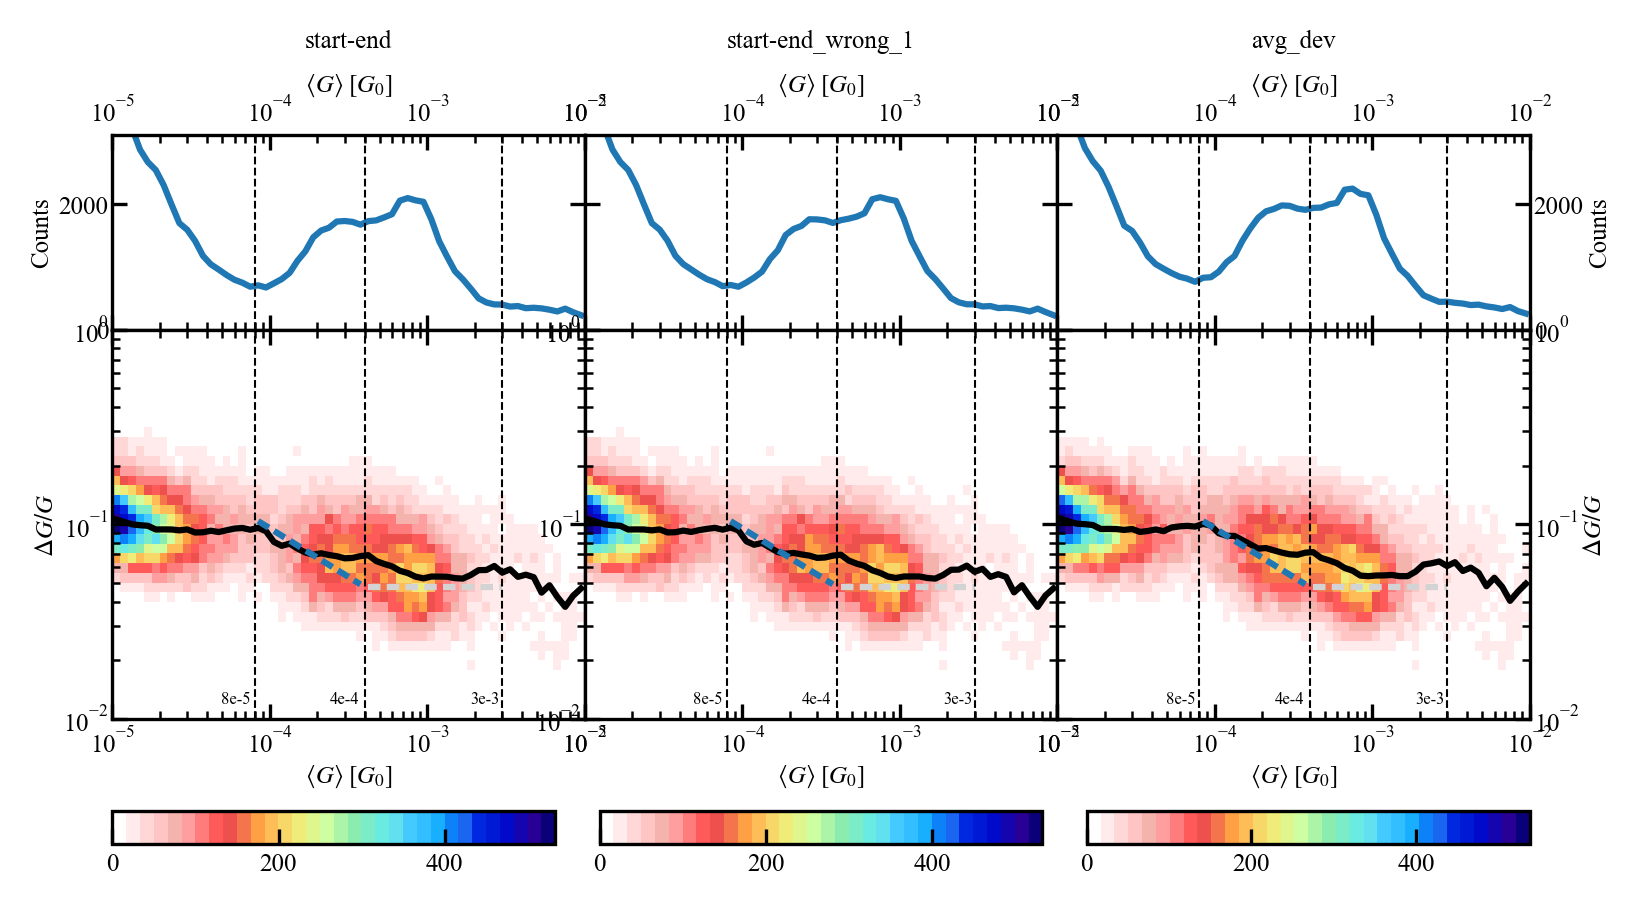

In [99]:
compare_noise_histograms_plot(x_mesh, y_mesh,
                              hists=(h_start_end, h_start_end_wrong_1, h_avg_dev),
                              gauss_fit_params_all=(gauss_fit_params_start_end, gauss_fit_params_start_end_wrong_1, gauss_fit_params_avg_dev),
                              ylims=(0, 3100), titles = ('start-end', 'start-end_wrong_1', 'avg_dev'))

([<AxesSubplot:title={'center':'start-end_wrong_1 - start-end'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>,
  <AxesSubplot:title={'center':'start-end_wrong_1 - avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:title={'center':'start-end - avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>],
 [<AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>])

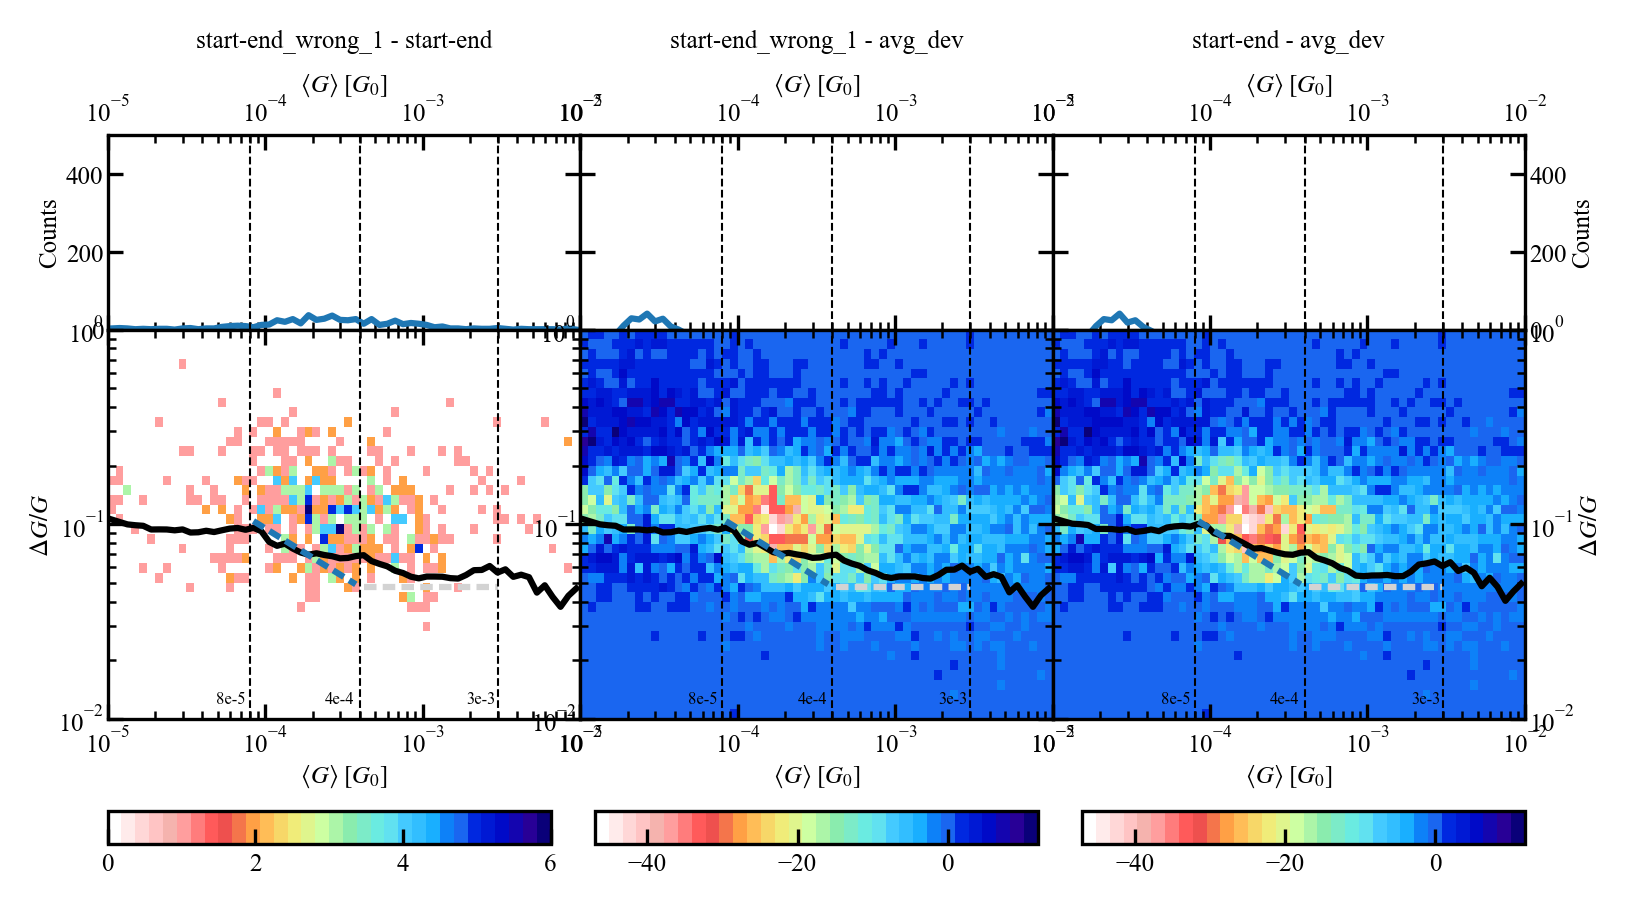

In [100]:
compare_noise_histograms_plot(x_mesh, y_mesh,
                              hists=(h_start_end_wrong_1-h_start_end, h_start_end_wrong_1-h_avg_dev, h_start_end-h_avg_dev),
                              gauss_fit_params_all=(gauss_fit_params_start_end, gauss_fit_params_start_end_wrong_1, gauss_fit_params_avg_dev),
                              ylims=(0, 500), titles = ('start-end_wrong_1 - start-end', 'start-end_wrong_1 - avg_dev', 'start-end - avg_dev'))

## Noise analysis of traces selected via PC4

Condition: start-end

In [44]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     pc_key='PC4'
#     pc_group = f.create_group(name=pc_key)
#     group1_group = pc_group.create_group(name='group1')
#     group2_group = pc_group.create_group(name='group2')
#     for trace in tqdm(pc.traces_group1[pc_key], desc=f'Noise analysis of traces {pc_key} group 1'):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end', freq_range=param_freq_range)

#         trace_group = group1_group.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

#     for trace in tqdm(pc.traces_group2[pc_key], desc=f'Noise analysis of traces {pc_key} group 2'):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end', freq_range=param_freq_range)

#         trace_group = group2_group.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

Noise analysis of traces PC4 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC4 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

Condition: start-end_wrong_1

In [45]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_wrong_1.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     pc_key='PC4'
#     pc_group = f.create_group(name=pc_key)
#     group1_group = pc_group.create_group(name='group1')
#     group2_group = pc_group.create_group(name='group2')
#     for trace in tqdm(pc.traces_group1[pc_key], desc=f'Noise analysis of traces {pc_key} group 1'):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end_wrong_1', freq_range=param_freq_range)

#         trace_group = group1_group.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

#     for trace in tqdm(pc.traces_group2[pc_key], desc=f'Noise analysis of traces {pc_key} group 2'):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end_wrong_1', freq_range=param_freq_range)

#         trace_group = group2_group.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

Noise analysis of traces PC4 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC4 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

Condition: start-end_wrong_2

In [46]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_wrong_2.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     pc_key='PC4'
#     pc_group = f.create_group(name=pc_key)
#     group1_group = pc_group.create_group(name='group1')
#     group2_group = pc_group.create_group(name='group2')
#     for trace in tqdm(pc.traces_group1[pc_key], desc=f'Noise analysis of traces {pc_key} group 1'):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end_wrong_2', freq_range=param_freq_range)

#         trace_group = group1_group.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

#     for trace in tqdm(pc.traces_group2[pc_key], desc=f'Noise analysis of traces {pc_key} group 2'):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='start-end_wrong_2', freq_range=param_freq_range)

#         trace_group = group2_group.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

Noise analysis of traces PC4 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC4 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

Condition: avg-dev

In [47]:
# with h5py.File(home_folder.joinpath('results/noise/noise_data_avg_dev.h5'), 'w') as f:
#     # for pc_key in pc.pc_keys:
#     pc_key='PC4'
#     pc_group = f.create_group(name=pc_key)
#     group1_group = pc_group.create_group(name='group1')
#     group2_group = pc_group.create_group(name='group2')
#     for trace in tqdm(pc.traces_group1[pc_key], desc=f'Noise analysis of traces {pc_key} group 1'):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='avg_dev', freq_range=param_freq_range)

#         trace_group = group1_group.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

#     for trace in tqdm(pc.traces_group2[pc_key], desc=f'Noise analysis of traces {pc_key} group 2'):
#         trace_pair = TracePair(trace, load_from=home_folder)
#         conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
#             temporal_noise_single_trace(trace_pair=trace_pair, align_at=param_align_at, interpolate=param_interpolate,
#                 win_size=param_win_size, step_size=param_step_size, skip_points=param_skip_points, end_point=param_end_point,
#                 tolerance=param_tolerance, filter_method='avg_dev', freq_range=param_freq_range)

#         trace_group = group2_group.create_group(name=f'trace_{trace}')

#         trace_group.create_dataset(name='conductance', data=conductance)
#         trace_group.create_dataset(name='piezo', data=piezo)
#         trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
#         trace_group.create_dataset(name='psd_results', data=psd_results)
#         trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
#         trace_group.create_dataset(name='areas', data=areas)
#         trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

Noise analysis of traces PC4 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC4 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

********************************

In [110]:
# input_file='noise_data_start-end.h5'
# input_file='noise_data_start-end_wrong_1.h5'
# input_file='noise_data_start-end_wrong_2.h5'
input_file='noise_data_avg_dev.h5'

In [111]:
areas_all_1 = []
areas_all_2 = []
cond_avg_all_1 = []
cond_avg_all_2 = []
traces_1 = []
traces_2 = []

pc_key='PC4'
for trace_ind in tqdm(range(0, 1600)):
    with h5py.File(home_folder.joinpath(f'results/noise/{input_file}'), 'r') as f:
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{pc_key}/group1/trace_{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{pc_key}/group1/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)
        traces_1.append(trace_pair.trace_num)
        
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
        # print(trace)

        trace_pair_2=TracePair(trace, load_from=home_folder)
        # conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
        # piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
        # psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
        # psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
        # fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
        areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
        avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_2.append(areas_2)
        cond_avg_all_2.append(avg_conductance_in_win_2)
        traces_2.append(trace_pair.trace_num)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [112]:
# areas_all_start_end_1 = np.array(areas_all_1)
# cond_avg_all_start_end_1 = np.array(cond_avg_all_1)
# traces_start_end_1 = np.array(traces_1)
# areas_all_start_end_2 = np.array(areas_all_2)
# cond_avg_all_start_end_2 = np.array(cond_avg_all_2)
# traces_start_end_2 = np.array(traces_2)

# areas_all_start_end_wrong_1_1 = np.array(areas_all_1)
# cond_avg_all_start_end_wrong_1_1 = np.array(cond_avg_all_1)
# traces_start_end_wrong_1_1 = np.array(traces_1)
# areas_all_start_end_wrong_1_2 = np.array(areas_all_2)
# cond_avg_all_start_end_wrong_1_2 = np.array(cond_avg_all_2)
# traces_start_end_wrong_1_2 = np.array(traces_2)

# areas_all_start_end_wrong_2_1 = np.array(areas_all_1)
# cond_avg_all_start_end_wrong_2_1 = np.array(cond_avg_all_1)
# traces_start_end_wrong_2_1 = np.array(traces_1)
# areas_all_start_end_wrong_2_2 = np.array(areas_all_2)
# cond_avg_all_start_end_wrong_2_2 = np.array(cond_avg_all_2)
# traces_start_end_wrong_2_2 = np.array(traces_2)

areas_all_avg_dev_1 = np.array(areas_all_1)
cond_avg_all_avg_dev_1 = np.array(cond_avg_all_1)
traces_avg_dev_1 = np.array(traces_1)
areas_all_avg_dev_2 = np.array(areas_all_2)
cond_avg_all_avg_dev_2 = np.array(cond_avg_all_2)
traces_avg_dev_2 = np.array(traces_2)

In [243]:
1600*42

67200

In [113]:
print(cond_avg_all_start_end_1.flatten()[cond_avg_all_start_end_1.flatten() > 1e-5].shape[0])
print(cond_avg_all_start_end_2.flatten()[cond_avg_all_start_end_2.flatten() > 1e-5].shape[0])

15164
19946


In [114]:
print(cond_avg_all_start_end_wrong_1_1.flatten()[cond_avg_all_start_end_wrong_1_1.flatten() > 1e-5].shape[0])
print(cond_avg_all_start_end_wrong_1_2.flatten()[cond_avg_all_start_end_wrong_1_2.flatten() > 1e-5].shape[0])

16206
20750


In [115]:
print(cond_avg_all_start_end_wrong_2_1.flatten()[cond_avg_all_start_end_wrong_2_1.flatten() > 1e-5].shape[0])
print(cond_avg_all_start_end_wrong_2_2.flatten()[cond_avg_all_start_end_wrong_2_2.flatten() > 1e-5].shape[0])

26032
29084


In [116]:
print(cond_avg_all_avg_dev_1.flatten()[cond_avg_all_avg_dev_1.flatten() > 1e-5].shape[0])
print(cond_avg_all_avg_dev_2.flatten()[cond_avg_all_avg_dev_2.flatten() > 1e-5].shape[0])

12252
16980


In [117]:
x_mesh, y_mesh, h_start_end_1, gauss_fit_params_start_end_1 = calc_2d_noise(cond_avg_all_start_end_1, areas_all_start_end_1)
x_mesh, y_mesh, h_start_end_2, gauss_fit_params_start_end_2 = calc_2d_noise(cond_avg_all_start_end_2, areas_all_start_end_2)

x_mesh, y_mesh, h_start_end_wrong_1_1, gauss_fit_params_start_end_wrong_1_1 = calc_2d_noise(cond_avg_all_start_end_wrong_1_1, areas_all_start_end_wrong_1_1)
x_mesh, y_mesh, h_start_end_wrong_1_2, gauss_fit_params_start_end_wrong_1_2 = calc_2d_noise(cond_avg_all_start_end_wrong_1_2, areas_all_start_end_wrong_1_2)

x_mesh, y_mesh, h_start_end_wrong_2_1, gauss_fit_params_start_end_wrong_2_1 = calc_2d_noise(cond_avg_all_start_end_wrong_2_1, areas_all_start_end_wrong_2_1)
x_mesh, y_mesh, h_start_end_wrong_2_2, gauss_fit_params_start_end_wrong_2_2 = calc_2d_noise(cond_avg_all_start_end_wrong_2_2, areas_all_start_end_wrong_2_2)

x_mesh, y_mesh, h_avg_dev_1, gauss_fit_params_avg_dev_1 = calc_2d_noise(cond_avg_all_avg_dev_1, areas_all_avg_dev_1)
x_mesh, y_mesh, h_avg_dev_2, gauss_fit_params_avg_dev_2 = calc_2d_noise(cond_avg_all_avg_dev_2, areas_all_avg_dev_2)

True
True
True
True
True
True
True
True


In [257]:
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_PC4_gr1_h_start_end.txt'), h_start_end_1)
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_PC4_gr2_h_start_end.txt'), h_start_end_2)

# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_PC4_gr1_h_start_end_wrong_1.txt'), h_start_end_wrong_1_1)
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_PC4_gr2_h_start_end_wrong_1.txt'), h_start_end_wrong_1_2)

# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_PC4_gr1_h_start_end_wrong_2.txt'), h_start_end_wrong_2_1)
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_PC4_gr2_h_start_end_wrong_2.txt'), h_start_end_wrong_2_2)

# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_PC4_gr1_h_avg_dev.txt'), h_avg_dev_1)
# np.savetxt(home_folder.joinpath('results/filter_check/noise_power_2d_PC4_gr2_h_avg_dev.txt'), h_avg_dev_2)

In [118]:
gauss_fit_params_start_end_wrong_1_1[:, 1]

array([-0.97216491, -0.96704186, -0.96869913, -0.99074973, -0.96252216,
       -0.994743  , -0.98348269, -0.94112514, -0.99031032, -1.00108659,
       -0.99999738, -1.00978741, -1.01150026, -1.04462362, -1.07674982,
       -1.0481403 , -1.06357728, -1.07362679, -1.06113034, -1.0783829 ,
       -1.1385984 , -1.15322739, -1.13718296, -1.16439765, -1.18054957,
       -1.17937376, -1.1726234 , -1.16745216, -1.16847183, -1.18409476,
       -1.18392427, -1.15864255, -1.14842044, -1.15259329, -1.19989584,
       -1.12883522, -1.19483825, -1.16315535, -1.15939901, -1.20610169,
       -1.21672979, -1.09671089, -1.17621659, -1.1864815 , -1.1892681 ,
       -1.18440773, -1.18167703, -0.98030218, -1.15551859, -1.05811709,
       -1.15711778, -1.32229645, -1.2436454 , -1.18961241, -1.1231657 ,
       -1.26243075, -1.09601275, -1.25304038, -1.31549836, -1.30026781])

In [119]:
gauss_fit_params_start_end_wrong_1_2[:, 1]

array([-1.00916828, -1.02365464, -1.03894354, -1.04337477, -1.06351788,
       -1.06545126, -1.06496125, -1.07401169, -1.09852752, -1.09156961,
       -1.10095889, -1.14131566, -1.19777506, -1.1301932 , -1.28438591,
       -0.94340371, -0.98298875, -1.11141908, -1.05945668,         nan,
       -1.03878369, -1.11385385, -1.05762475, -0.97551852, -1.21530017,
       -1.10275282, -1.05285114, -1.15305789, -1.20975478, -1.24644204,
       -1.20817964, -1.22253984, -1.22388561, -1.26864799, -1.27586509,
       -1.2933187 , -1.3016495 , -1.31200008, -1.32208342, -1.31478947,
       -1.29138521, -1.29119913, -1.29828178, -1.31329062, -1.32193016,
       -1.32934596, -1.29655146, -1.30921134, -1.3046165 , -1.33996968,
       -1.31615516, -1.35007215, -1.34731446, -1.38157624, -1.52766862,
       -1.51501208, -1.55818381, -1.57090014, -1.52137152, -1.53767879])

In [120]:
np.unique(np.sum(h_start_end_1, axis=0) == np.sum(h_avg_dev_1, axis=0), return_counts=True)

(array([False,  True]), array([56,  4], dtype=int64))

In [121]:
print(np.sum(h_start_end_1)/42)
print(np.sum(h_start_end_2)/42)

342.35714285714283
471.3095238095238


In [122]:
print(np.sum(h_start_end_wrong_1_1)/42)
print(np.sum(h_start_end_wrong_1_2)/42)

365.6666666666667
490.1904761904762


In [123]:
print(np.sum(h_avg_dev_1)/42)
print(np.sum(h_avg_dev_2)/42)

273.6666666666667
400.85714285714283


In [124]:
bar_width = np.diff(x_mesh[0, :])
xbins = x_mesh[0, :][:-1] + bar_width / 2

In [125]:
min((h_start_end_1-h_avg_dev_1).flatten())

-9.0

In [126]:
np.where(areas_all_1[which_ind, :] > 0)[0]

NameError: name 'which_ind' is not defined

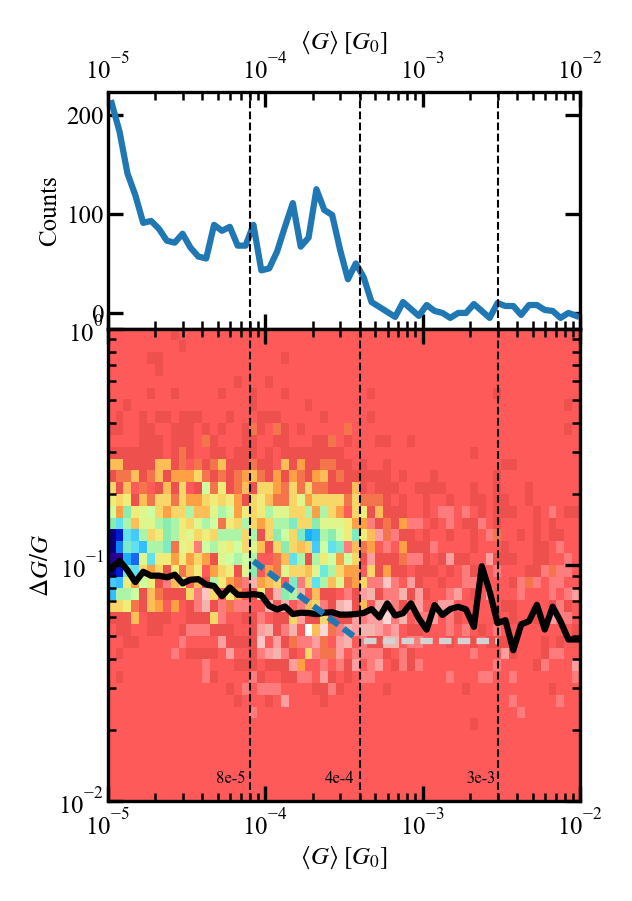

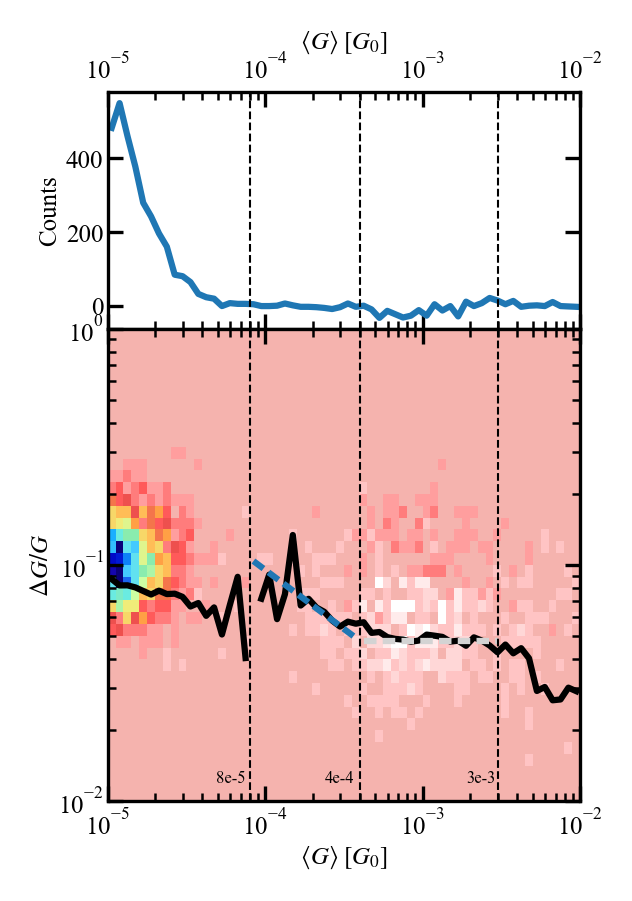

In [127]:
ax_1d_1, ax_2d_1 = plot_noise_2d(x_mesh, y_mesh, h_start_end_1-h_avg_dev_1, gauss_fit_params_avg_dev_1)
ax_1d_2, ax_2d_2 = plot_noise_2d(x_mesh, y_mesh, h_start_end_2-h_avg_dev_2, gauss_fit_params_avg_dev_2)

In [128]:
for ind, (i, j) in enumerate(zip(range(4), range(3))):
    print(ind, i, j)

0 0 0
1 1 1
2 2 2


In [129]:
2//3

0

In [130]:
def compare_noise_histograms_plot(x_mesh, y_mesh,
                                  hists: Tuple[np.ndarray, ...],
                                  gauss_fit_params_all:Tuple[np.ndarray, ...],
                                  ylims: Optional[Tuple[float, float]] = None,
                                  titles: Optional[Tuple[str, ...]] = None, **kwargs):
    
    num_cols=len(hists)

    fig = plt.figure(figsize=utils.cm2inch(5*num_cols, 7.5), dpi=300)  # figsize: (width, height) in inches
    
    gs_total = gridspec.GridSpec(nrows=2, ncols=num_cols, height_ratios=(18, 1), width_ratios=(1, )*num_cols,
                                 figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.3)
    
    gs = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=num_cols, height_ratios=(1, 2), width_ratios=(1, )*num_cols,
                                          subplot_spec=gs_total[0, :], wspace=0, hspace=0)
    
    
    
    axs_1d = []
    axs_2d = []
    axs_col_bar = []
    imgs = []
    for i in range(num_cols):
        axs_1d.append(fig.add_subplot(gs[0, i]))
        axs_2d.append(fig.add_subplot(gs[1, i]))
        axs_col_bar.append(fig.add_subplot(gs_total[1, i]))
    
    bar_width = np.diff(x_mesh[0, :])
    xbins = x_mesh[0, :][:-1] + bar_width / 2
    
    for i, (ax_1d, ax_2d) in enumerate(zip(axs_1d, axs_2d)):
    
        ax_1d.xaxis.tick_top()
        ax_1d.xaxis.set_label_position('top')
        if i == num_cols-1:
            ax_1d.yaxis.tick_right()
            ax_1d.yaxis.set_label_position('right')
            ax_1d.set_ylabel('Counts')
            ax_2d.yaxis.tick_right()
            ax_2d.yaxis.set_label_position('right')
            ax_2d.set_ylabel(r'$\Delta G/G$')
        elif i > 0:
            ax_1d.axes.yaxis.set_ticklabels([])
            ax_2d.axes.yaxis.set_ticklabels([])
        else:
            ax_1d.set_ylabel('Counts')
            ax_2d.set_ylabel(r'$\Delta G/G$')
            
        ax_1d.xaxis.set_ticks_position('both')
        ax_1d.yaxis.set_ticks_position('both')
        
        if i == num_cols-1:
            ax_2d.yaxis.tick_right()
            ax_2d.yaxis.set_label_position('right')
        ax_2d.xaxis.set_ticks_position('both')
        ax_2d.yaxis.set_ticks_position('both')

        ax_1d.plot(xbins, np.sum(hists[i], axis=0))
        ax_1d.axvline(8e-5, ls='--', c='k', lw=0.5)
        ax_1d.axvline(4e-4, ls='--', c='k', lw=0.5)
        ax_1d.axvline(3e-3, ls='--', c='k', lw=0.5)
        ax_1d.set_xscale('log')
        ax_1d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
        
        if ylims is not None:
            ax_1d.set_ylim(ylims[0], ylims[1])

        im = ax_2d.pcolormesh(x_mesh, y_mesh, hists[i], cmap=utils.cmap_geo32, **kwargs)
        imgs.append(im)
        plt.colorbar(imgs[i], cax=axs_col_bar[i], orientation='horizontal')
        
        ax_2d.set_xscale('log')
        ax_2d.set_yscale('log')
        ax_2d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
        ax_2d.plot(xbins, 10**gauss_fit_params_all[i][:, 1], c='k')
        ax_2d.plot(xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)], xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)]**-0.5/1050, ls=(0, (2, 1)))
        ax_2d.plot(xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)], xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)]**0/21, ls=(0, (2, 1)), c='lightgrey')
        ax_2d.axvline(8e-5, ls='--', c='k', lw=0.5)
        ax_2d.axvline(4e-4, ls='--', c='k', lw=0.5)
        ax_2d.axvline(3e-3, ls='--', c='k', lw=0.5)
        ax_2d.text(7.5e-5, 1.2e-2, '8e-5', fontsize=4, ha='right')
        ax_2d.text(3.7e-4, 1.2e-2, '4e-4', fontsize=4, ha='right')
        ax_2d.text(2.9e-3, 1.2e-2, '3e-3', fontsize=4, ha='right')

        ax_1d.set_xlim(1e-5, 1e-2)
        ax_2d.set_xlim(1e-5, 1e-2)
        
        if titles is not None:
            ax_1d.set_title(titles[i], fontsize=6)
        
    return axs_1d, axs_2d

In [131]:
# gauss_fit_params_start_end_1
# gauss_fit_params_start_end_wrong_1_1
# gauss_fit_params_start_end_wrong_2_1
# gauss_fit_params_avg_dev_1

([<AxesSubplot:title={'center':'start-end'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>,
  <AxesSubplot:title={'center':'start-end_wrong_1'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:title={'center':'avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>],
 [<AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>])

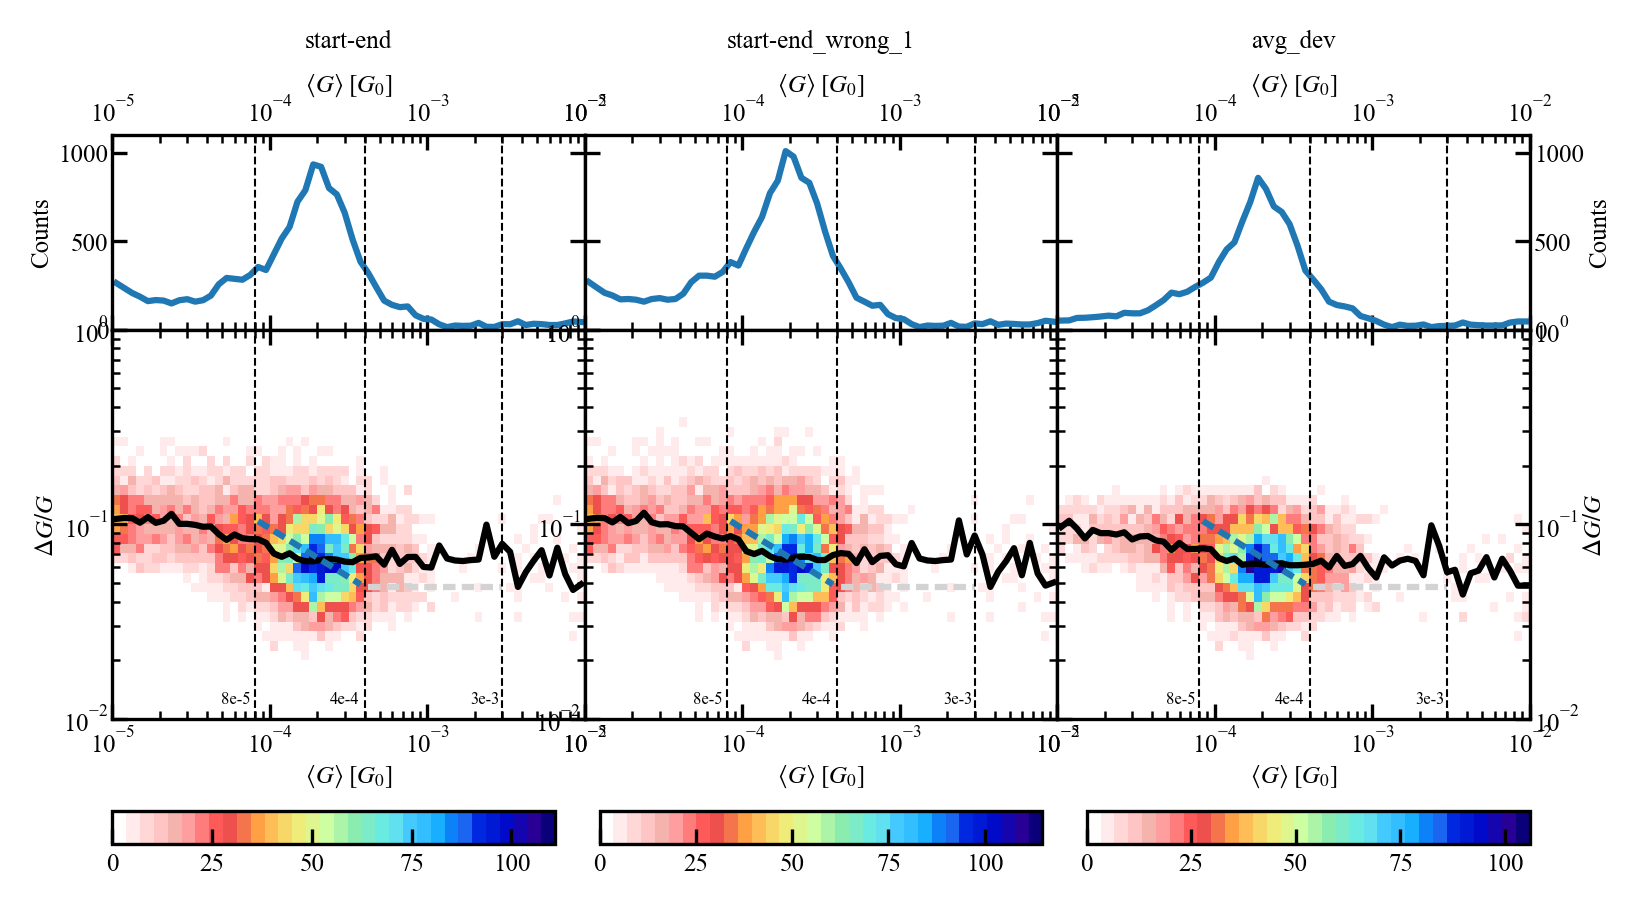

In [132]:
compare_noise_histograms_plot(x_mesh, y_mesh,
                              hists=(h_start_end_1, h_start_end_wrong_1_1, h_avg_dev_1),
                              gauss_fit_params_all=(gauss_fit_params_start_end_1, gauss_fit_params_start_end_wrong_1_1, gauss_fit_params_avg_dev_1),
                              ylims=(0, 1100), titles = ('start-end', 'start-end_wrong_1', 'avg_dev'))

([<AxesSubplot:title={'center':'start-end_wrong_1 - start-end'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>,
  <AxesSubplot:title={'center':'start-end_wrong_1 - avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:title={'center':'start-end - avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>],
 [<AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>])

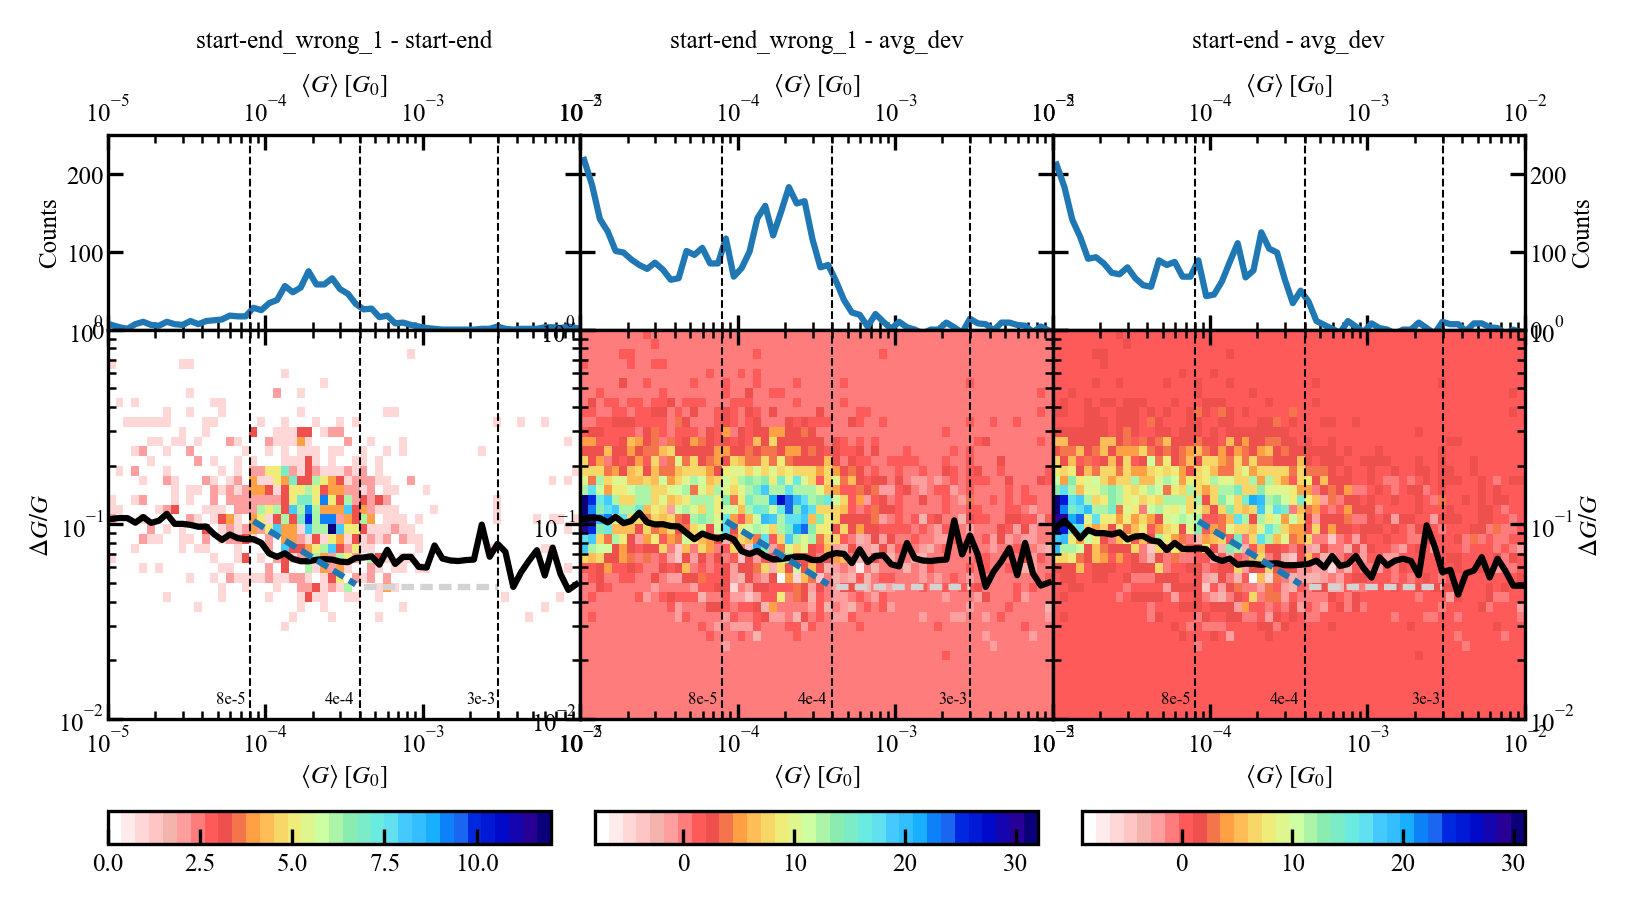

In [133]:
compare_noise_histograms_plot(x_mesh, y_mesh,
                              hists=(h_start_end_wrong_1_1-h_start_end_1, h_start_end_wrong_1_1-h_avg_dev_1, h_start_end_1-h_avg_dev_1),
                              gauss_fit_params_all=(gauss_fit_params_start_end_1, gauss_fit_params_start_end_wrong_1_1, gauss_fit_params_avg_dev_1),
                              ylims=(0, 250), titles = ('start-end_wrong_1 - start-end', 'start-end_wrong_1 - avg_dev', 'start-end - avg_dev'))

([<AxesSubplot:title={'center':'start-end'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>,
  <AxesSubplot:title={'center':'start-end_wrong_1'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:title={'center':'avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>],
 [<AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>])

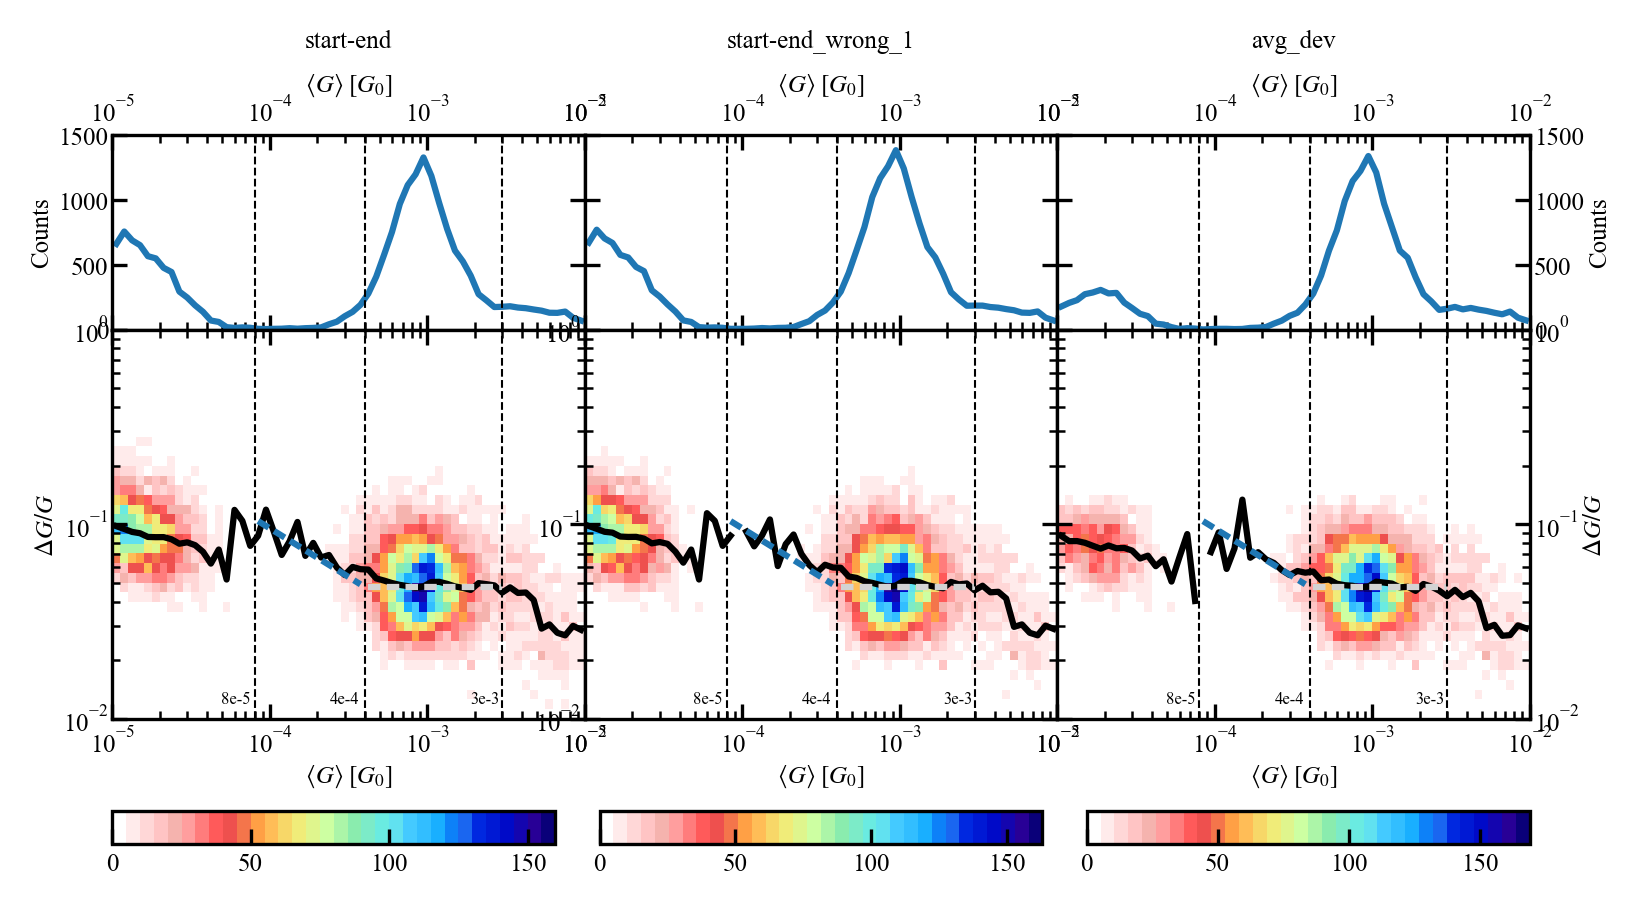

In [134]:
compare_noise_histograms_plot(x_mesh, y_mesh,
                              hists=(h_start_end_2, h_start_end_wrong_1_2, h_avg_dev_2),
                              gauss_fit_params_all=(gauss_fit_params_start_end_2, gauss_fit_params_start_end_wrong_1_2, gauss_fit_params_avg_dev_2),
                              ylims=(0, 1500), titles = ('start-end', 'start-end_wrong_1', 'avg_dev'))

([<AxesSubplot:title={'center':'start-end_wrong_1 - start-end'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>,
  <AxesSubplot:title={'center':'start-end_wrong_1 - avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:title={'center':'start-end - avg_dev'}, xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='Counts'>],
 [<AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$'>,
  <AxesSubplot:xlabel='$\\langle G \\rangle \\; [G_{0}]$', ylabel='$\\Delta G/G$'>])

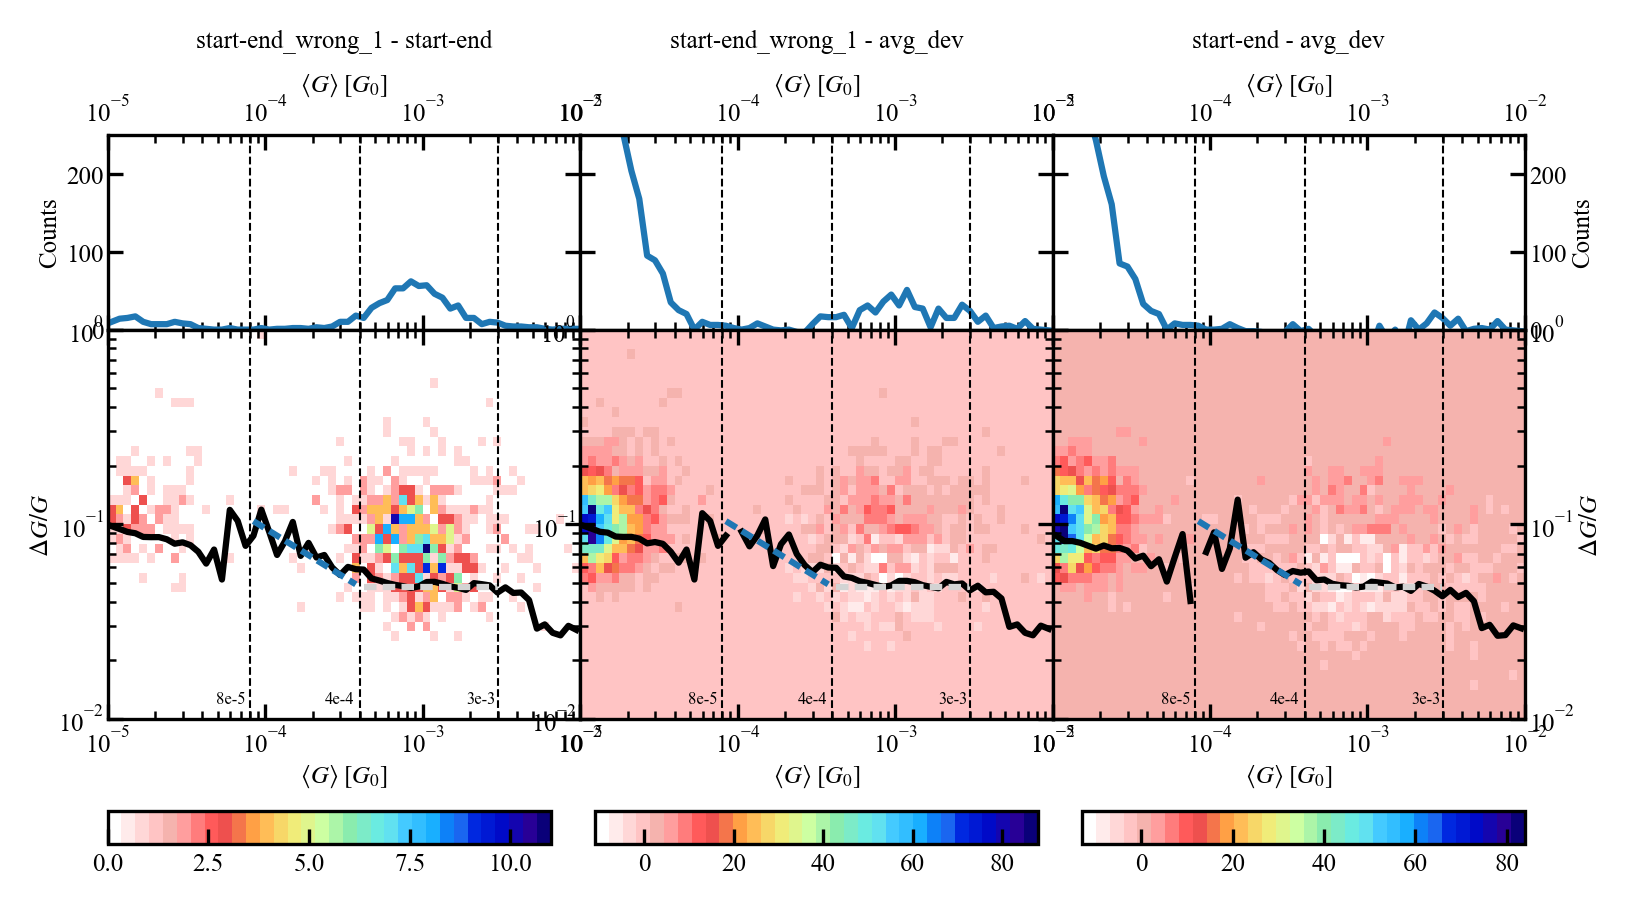

In [135]:
compare_noise_histograms_plot(x_mesh, y_mesh,
                              hists=(h_start_end_wrong_1_2-h_start_end_2, h_start_end_wrong_1_2-h_avg_dev_2, h_start_end_2-h_avg_dev_2),
                              gauss_fit_params_all=(gauss_fit_params_start_end_2, gauss_fit_params_start_end_wrong_1_2, gauss_fit_params_avg_dev_2),
                              ylims=(0, 250), titles = ('start-end_wrong_1 - start-end', 'start-end_wrong_1 - avg_dev', 'start-end - avg_dev'))

In [136]:
# traces_start_end_1_1
# traces_start_end_wrong_1_1
# traces_start_end_wrong_2_1
# traces_avg_dev_1

which_ind = np.random.randint(traces_start_end_wrong_1_1.shape[0])
print(traces_1[which_ind])

44000


In [137]:
print(f'param_align_at = {param_align_at}')
print(f'param_interpolate = {param_interpolate}')
print(f'param_win_size = {param_win_size}')
print(f'param_step_size = {param_step_size}')
print(f'param_skip_points = {param_skip_points}')
print(f'param_end_point = {param_end_point}')
print(f'param_tolerance = {param_tolerance}')
print(f'param_freq_range = {param_freq_range}')

param_align_at = 0.02
param_interpolate = False
param_win_size = 256
param_step_size = None
param_skip_points = 50
param_end_point = 3000
param_tolerance = 5
param_freq_range = (2000, 5000)


Text(0.5, 1.0, 'trace 39463')

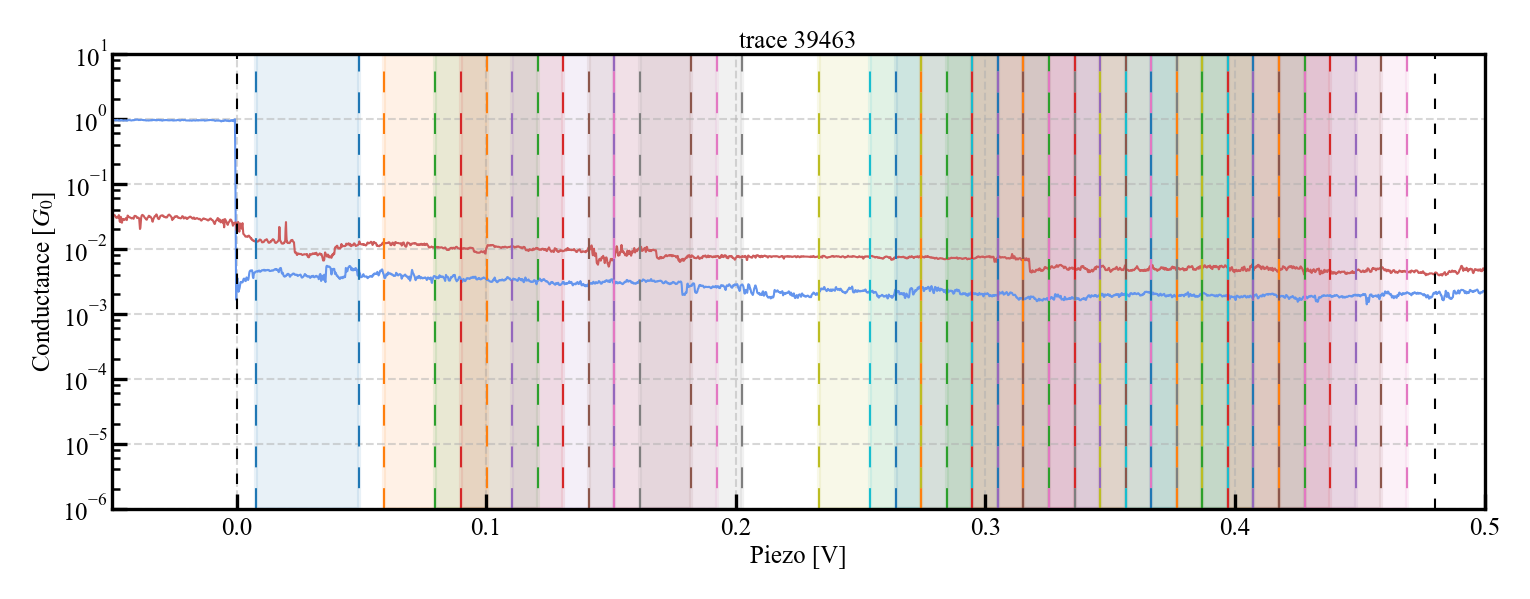

In [95]:
trace_pair = TracePair(traces_1[which_ind], load_from=home_folder)
trace_pair.align_trace(align_at=2e-2)

fig, ax = plt.subplots(1, figsize=utils.cm2inch(15, 5), dpi=300)
ax = trace_pair.plot_trace_pair(aligned=True, dpi=300, ax=ax)
ax.set_ylim(1e-6, 10)
ax.set_xlim(-0.05, 0.5)
ax.axvline(0, ls=(0, (5, 7)), lw=0.5, c='k')
#----------------------------------------------------
# ax.axvline(8/50_000*50, ls=(0, (5, 7)), lw=0.5, c='r')
# ax.axvline(8/50_000*(50+256), ls=(0, (5, 7)), lw=0.5, c='r')
# ax.axvspan(8/50_000*(50), 8/50_000*(50+256), alpha=0.05, color='r')
# #----------------------------------------------------
# ax.axvline(8/50_000*(50+64), ls=(0, (5, 7)), lw=0.5, c='b')
# ax.axvline(8/50_000*(50+64+256), ls=(0, (5, 7)), lw=0.5, c='b')
# ax.axvspan(8/50_000*(50+64), 8/50_000*(50+64+256), alpha=0.05, color='b')
# #----------------------------------------------------
# ax.axvline(8/50_000*(50+2*64), ls=(0, (5, 7)), lw=0.5, c='g')
# ax.axvline(8/50_000*(50+2*64+256), ls=(0, (5, 7)), lw=0.5, c='g')
# ax.axvspan(8/50_000*(50+2*64), 8/50_000*(50+2*64+256), alpha=0.05, color='g')
#----------------------------------------------------

use_colors = colormaps['tab10'](np.linspace(0, 1, 10))

for i, win in enumerate(np.where(areas_all_1[which_ind, :] > 0)[0]):
    ax.axvline((trace_pair.rate/trace_pair.sample_rate)*(param_skip_points+win*(param_win_size//4)), lw=0.5, c=use_colors[i%10], ls=(0, (10, 10)))
    ax.axvline((trace_pair.rate/trace_pair.sample_rate)*(param_skip_points+win*(param_win_size//4) + param_win_size), lw=0.5, c=use_colors[i%10], ls=(10, (10, 10)))
    ax.axvspan((trace_pair.rate/trace_pair.sample_rate)*(param_skip_points+win*(param_win_size//4)),
               (trace_pair.rate/trace_pair.sample_rate)*(param_skip_points+win*(param_win_size//4) + param_win_size),
               alpha=0.1, color=use_colors[i%10])

ax.axvline(8/50_000*3_000, ls=(0, (5, 7)), lw=0.5, c='k')
ax.set_title(f'trace {trace_pair.trace_num}', fontsize=6, pad=0)

In [3]:
areas_all_1 = []
areas_all_2 = []
cond_avg_all_1 = []
cond_avg_all_2 = []
pc_key='PC4'
for trace_ind in tqdm(range(0, 1600)):
    with h5py.File(home_folder.joinpath('results/noise/noise_data_avg_dev.h5'), 'r') as f:
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{pc_key}/group1/trace_{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{pc_key}/group1/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)
        
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_2=TracePair(trace, load_from=home_folder)
        # conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
        # piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
        # psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
        # psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
        # fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
        areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
        avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_2.append(areas_2)
        cond_avg_all_2.append(avg_conductance_in_win_2)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [4]:
areas_all_1 = np.array(areas_all_1)
cond_avg_all_1 = np.array(cond_avg_all_1)
areas_all_2 = np.array(areas_all_2)
cond_avg_all_2 = np.array(cond_avg_all_2)

In [5]:
cond_avg_all_1_start_end = cond_avg_all_1
cond_avg_all_2_start_end = cond_avg_all_2

In [6]:
xrange = (1e-5, 1e-2)
yrange = (1e-2, 1)

num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(20 * num_of_decs_x)+1)
ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(20 * num_of_decs_y)+1)

h_start_end_1, xedges, yedges = np.histogram2d(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0],
                                               np.sqrt(areas_all_1.flatten()[cond_avg_all_1.flatten()>0])/(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0]),
                                               bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr1_avg_dev.txt'), h_start_end_1)
np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr1_avg_dev.txt'), x_mesh)
np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr1_avg_dev.txt'), y_mesh)

h_start_end_2, xedges, yedges = np.histogram2d(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0],
                                               np.sqrt(areas_all_2.flatten()[cond_avg_all_2.flatten()>0])/(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0]),
                                               bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr2_avg_dev.txt'), h_start_end_2)
np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr2_avg_dev.txt'), x_mesh)
np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr2_avg_dev.txt'), y_mesh)

In [23]:
xrange = (1e-5, 1e-2)
yrange = (1e-2, 1)

num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(20 * num_of_decs_x)+1)
ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(20 * num_of_decs_y)+1)

h_start_end_1, xedges, yedges = np.histogram2d(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0],
                                               np.sqrt(areas_all_1.flatten()[cond_avg_all_1.flatten()>0])/(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0]),
                                               bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

np.savetxt(home_folder.joinpath('results/noise_power_2d_avg_dev_8000_noPC.txt'), h_start_end_1)
np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_avg_dev_8000_noPC.txt'), x_mesh)
np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_avg_dev_8000_noPC.txt'), y_mesh)

# h_start_end_2, xedges, yedges = np.histogram2d(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0],
#                                                np.sqrt(areas_all_2.flatten()[cond_avg_all_2.flatten()>0])/(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0]),
#                                                bins=[xbins, ybins])
# x_mesh, y_mesh = np.meshgrid(xedges, yedges)

# np.savetxt(home_folder.joinpath('results/noise_power_2d_start-end_wide_8000_noPC.txt'), h_start_end_2)
# np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_start-end_wide_8000_noPC.txt'), x_mesh)
# np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_start-end_wide_8000_noPC.txt'), y_mesh)

In [27]:
xrange = (1e-5, 1e-2)
yrange = (1e-2, 1)

num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(20 * num_of_decs_x)+1)
ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(20 * num_of_decs_y)+1)

h_start_end_1, xedges, yedges = np.histogram2d(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0],
                                               np.sqrt(areas_all_1.flatten()[cond_avg_all_1.flatten()>0])/(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0]),
                                               bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

np.savetxt(home_folder.joinpath('results/noise_power_2d_start-end_wide_8000_noPC.txt'), h_start_end_1)
np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_start-end_wide_8000_noPC.txt'), x_mesh)
np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_start-end_wide_8000_noPC.txt'), y_mesh)

# h_start_end_2, xedges, yedges = np.histogram2d(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0],
#                                                np.sqrt(areas_all_2.flatten()[cond_avg_all_2.flatten()>0])/(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0]),
#                                                bins=[xbins, ybins])
# x_mesh, y_mesh = np.meshgrid(xedges, yedges)

# np.savetxt(home_folder.joinpath('results/noise_power_2d_start-end_wide_8000_noPC.txt'), h_start_end_2)
# np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_start-end_wide_8000_noPC.txt'), x_mesh)
# np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_start-end_wide_8000_noPC.txt'), y_mesh)

In [7]:
bar_width = np.diff(y_mesh[:, 0])
ybins = y_mesh[:, 0][:-1] + bar_width / 2

gauss_fit_params_1 = np.zeros((h_start_end_1.T.shape[1], 3))
for i in range(h_start_end_1.T.shape[1]):
    try:
        popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(ybins), ydata=h_start_end_1.T[:, i], p0=(1, -1, 1))
        # perr = np.sqrt(np.diag(pcov))
        gauss_fit_params_1[i, :] = popt
    except RuntimeError:
        gauss_fit_params_1[i, :] = [None, None, None]

gauss_fit_params_2 = np.zeros((h_start_end_2.T.shape[1], 3))

for i in range(h_start_end_2.T.shape[1]):
    try:
        popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(ybins), ydata=h_start_end_2.T[:, i], p0=(1, -1, 1))
        # perr = np.sqrt(np.diag(pcov))
        gauss_fit_params_2[i, :] = popt
    except RuntimeError:
        gauss_fit_params_2[i, :] = [None, None, None]

In [8]:
bar_width = np.diff(x_mesh[0, :])
xbins = x_mesh[0, :][:-1] + bar_width / 2

(1e-05, 0.01)

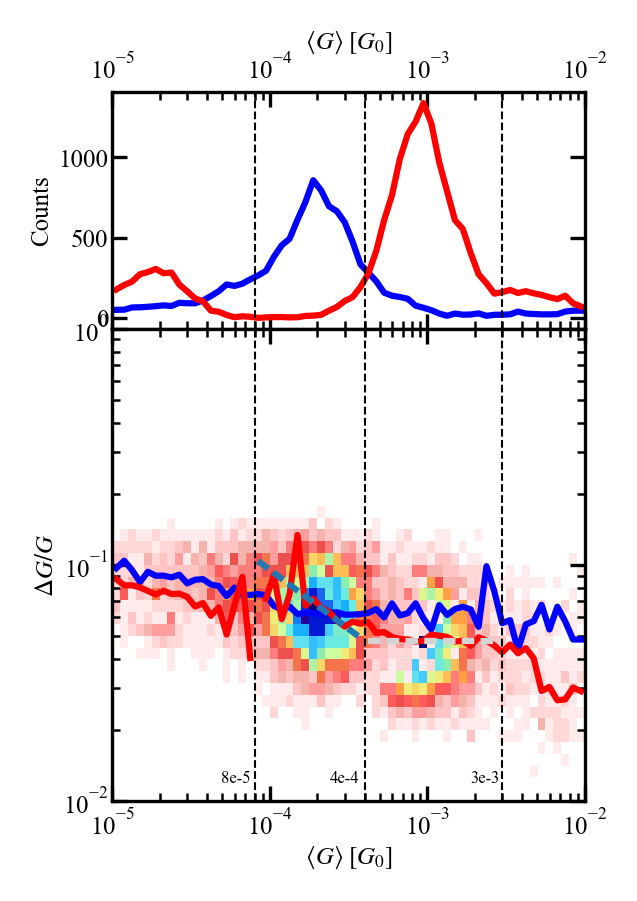

In [10]:
fig = plt.figure(figsize=utils.cm2inch(5, 7.5), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0)

ax_1d = fig.add_subplot(gs[0])
ax_2d = fig.add_subplot(gs[1])

ax_1d.xaxis.tick_top()
ax_1d.xaxis.set_label_position('top')
ax_1d.xaxis.set_ticks_position('both')
ax_1d.yaxis.set_ticks_position('both')

ax_2d.xaxis.set_ticks_position('both')
ax_2d.yaxis.set_ticks_position('both')

ax_1d.plot(xbins, np.sum(h_start_end_1, axis=1), 'b')
ax_1d.plot(xbins, np.sum(h_start_end_2, axis=1), 'r')
ax_1d.axvline(8e-5, ls='--', c='k', lw=0.5)
ax_1d.axvline(4e-4, ls='--', c='k', lw=0.5)
ax_1d.axvline(3e-3, ls='--', c='k', lw=0.5)
ax_1d.set_xscale('log')
ax_1d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
ax_1d.set_ylabel('Counts')

ax_2d.pcolormesh(x_mesh, y_mesh, h_start_end_2.T, cmap=utils.cmap_geo32)
ax_2d.pcolormesh(x_mesh, y_mesh, h_start_end_1.T, cmap=utils.cmap_geo32)
ax_2d.set_xscale('log')
ax_2d.set_yscale('log')
ax_2d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
ax_2d.set_ylabel(r'$\Delta G/G$')
ax_2d.plot(xbins, 10**gauss_fit_params_1[:, 1], c='b')
ax_2d.plot(xbins, 10**gauss_fit_params_2[:, 1], c='r')
ax_2d.plot(xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)], xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)]**-0.5/1050, ls=(0, (2, 1)))
ax_2d.plot(xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)], xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)]**0/21, ls=(0, (2, 1)), c='lightgrey')
ax_2d.axvline(8e-5, ls='--', c='k', lw=0.5)
ax_2d.axvline(4e-4, ls='--', c='k', lw=0.5)
ax_2d.axvline(3e-3, ls='--', c='k', lw=0.5)
ax_2d.text(7.5e-5, 1.2e-2, '8e-5', fontsize=4, ha='right')
ax_2d.text(3.7e-4, 1.2e-2, '4e-4', fontsize=4, ha='right')
ax_2d.text(2.9e-3, 1.2e-2, '3e-3', fontsize=4, ha='right')

ax_1d.set_xlim(1e-5, 1e-2)
ax_2d.set_xlim(1e-5, 1e-2)

In [15]:
areas_all_1 = []
areas_all_2 = []
cond_avg_all_1 = []
cond_avg_all_2 = []
pc_key='PC4'
for trace_ind in tqdm(range(0, 1600)):
    with h5py.File(home_folder.joinpath('results/noise/noise_data_min-max_wide.h5'), 'r') as f:
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{pc_key}/group1/trace_{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{pc_key}/group1/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)
        
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_2=TracePair(trace, load_from=home_folder)
        # conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
        # piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
        # psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
        # psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
        # fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
        areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
        avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_2.append(areas_2)
        cond_avg_all_2.append(avg_conductance_in_win_2)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [16]:
areas_all_1 = np.array(areas_all_1)
cond_avg_all_1 = np.array(cond_avg_all_1)
areas_all_2 = np.array(areas_all_2)
cond_avg_all_2 = np.array(cond_avg_all_2)

In [17]:
xrange = (1e-5, 1e-2)
yrange = (1e-2, 1)

num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(20 * num_of_decs_x)+1)
ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(20 * num_of_decs_y)+1)

h_min_max_1, xedges, yedges = np.histogram2d(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0],
                                             np.sqrt(areas_all_1.flatten()[cond_avg_all_1.flatten()>0])/(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0]),
                                             bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr1_min-max_wide.txt'), h_min_max_1)
np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr1_min-max_wide.txt'), x_mesh)
np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr1_min-max_wide.txt'), y_mesh)

h_min_max_2, xedges, yedges = np.histogram2d(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0],
                                             np.sqrt(areas_all_2.flatten()[cond_avg_all_2.flatten()>0])/(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0]),
                                             bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr2_min-max_wide.txt'), h_min_max_2)
np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr2_min-max_wide.txt'), x_mesh)
np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr2_min-max_wide.txt'), y_mesh)

In [52]:
cond_avg_all_1_min_max = cond_avg_all_1
cond_avg_all_2_min_max = cond_avg_all_2

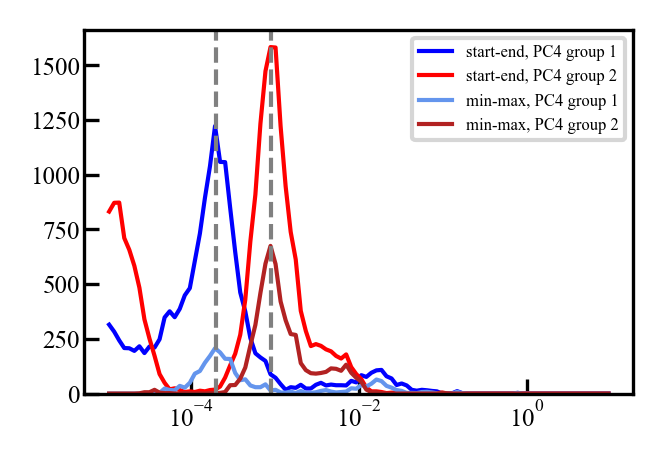

In [53]:
fig, ax = plt.subplots(1, dpi=300, figsize=utils.cm2inch(6, 4))
xbins, hist_start_end_1 = utils.calc_hist_1d_single(data=cond_avg_all_1_start_end, xrange=(1e-5, 10), xbins_num=100, log_scale=True, bin_mode='total')
xbins, hist_start_end_2 = utils.calc_hist_1d_single(data=cond_avg_all_2_start_end, xrange=(1e-5, 10), xbins_num=100, log_scale=True, bin_mode='total')

xbins, hist_min_max_1 = utils.calc_hist_1d_single(data=cond_avg_all_1_min_max, xrange=(1e-5, 10), xbins_num=100, log_scale=True, bin_mode='total')
xbins, hist_min_max_2 = utils.calc_hist_1d_single(data=cond_avg_all_2_min_max, xrange=(1e-5, 10), xbins_num=100, log_scale=True, bin_mode='total')

ax.plot(xbins, hist_start_end_1, c='b', lw=1, label='start-end, PC4 group 1')
ax.plot(xbins, hist_start_end_2, c='r', lw=1, label='start-end, PC4 group 2')

ax.plot(xbins, hist_min_max_1, c='cornflowerblue', lw=1, label='min-max, PC4 group 1')
ax.plot(xbins, hist_min_max_2, c='firebrick', lw=1, label='min-max, PC4 group 2')

ax.set_xscale('log')
ax.set_ylim(0)

ax.axvline(9e-4, c='grey', lw=1, ls='--')
ax.axvline(2e-4, c='grey', lw=1, ls='--')

ax.legend(fontsize='4')

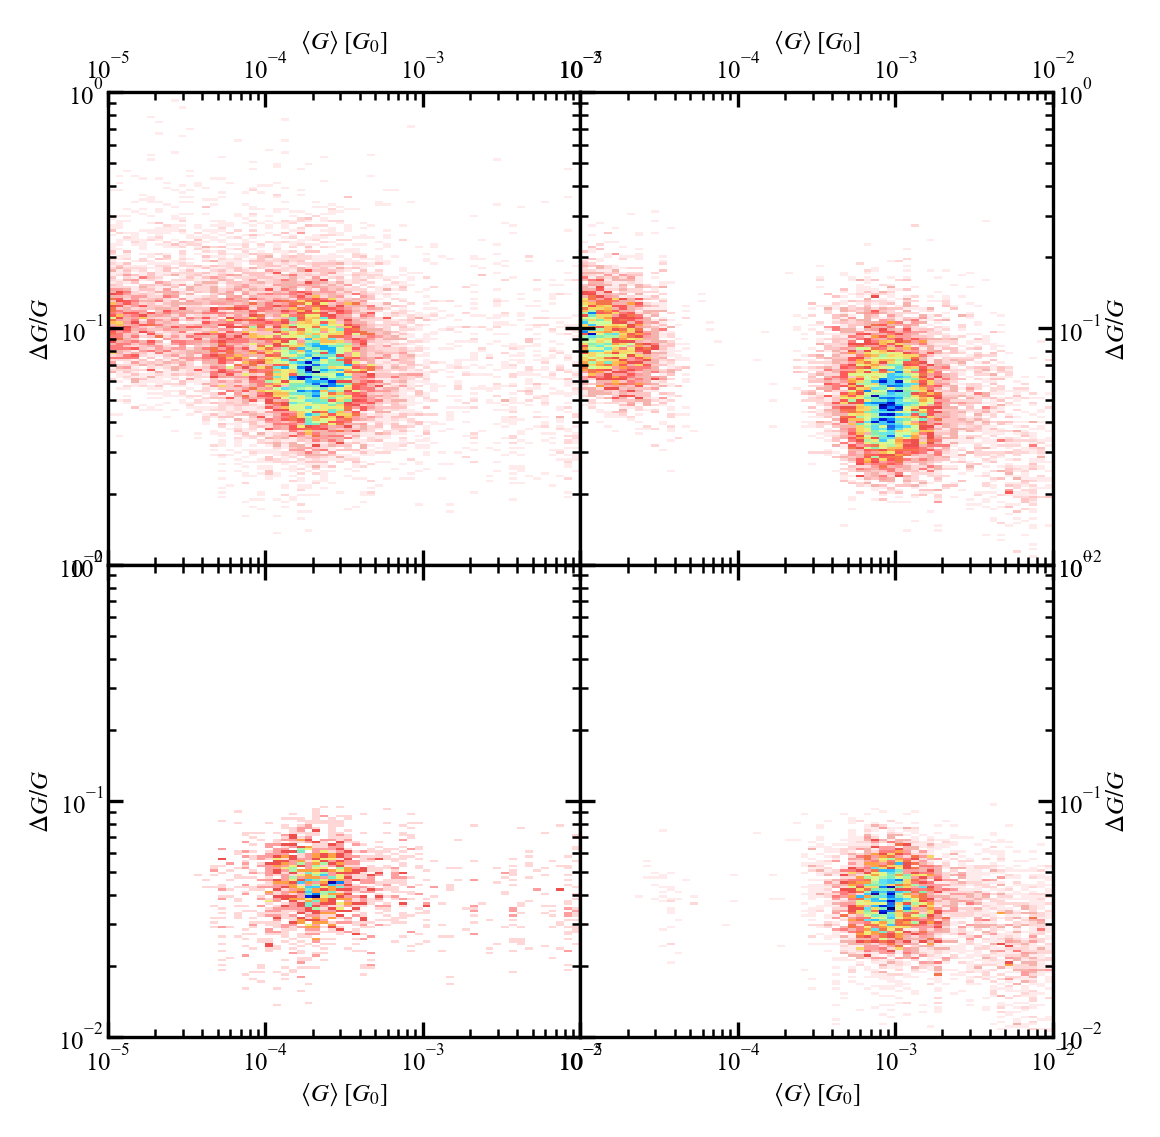

In [63]:
fig = plt.figure(figsize=utils.cm2inch(10, 10), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)

ax_start_end_1 = fig.add_subplot(gs[0, 0])
ax_start_end_2 = fig.add_subplot(gs[0, 1])
ax_min_max_1 = fig.add_subplot(gs[1, 0])
ax_min_max_2 = fig.add_subplot(gs[1, 1])

ax_start_end_1.set_xscale('log')
ax_start_end_2.set_xscale('log')
ax_min_max_1.set_xscale('log')
ax_min_max_2.set_xscale('log')
ax_start_end_1.set_yscale('log')
ax_start_end_2.set_yscale('log')
ax_min_max_1.set_yscale('log')
ax_min_max_2.set_yscale('log')

ax_start_end_1.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
ax_start_end_2.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
ax_min_max_1.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
ax_min_max_2.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
ax_start_end_1.set_ylabel(r'$\Delta G / G$')
ax_start_end_2.set_ylabel(r'$\Delta G / G$')
ax_min_max_1.set_ylabel(r'$\Delta G / G$')
ax_min_max_2.set_ylabel(r'$\Delta G / G$')

ax_start_end_1.xaxis.tick_top()
ax_start_end_1.xaxis.set_label_position('top')
ax_start_end_1.xaxis.set_ticks_position('both')
ax_start_end_1.yaxis.set_ticks_position('both')

ax_start_end_2.xaxis.tick_top()
ax_start_end_2.xaxis.set_label_position('top')
ax_start_end_2.xaxis.set_ticks_position('both')
ax_start_end_2.yaxis.tick_right()
ax_start_end_2.yaxis.set_label_position('right')
ax_start_end_2.yaxis.set_ticks_position('both')

ax_min_max_1.yaxis.set_ticks_position('both')
ax_min_max_1.xaxis.set_ticks_position('both')

ax_min_max_2.yaxis.tick_right()
ax_min_max_2.yaxis.set_label_position('right')
ax_min_max_2.yaxis.set_ticks_position('both')
ax_min_max_2.xaxis.set_ticks_position('both')

im = ax_start_end_1.pcolormesh(x_mesh, y_mesh, h_start_end_1.T, cmap=utils.cmap_geo32)
im = ax_start_end_2.pcolormesh(x_mesh, y_mesh, h_start_end_2.T, cmap=utils.cmap_geo32)
im = ax_min_max_1.pcolormesh(x_mesh, y_mesh, h_min_max_1.T, cmap=utils.cmap_geo32)
im = ax_min_max_2.pcolormesh(x_mesh, y_mesh, h_min_max_2.T, cmap=utils.cmap_geo32)

In [64]:
with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_all_8000.h5'), 'w') as f:
    for trace in tqdm(hist.traces):
        trace_pair = TracePair(trace, load_from=home_folder)
        conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
            temporal_noise_single_trace(trace_pair=trace_pair, align_at=2e-2, interpolate=False,
                win_size=256, step_size=None, skip_points=50, end_point=3000,
                tolerance=2, filter_method='start-end', freq_range=(2000, 5000))

        trace_group = f.create_group(name=f'trace_{trace}')

        trace_group.create_dataset(name='conductance', data=conductance)
        trace_group.create_dataset(name='piezo', data=piezo)
        trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
        trace_group.create_dataset(name='psd_results', data=psd_results)
        trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
        trace_group.create_dataset(name='areas', data=areas)
        trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)
        
with h5py.File(home_folder.joinpath('results/noise/noise_data_min-max_all_8000.h5'), 'w') as f:
    for trace in tqdm(hist.traces):
        trace_pair = TracePair(trace, load_from=home_folder)
        conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
            temporal_noise_single_trace(trace_pair=trace_pair, align_at=2e-2, interpolate=False,
                win_size=256, step_size=None, skip_points=50, end_point=3000,
                tolerance=2, filter_method='min-max', freq_range=(2000, 5000))

        trace_group = f.create_group(name=f'trace_{trace}')

        trace_group.create_dataset(name='conductance', data=conductance)
        trace_group.create_dataset(name='piezo', data=piezo)
        trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
        trace_group.create_dataset(name='psd_results', data=psd_results)
        trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
        trace_group.create_dataset(name='areas', data=areas)
        trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

In [ ]:
areas_all_start_end = []
areas_all_min_max = []
cond_avg_all_start_end = []
cond_avg_all_min_max = []

with h5py.File(home_folder.joinpath('results/noise/noise_data_start-end_all_8000.h5'), 'r') as f:
    traces = list(f.keys())
    for trace in traces:
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_start_end.append(areas_1)
        cond_avg_all_start_end.append(avg_conductance_in_win_1)

with h5py.File(home_folder.joinpath('results/noise/noise_data_min-max_all_8000.h5'), 'r') as f:
    traces = list(f.keys())
    for trace in traces:
        # print(trace)

        # trace_pair_2=TracePair(trace, load_from=home_folder)
        # conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
        # piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
        # psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
        # psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
        # fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
        areas_2 = f[f'{trace}/areas'][:]
        avg_conductance_in_win_2 = f[f'{trace}/avg_conductance_in_win'][:]

        areas_all_min_max.append(areas_2)
        cond_avg_all_min_max.append(avg_conductance_in_win_2)

****************************************************************************************************

In [8]:
pc_key ='PC4'
trace_ind = np.random.randint(0, 1600)

with h5py.File(home_folder.joinpath('results/noise/noise_data_min-max.h5'), 'r') as f:
    trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
    print(trace)
    
    trace_pair_1=TracePair(trace, load_from=home_folder)
    conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
    piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
    psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
    psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
    fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
    areas_1 = f[f'{pc_key}/group1/trace_{trace}/areas'][:]
    avg_conductance_in_win_1 = f[f'{pc_key}/group1/trace_{trace}/avg_conductance_in_win'][:]
    
    trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
    print(trace)
    
    trace_pair_2=TracePair(trace, load_from=home_folder)
    conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
    piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
    psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
    psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
    fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
    areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
    avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]

39430
36113


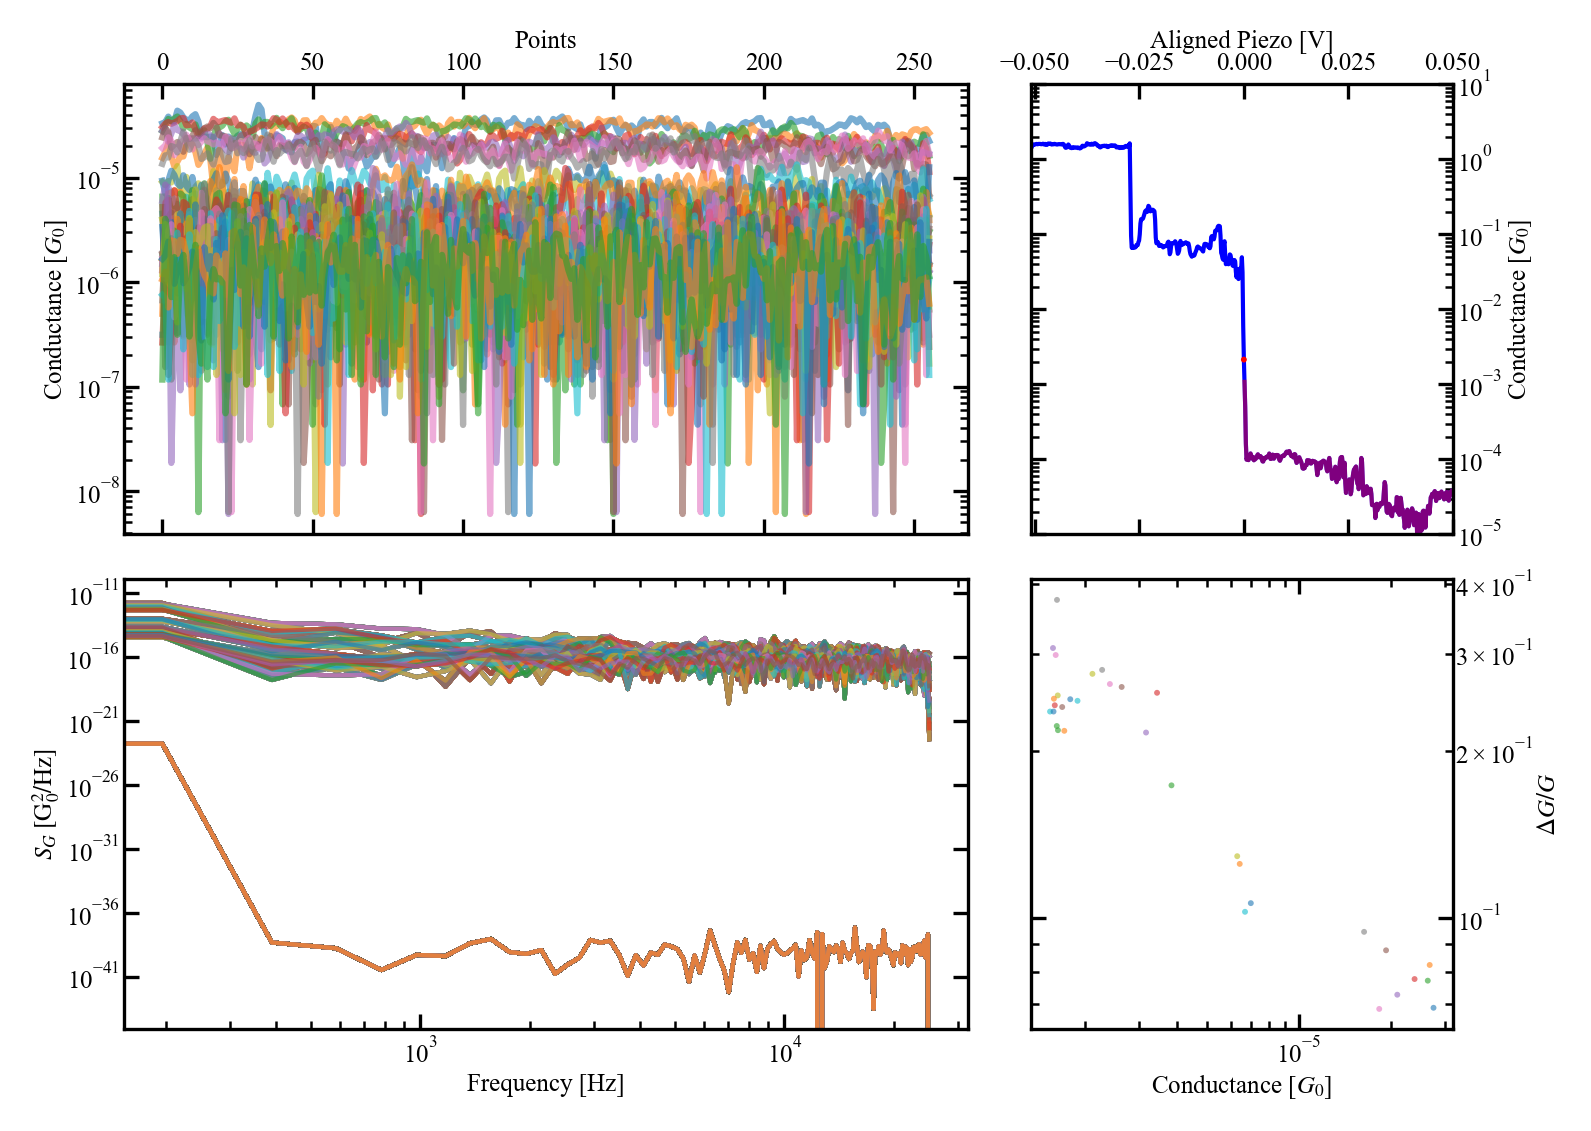

In [23]:
trace_pair_1.align_trace(align_at=2e-2, interpolate=False)
ax_interval, ax_trace, ax_pasd, ax_noise = plot_temporal_noise_single_trace(trace_pair=trace_pair_1,
                                                                             psd_intervals=psd_intervals_1,
                                                                             fft_freqs=fft_freqs_1,
                                                                             psd_results=psd_results_1,
                                                                             avg_conductance_in_win=avg_conductance_in_win_1,
                                                                             areas=areas_1,
                                                                             noise_type='dG/G')
ax_trace.set_ylim(1e-5, 10)
# ax_trace.set_xlim(-0.0051, 0.015)
ax_trace.set_xlim(-0.051, 0.05)
ax_trace.plot(piezo_1, conductance_1, lw=1, c='r', alpha=0.5)
ax_trace.scatter(trace_pair_1.aligned_piezo_pull[trace_pair_1.aligned_piezo_pull==0], trace_pair_1.conductance_pull[trace_pair_1.aligned_piezo_pull==0], c='r', marker='o', s=2, edgecolor='None', zorder=20)

(54.78, 54.8)

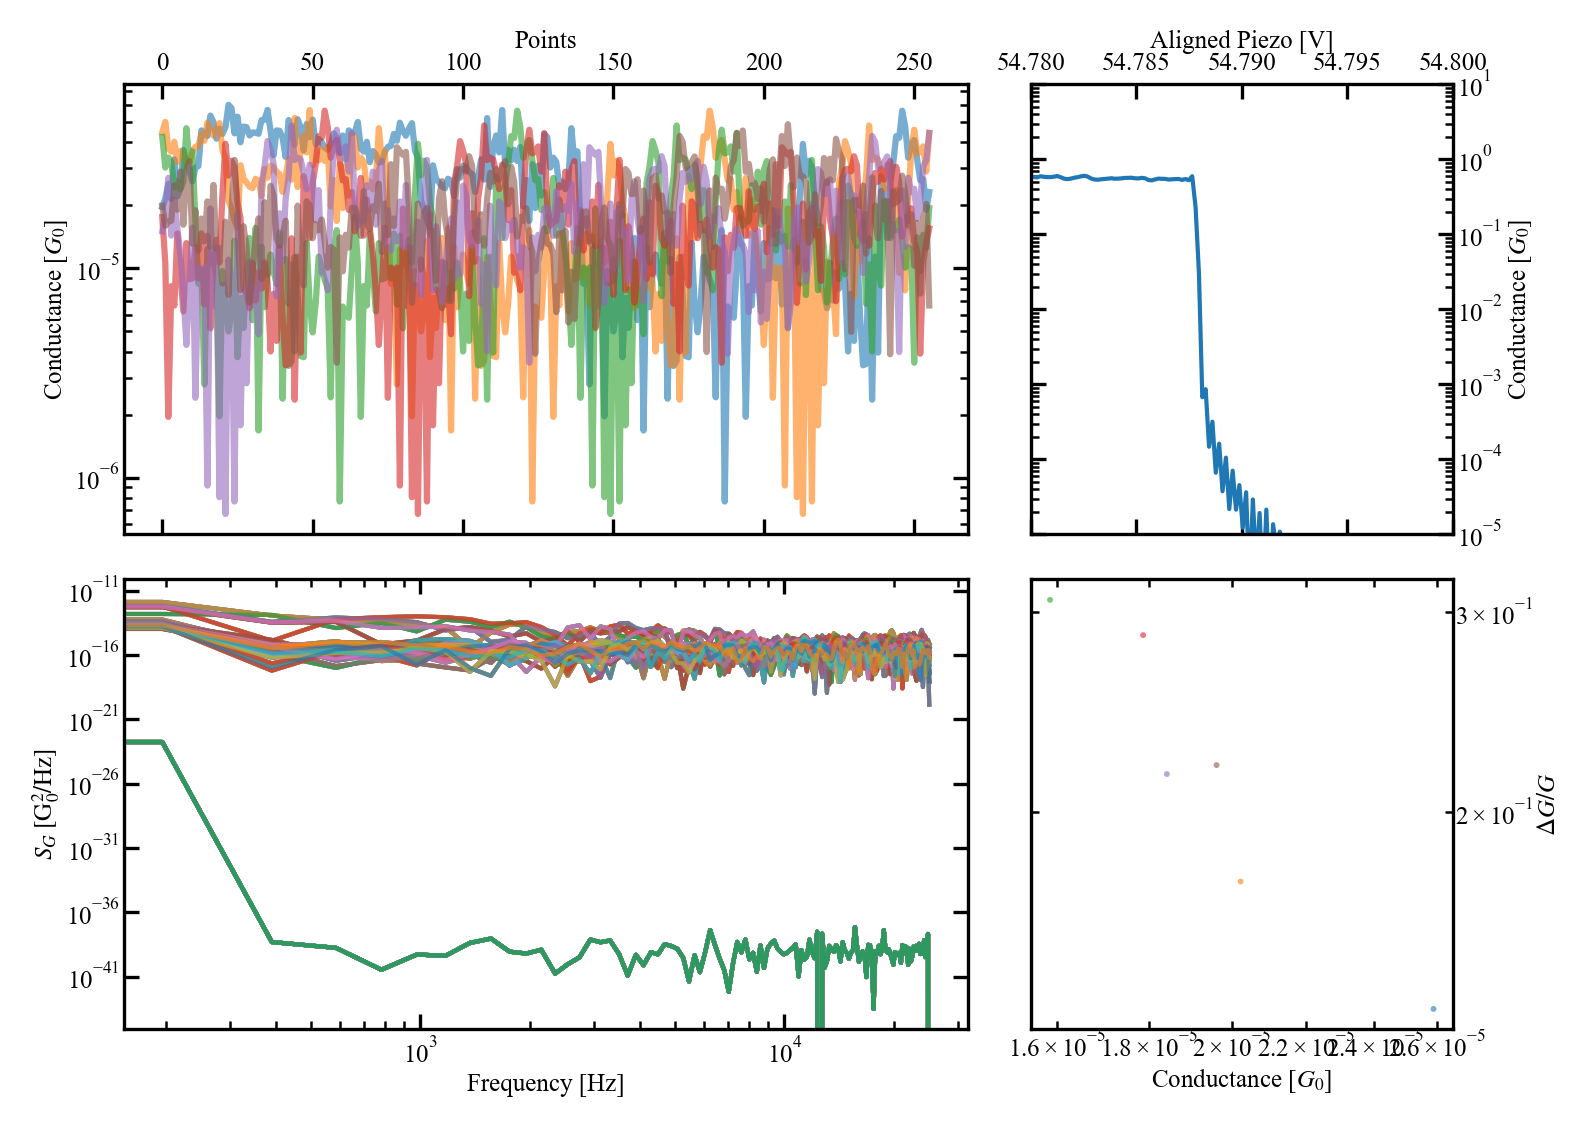

In [25]:
trace_pair_2 = TracePair(43632, load_from=home_folder)
trace_pair_2.align_trace(align_at=2e-2, interpolate=False)
ax_interval, ax_trace, ax_pasd, ax_noise = plot_temporal_noise_single_trace(trace_pair=trace_pair_2,
                                 psd_intervals=psd_intervals_2,
                                 fft_freqs=fft_freqs_2,
                                 psd_results=psd_results_2,
                                 avg_conductance_in_win=avg_conductance_in_win_2,
                                 areas=areas_2,
                                 noise_level_conductance=1e-5,
                                 noise_type='dG/G')

ax_trace.set_ylim(1e-5, 10)
ax_trace.plot(trace_pair_2.piezo_pull, trace_pair_2.conductance_pull, lw=1)
ax_trace.set_xlim(54.78,54.8)

In [60]:
areas_all_1 = np.array(areas_all_1).flatten()
areas_all_2 = np.array(areas_all_2).flatten()
cond_avg_all_1 = np.array(cond_avg_all_1).flatten()
cond_avg_all_2 = np.array(cond_avg_all_2).flatten()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13508\3699592131.py:2: RuntimeWarning: invalid value encountered in sqrt
  ax[0].scatter(cond_avg_all_1, np.sqrt(areas_all_1)/cond_avg_all_1, s=1, alpha=0.6)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13508\3699592131.py:3: RuntimeWarning: invalid value encountered in sqrt
  ax[1].scatter(cond_avg_all_2, np.sqrt(areas_all_2)/cond_avg_all_2, s=1, alpha=0.6)


(0.007, 1.0)

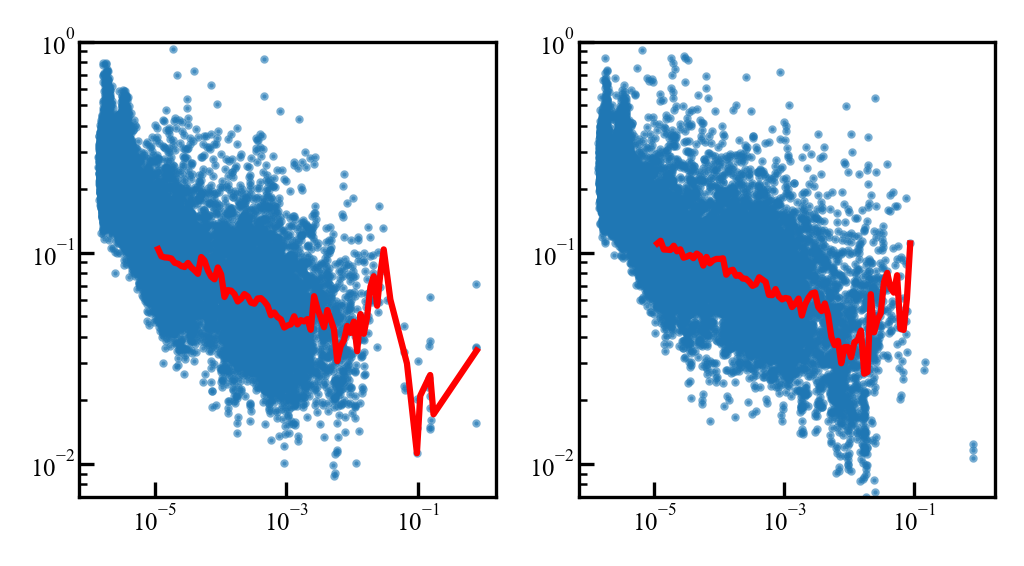

In [82]:
fig, ax = plt.subplots(ncols=2, figsize=utils.cm2inch(10, 5), dpi=300)
ax[0].scatter(cond_avg_all_1, np.sqrt(areas_all_1)/cond_avg_all_1, s=1, alpha=0.6)
ax[1].scatter(cond_avg_all_2, np.sqrt(areas_all_2)/cond_avg_all_2, s=1, alpha=0.6)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[0].plot(xbins_middle[np.bitwise_not(np.isnan(noise_mean_1))], noise_mean_1[np.bitwise_not(np.isnan(noise_mean_1))], c='r')
ax[1].plot(xbins_middle, noise_mean_2, c='r')

ax[0].set_ylim(7e-3, 1e0)
ax[1].set_ylim(7e-3, 1e0)

In [81]:
np.bitwise_not(np.isnan(noise_mean_1))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False])

In [76]:
xbins = np.logspace(-5, 0, 100)
xbins_middle = xbins[:-1]+np.diff(xbins)

noise_mean_1 = np.zeros_like(xbins_middle)
areas_mean_1 = np.zeros_like(xbins_middle)
noise_mean_2 = np.zeros_like(xbins_middle)
areas_mean_2 = np.zeros_like(xbins_middle)

for i in range(len(xbins)-1):
    cond_mask_1 = np.bitwise_and(cond_avg_all_1 > xbins[i], cond_avg_all_1 < xbins[i+1])
    cond_mask_2 = np.bitwise_and(cond_avg_all_2 > xbins[i], cond_avg_all_2 < xbins[i+1])
    
    noise_mean_1[i] = utils.log_avg(np.sqrt(areas_all_1[cond_mask_1])/cond_avg_all_1[cond_mask_1])
    noise_mean_2[i] = utils.log_avg(np.sqrt(areas_all_2[cond_mask_2])/cond_avg_all_2[cond_mask_2])
    
    areas_mean_1[i] = utils.log_avg(areas_all_1[cond_mask_1])
    areas_mean_2[i] = utils.log_avg(areas_all_2[cond_mask_2])

D:\mcbj_stmbj\venv\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\mcbj_stmbj\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [77]:
noise_mean_2

array([0.11072648, 0.11409471, 0.10365536, 0.1035377 , 0.10310271,
       0.10806917, 0.10157197, 0.10393265, 0.09482359, 0.09593826,
       0.09763982, 0.09437349, 0.09924281, 0.09671547, 0.08698991,
       0.09558622, 0.08914718, 0.09216238, 0.09358267, 0.09359907,
       0.09422269, 0.07876678, 0.08222705, 0.08316085, 0.07781971,
       0.07860502, 0.07550141, 0.07532126, 0.07292591, 0.06971579,
       0.07095432, 0.07658593, 0.0746968 , 0.07276297, 0.06316925,
       0.06300475, 0.06732953, 0.06212668, 0.06016556, 0.06111674,
       0.06068146, 0.05532549, 0.0574591 , 0.0606985 , 0.05041951,
       0.0569159 , 0.06118564, 0.06420466, 0.06494123, 0.05533218,
       0.05293171, 0.05756576, 0.05063173, 0.03993446, 0.03652247,
       0.03828757, 0.02996892, 0.03575124, 0.03580484, 0.0320011 ,
       0.03772441, 0.03861137, 0.04279204, 0.02673244, 0.02724353,
       0.06366789, 0.04201944, 0.0480612 , 0.05161871, 0.07253469,
       0.0803599 , 0.06808215, 0.06478528, 0.07831327, 0.04368

36581


(-1.0, 1.0)

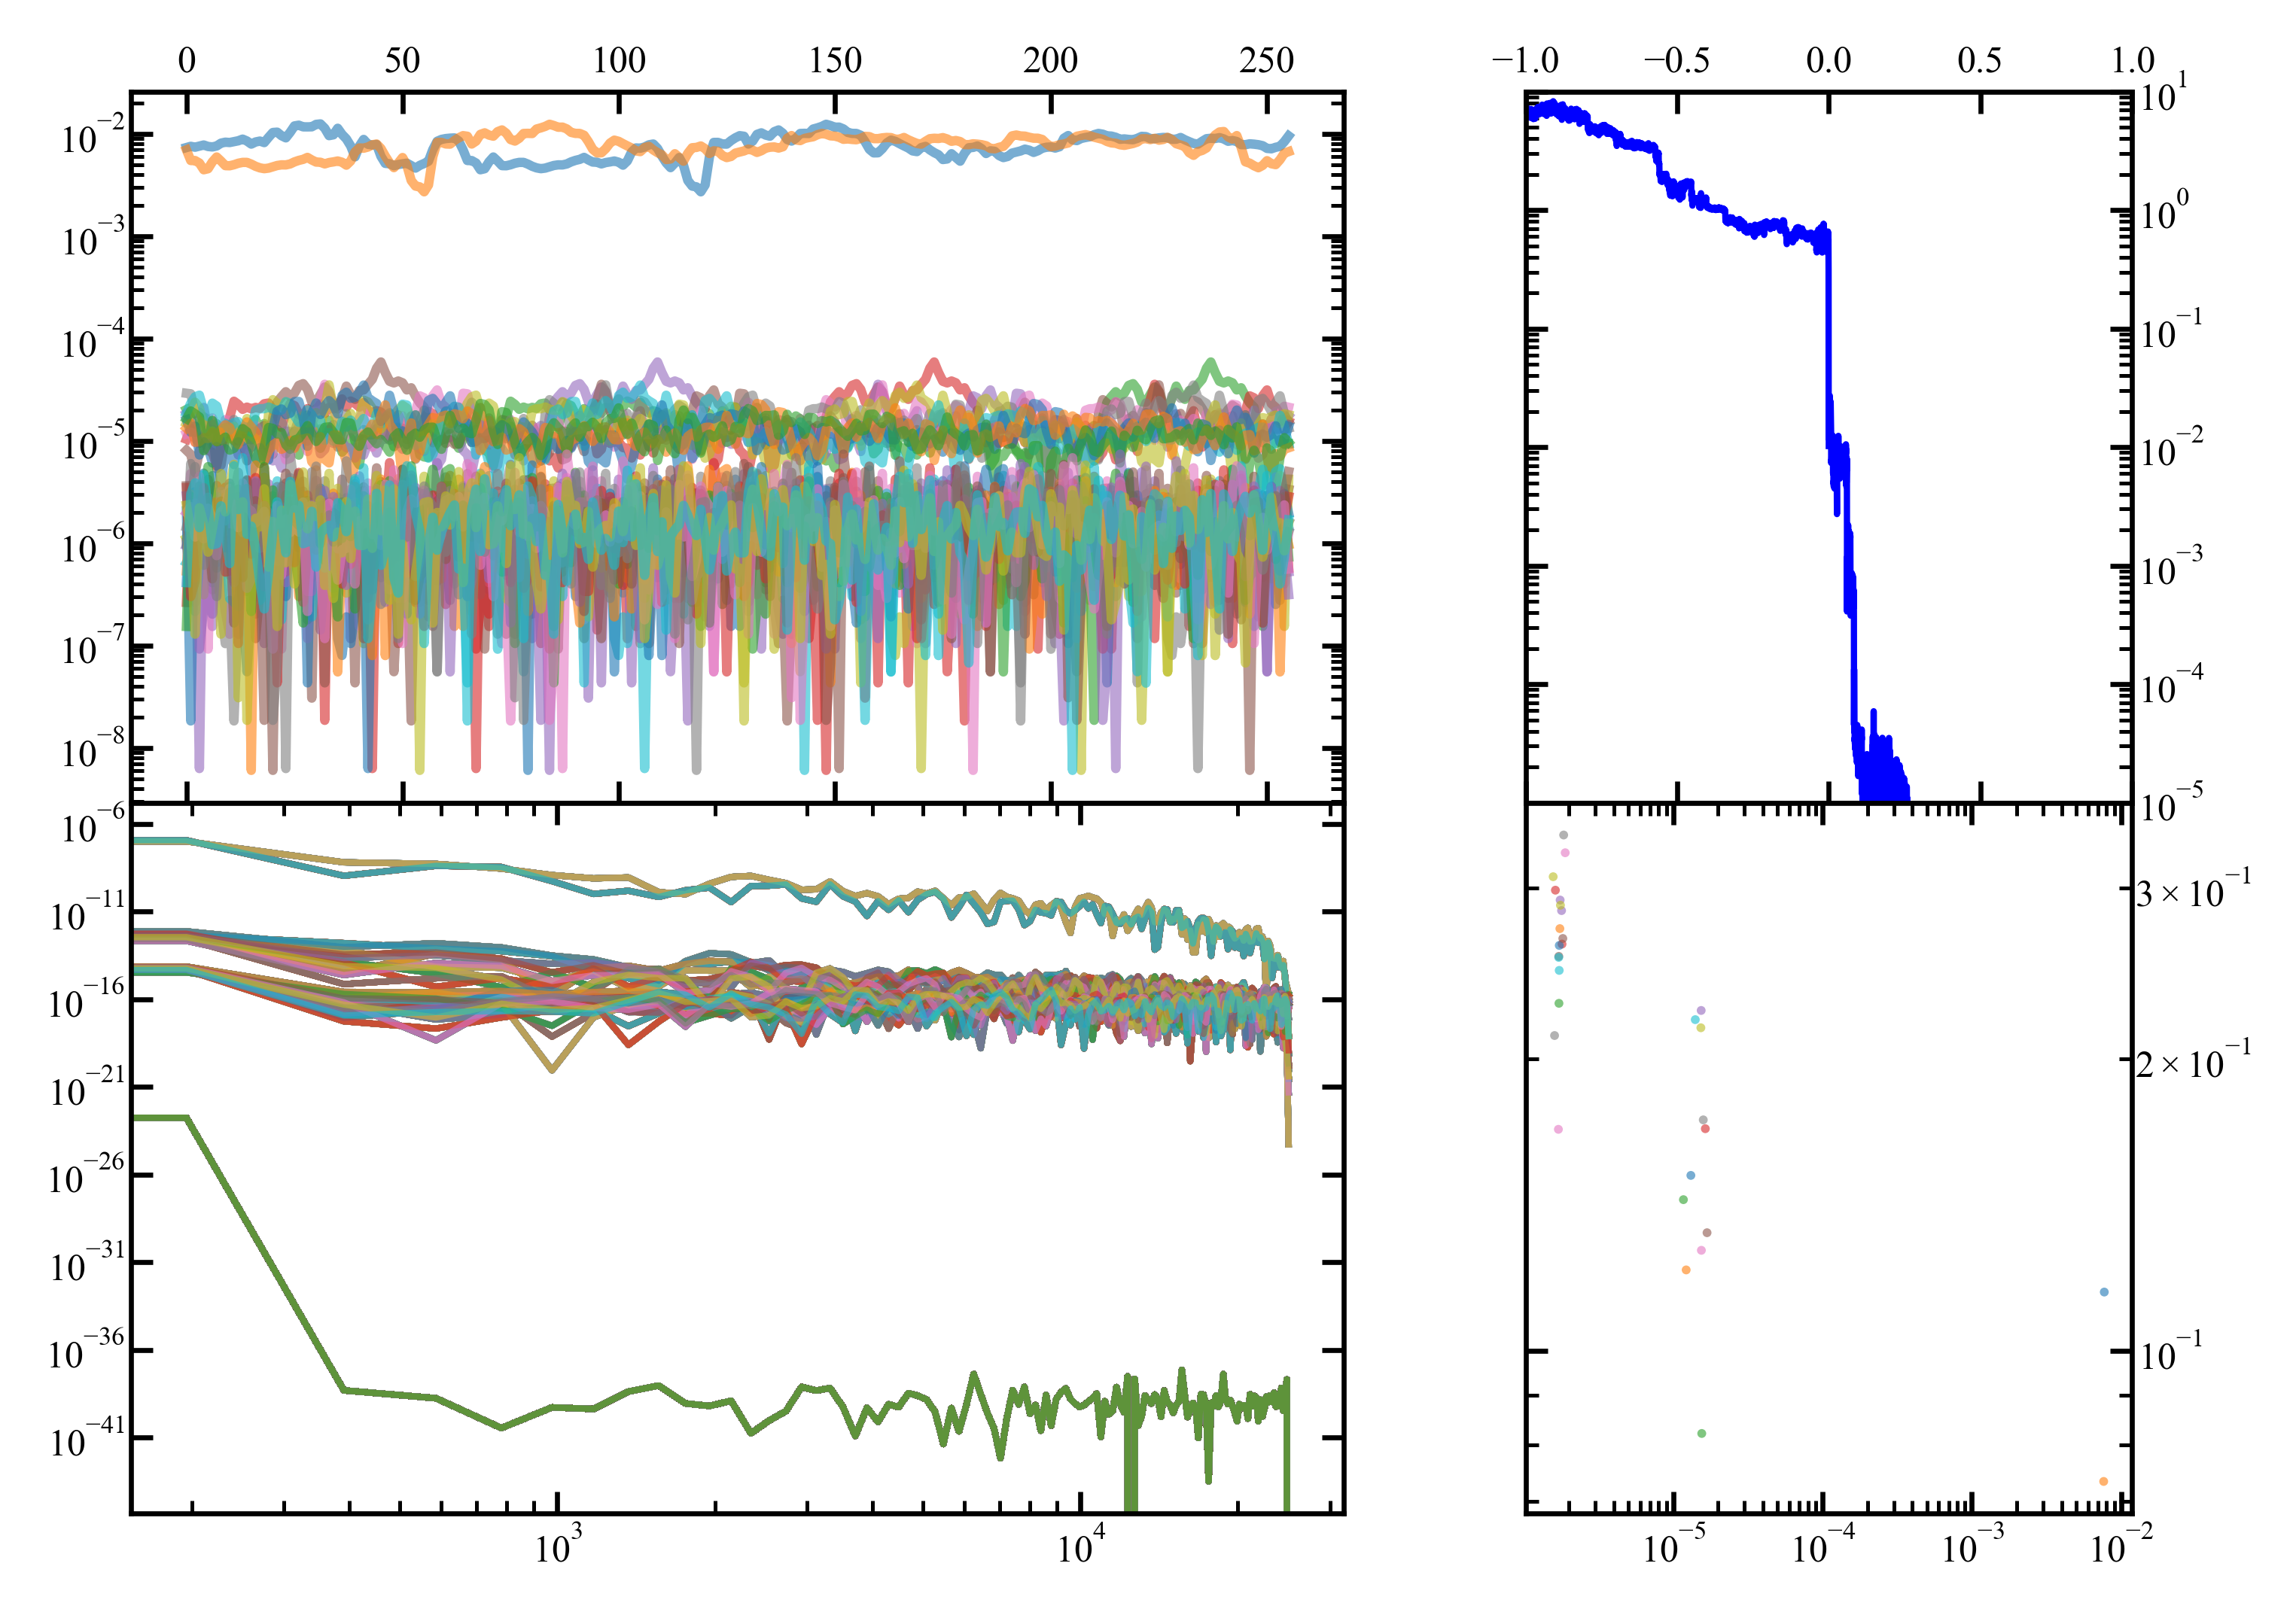

In [62]:
pc_key ='PC2'
trace_ind = np.random.randint(0, 1600)

with h5py.File(home_folder.joinpath('results/noise/noise_data_1.h5'), 'r') as f:
    trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
    print(trace)
    
    trace_pair_2=TracePair(trace, load_from=home_folder)
    conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
    piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
    psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
    psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
    fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
    areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
    avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]
    
trace_pair_2.align_trace(align_at=2e-2, interpolate=False)
ax_interval, ax_trace, ax_pasd, ax_noise = plot_temporal_noise_single_trace(trace_pair=trace_pair_2,
                                 psd_intervals=psd_intervals_2,
                                 fft_freqs=fft_freqs_2,
                                 psd_results=psd_results_2,
                                 avg_conductance_in_win=avg_conductance_in_win_2,
                                 areas=areas_2,
                                 noise_type='dG/G')

ax_trace.set_ylim(1e-5, 10)
# ax_trace.plot(trace_pair_2.piezo_pull, trace_pair_2.conductance_pull, lw=1)
ax_trace.set_xlim(-1,1)

In [47]:
np.unique(cond_avg_all_2 > 0, return_counts=True)

(array([False,  True]), array([17600, 49600], dtype=int64))

In [48]:
np.unique(cond_avg_all_1 > 0, return_counts=True)

(array([False,  True]), array([13640, 53560], dtype=int64))